In [1]:
!pip install kan
!pip install torch
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 2.8 MB/s eta 0:00:00


checkpoint directory created: ./model
saving model version 0.0

=== Training on Peak #1 ===


| train_loss: 8.05e-06 | test_loss: 8.05e-06 | reg: 3.36e+00 | : 100%|█| 100/100 [00:01<00:00, 61.86


saving model version 0.1


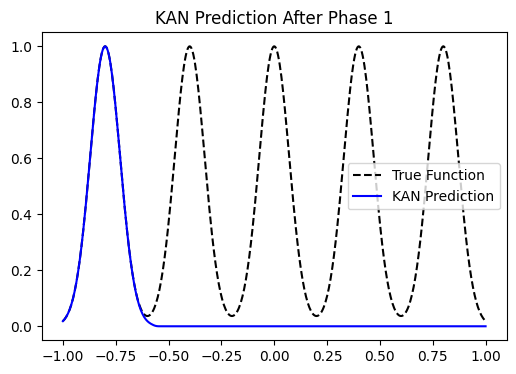


=== Training on Peak #2 ===


| train_loss: 6.79e-06 | test_loss: 6.79e-06 | reg: 3.28e+00 | : 100%|█| 100/100 [00:01<00:00, 72.20


saving model version 0.2



=== Training on Peak #3 ===


| train_loss: 8.82e-06 | test_loss: 8.82e-06 | reg: 3.32e+00 | : 100%|█| 100/100 [00:01<00:00, 84.77


saving model version 0.3


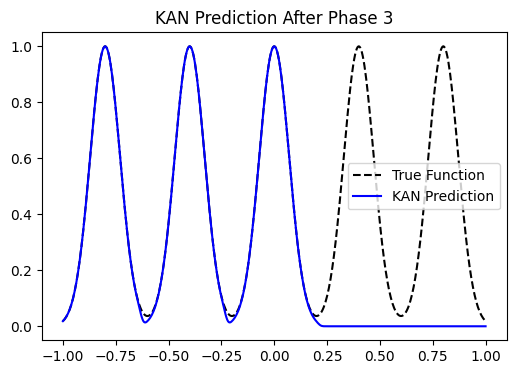


=== Training on Peak #4 ===


| train_loss: 9.68e-06 | test_loss: 9.68e-06 | reg: 3.36e+00 | : 100%|█| 100/100 [00:01<00:00, 53.32


saving model version 0.4


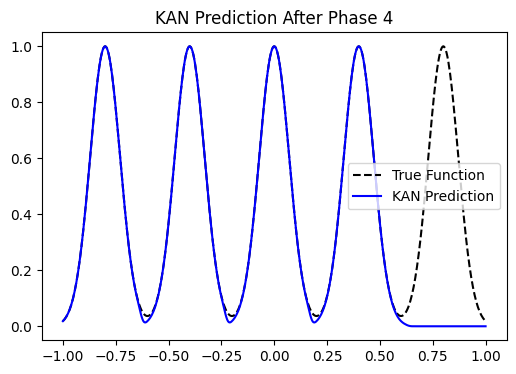


=== Training on Peak #5 ===


| train_loss: 9.91e-06 | test_loss: 9.91e-06 | reg: 3.36e+00 | : 100%|█| 100/100 [00:01<00:00, 62.11


saving model version 0.5


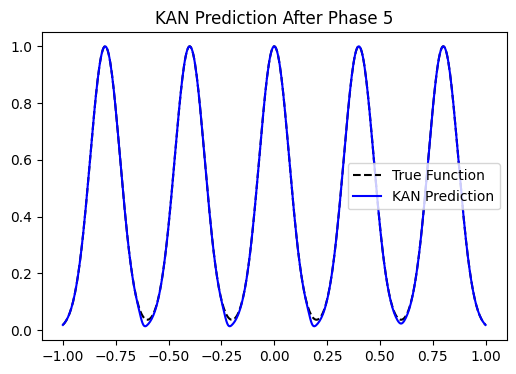

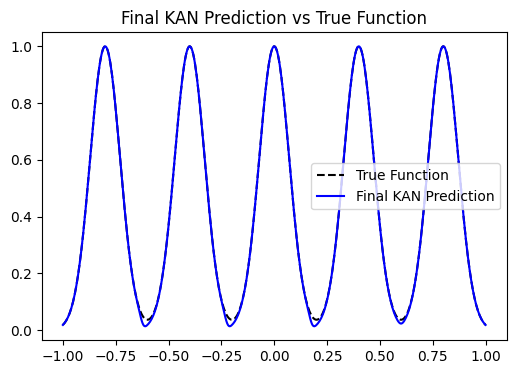

In [46]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN 



n_peak = 5 

x_centers = 2/n_peak * (np.arange(n_peak) - n_peak/2 + 0.5)

n_sample = 500
x_grid = torch.linspace(-1, 1, steps=n_sample)  

sigma = 100  # Sharpness of peaks
y_grid = torch.zeros_like(x_grid)
for center in x_centers:
    y_grid += torch.exp(-sigma * (x_grid - center) ** 2)

# Visualize the true function
plt.figure(figsize=(6, 4))
plt.title("True 1D Function (Sum of Gaussians)")
plt.plot(x_grid.numpy(), y_grid.numpy(), color='black', label="True Function")
plt.legend()
plt.show()


n_samples_per_peak = 100
radius = 0.2 

all_datasets = []

for center in x_centers:

    x_samples = center + (torch.rand(n_samples_per_peak) - 0.5) * 2 * radius

    y_samples = torch.exp(-sigma * (x_samples - center) ** 2)

    dataset = {
        'train_input': x_samples[:, None],  # Reshape to (N, 1)
        'train_label': y_samples[:, None],  # Reshape to (N, 1)
        'test_input': x_samples[:, None],
        'test_label': y_samples[:, None]
    }
    all_datasets.append(dataset)



model = KAN(
    width=[1, 1],  
    grid=100, 
    k=3,  
    noise_scale=0.1,
    sp_trainable=False,
    sb_trainable=False,
    base_fun='zero'
)

predictions_after_phases = []

for phase_idx, dataset in enumerate(all_datasets):
    print(f"\n=== Training on Peak #{phase_idx+1} ===")

    model.fit(dataset, opt='LBFGS', steps=100, update_grid=False)  # Grid remains fixed

    with torch.no_grad():
        y_pred = model(x_grid[:, None])  # Evaluate model on dense x-grid
    predictions_after_phases.append(y_pred.detach().numpy())

    # Plot after every phase
    plt.figure(figsize=(6, 4))
    plt.title(f"KAN Prediction After Phase {phase_idx+1}")
    plt.plot(x_grid.numpy(), y_grid.numpy(), color='black', linestyle='dashed', label="True Function")
    plt.plot(x_grid.numpy(), predictions_after_phases[-1], color='blue', label="KAN Prediction")
    plt.legend()
    plt.show()


final_pred = predictions_after_phases[-1]

plt.figure(figsize=(6, 4))
plt.title("Final KAN Prediction vs True Function")
plt.plot(x_grid.numpy(), y_grid.numpy(), color='black', linestyle='dashed', label="True Function")
plt.plot(x_grid.numpy(), final_pred, color='blue', label="Final KAN Prediction")
plt.legend()
plt.show()


checkpoint directory created: ./model
saving model version 0.0

=== Training on Task #1 ===


| train_loss: 1.11e-07 | test_loss: 1.11e-07 | reg: 3.51e+00 | : 100%|█| 100/100 [00:01<00:00, 62.05


saving model version 0.1


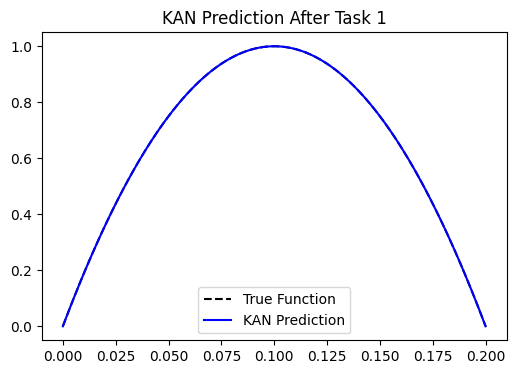


=== Training on Task #2 ===


| train_loss: 1.12e-05 | test_loss: 1.12e-05 | reg: 3.13e+00 | : 100%|█| 100/100 [00:01<00:00, 74.04


saving model version 0.2


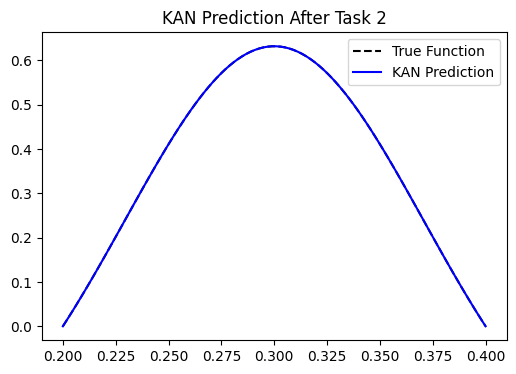


=== Training on Task #3 ===


| train_loss: 3.76e-03 | test_loss: 3.76e-03 | reg: 3.36e+00 | : 100%|█| 100/100 [00:01<00:00, 72.30


saving model version 0.3


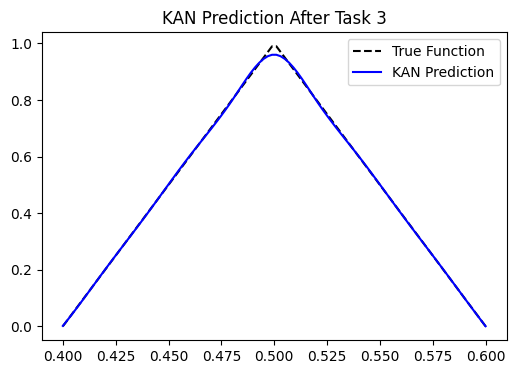


=== Training on Task #4 ===


| train_loss: 4.81e-09 | test_loss: 4.81e-09 | reg: 1.89e+00 | : 100%|█| 100/100 [00:01<00:00, 72.72


saving model version 0.4


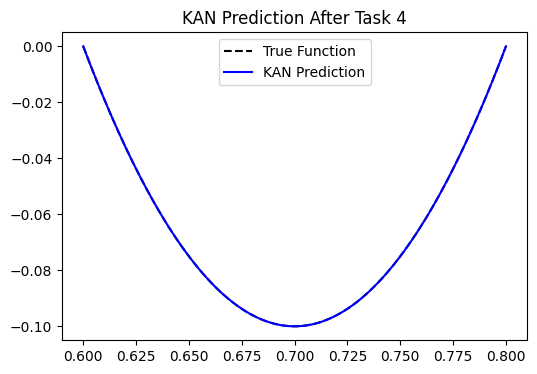


=== Training on Task #5 ===


| train_loss: 3.35e-07 | test_loss: 3.35e-07 | reg: 3.39e+00 | : 100%|█| 100/100 [00:01<00:00, 57.64


saving model version 0.5


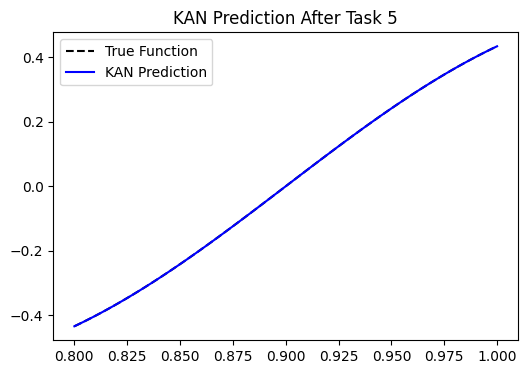

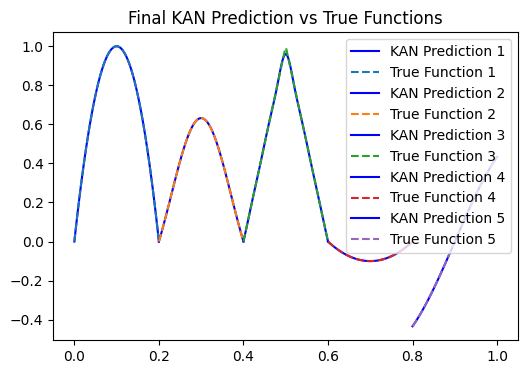

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN 

def quadratic_fn(x):
    return -100 * x * (x - 0.2)

def gaussian_fn(x):
    return torch.exp(-100 * (x - 0.3) ** 2) - torch.exp(-100 * torch.tensor(0.2 - 0.3) ** 2) 

def absolute_fn(x):
    return -10 * torch.abs(x - 0.5) + 1  

def polynomial_fn(x):
    k = 10  # Scaling factor
    return k * (x - 0.6) * (x - 0.8)  

def sinusoidal_fn(x):
    return torch.sin(5 * (x - 0.9)) * torch.exp(-10 * (x - 0.9) ** 2) 

functions = [quadratic_fn, gaussian_fn, absolute_fn, polynomial_fn, sinusoidal_fn]



n_sample = 500
x_grid = torch.linspace(0, 1, steps=n_sample)

n_tasks = len(functions)
x_ranges = torch.linspace(0, 1, steps=n_tasks + 1)

datasets = []

for i, func in enumerate(functions):
    x_min, x_max = x_ranges[i], x_ranges[i + 1] 
    x_local_grid = torch.linspace(x_min, x_max, steps=n_sample // n_tasks)
    y_grid = func(x_local_grid)
    
    n_samples_per_task = 100
    x_samples = x_min + (x_max - x_min) * torch.rand(n_samples_per_task)
    y_samples = func(x_samples)
    
    dataset = {
        'train_input': x_samples[:, None],  # Reshape to (N, 1)
        'train_label': y_samples[:, None],  # Reshape to (N, 1)
        'test_input': x_samples[:, None],
        'test_label': y_samples[:, None]
    }
    datasets.append((dataset, (x_local_grid, y_grid)))



model = KAN(
    width=[1, 1],
    grid=100,  
    k=3,  
    noise_scale=0.1,
    sp_trainable=False,
    sb_trainable=False,
    base_fun='zero'
)

predictions_after_tasks = []

for task_idx, (dataset, (x_local_grid, true_y)) in enumerate(datasets):
    print(f"\n=== Training on Task #{task_idx+1} ===")
    
    model.fit(dataset, opt='LBFGS', steps=100, update_grid=False)
    
    with torch.no_grad():
        y_pred = model(x_local_grid[:, None])
    predictions_after_tasks.append((x_local_grid.numpy(), y_pred.detach().numpy()))
    
    # Plot after each task
    plt.figure(figsize=(6, 4))
    plt.title(f"KAN Prediction After Task {task_idx+1}")
    plt.plot(x_local_grid.numpy(), true_y.numpy(), color='black', linestyle='dashed', label="True Function")
    plt.plot(x_local_grid.numpy(), predictions_after_tasks[-1][1], color='blue', label="KAN Prediction")
    plt.legend()
    plt.show()


plt.figure(figsize=(6, 4))
plt.title("Final KAN Prediction vs True Functions")

for i, (x_local_grid, final_pred) in enumerate(predictions_after_tasks):
    plt.plot(x_local_grid, final_pred, color='blue', label=f"KAN Prediction {i+1}")
    plt.plot(x_local_grid, datasets[i][1][1].numpy(), linestyle='dashed', label=f"True Function {i+1}")
plt.legend()
plt.show()


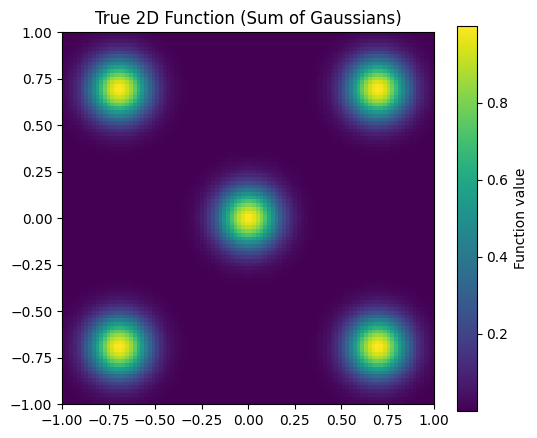

checkpoint directory created: ./model
saving model version 0.0

=== Training on Empty Areas Only (Phase 1) ===


| train_loss: 1.60e-07 | test_loss: 1.60e-07 | reg: 1.04e+00 | : 100%|█| 50/50 [00:45<00:00,  1.10it


saving model version 0.1


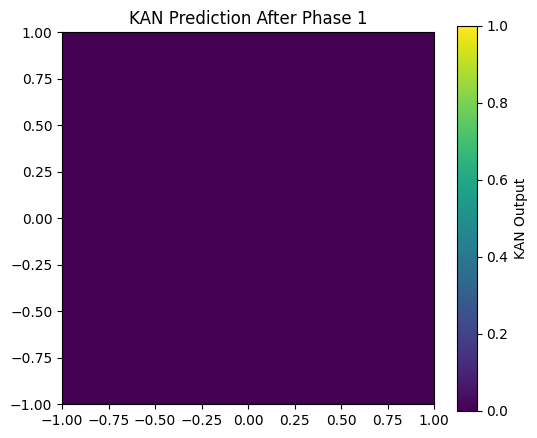


=== Training on Peak #1 (With Empty Areas) ===


| train_loss: 7.76e-05 | test_loss: 1.65e-04 | reg: 2.31e+01 | : 100%|█| 50/50 [01:20<00:00,  1.61s/


saving model version 0.2


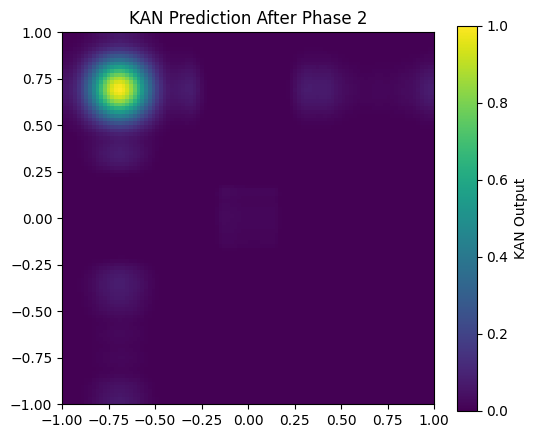


=== Training on Peak #2 (With Empty Areas) ===


| train_loss: 1.14e-04 | test_loss: 2.32e-04 | reg: 2.39e+01 | : 100%|█| 50/50 [01:20<00:00,  1.61s/


saving model version 0.3


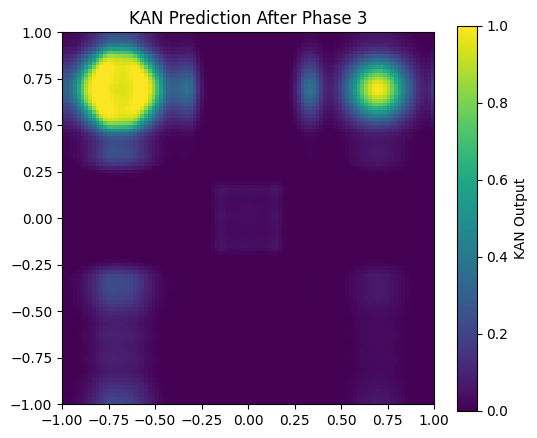


=== Training on Peak #3 (With Empty Areas) ===


| train_loss: 9.03e-05 | test_loss: 1.76e-04 | reg: 2.42e+01 | : 100%|█| 50/50 [01:21<00:00,  1.63s/


saving model version 0.4


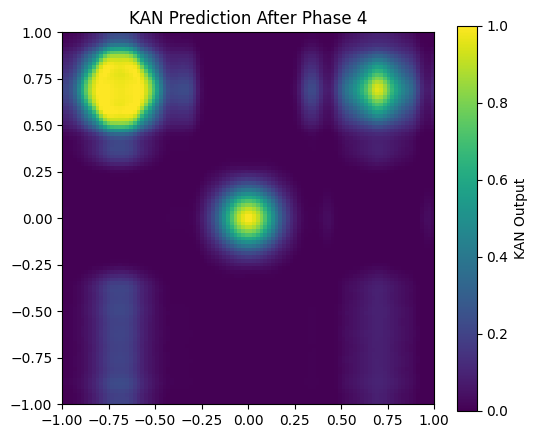


=== Training on Peak #4 (With Empty Areas) ===


| train_loss: 1.19e-04 | test_loss: 2.48e-04 | reg: 2.42e+01 | : 100%|█| 50/50 [01:21<00:00,  1.63s/


saving model version 0.5


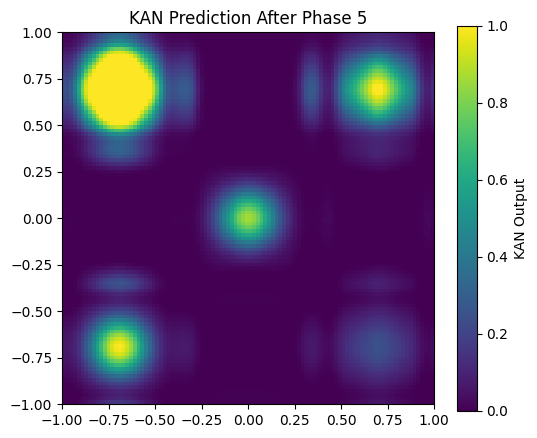


=== Training on Peak #5 (With Empty Areas) ===


| train_loss: 9.69e-05 | test_loss: 1.99e-04 | reg: 2.39e+01 | : 100%|█| 50/50 [01:20<00:00,  1.62s/


saving model version 0.6


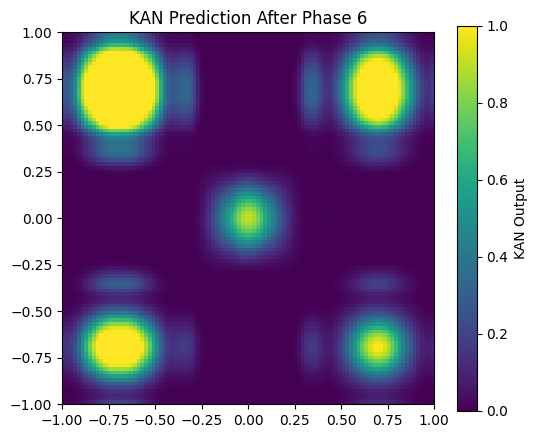

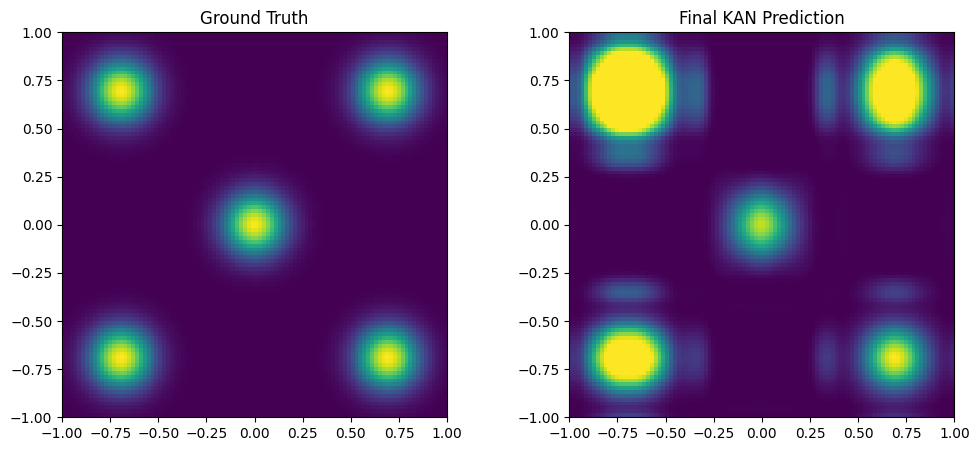

In [59]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN 
# Define peak locations
peak_regions = {
    "a11": [-0.7,  0.7],  # Top-left
    "a13": [ 0.7,  0.7],  # Top-right
    "a22": [ 0.0,  0.0],  # Center
    "a31": [-0.7, -0.7],  # Bottom-left
    "a33": [ 0.7, -0.7]   # Bottom-right
}

# Define empty regions that should be learned as 0 first
empty_regions = {
    "a21": [-0.7,  0.0],  # Middle-left
    "a12": [ 0.0,  0.7],  # Top-middle
    "a23": [ 0.7,  0.0],  # Middle-right
    "a32": [ 0.0, -0.7]   # Bottom-middle
}



grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')

xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)


sigma = 40.0  # Sharpness of peaks
f_grid = torch.zeros(xy_grid.shape[0])

for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma * dist_sq)


f_grid_2d = f_grid.view(grid_size, grid_size)

plt.figure(figsize=(6, 5))
plt.title("True 2D Function (Sum of Gaussians)")
plt.imshow(f_grid_2d.numpy(), origin='lower',
           extent=(-1,1,-1,1), cmap='viridis')
plt.colorbar(label='Function value')
plt.show()



n_samples_per_region = 500  
radius = 0.4  
noise_std = 0.02  

all_datasets = []


empty_x, empty_y = [], []

for center in empty_regions.values():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    empty_x.append(xs)
    empty_y.append(ys)

empty_x = torch.cat(empty_x)
empty_y = torch.cat(empty_y)
empty_xy = torch.stack([empty_x, empty_y], dim=-1)
y_empty = torch.zeros(empty_xy.shape[0])

dataset_empty = {
    'train_input': empty_xy,
    'train_label': y_empty.unsqueeze(-1),
    'test_input': empty_xy,
    'test_label': y_empty.unsqueeze(-1)
}
all_datasets.append(dataset_empty)

for peak_name, center in peak_regions.items():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    xs += torch.randn_like(xs) * noise_std  # Add noise
    ys += torch.randn_like(ys) * noise_std
    xy_samples = torch.stack([xs, ys], dim=-1)

    # Compute function values for the peak
    dist_sq = (xy_samples[:, 0] - center[0])**2 + (xy_samples[:, 1] - center[1])**2
    y_samples = torch.exp(-sigma * dist_sq)


    dataset = {
        'train_input': torch.cat([empty_xy, xy_samples], dim=0),
        'train_label': torch.cat([y_empty.unsqueeze(-1), y_samples.unsqueeze(-1)], dim=0),
        'test_input': xy_samples,
        'test_label': y_samples.unsqueeze(-1)
    }
    all_datasets.append(dataset)



model = KAN(
    width=[2,20,10,1],  # 2D input
    grid=30,  
    k=2,
    noise_scale=0.1,
    sp_trainable=False,
    sb_trainable=False,
    base_fun='zero'
)

predictions_after_phases = []

for phase_idx, dataset in enumerate(all_datasets):
    if phase_idx == 0:
        print("\n=== Training on Empty Areas Only (Phase 1) ===")
    else:
        print(f"\n=== Training on Peak #{phase_idx} (With Empty Areas) ===")

    model.fit(dataset, opt='LBFGS', steps=50, update_grid=False)

    with torch.no_grad():
        y_pred = model(xy_grid)
    pred_2d = y_pred.view(grid_size, grid_size).detach().clone()
    predictions_after_phases.append(pred_2d)

    # Plot after every phase
    plt.figure(figsize=(6, 5))
    plt.title(f"KAN Prediction After Phase {phase_idx+1}")
    plt.imshow(pred_2d.numpy(), origin='lower',
               extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)
    plt.colorbar(label="KAN Output")
    plt.show()



final_pred_2d = predictions_after_phases[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ground Truth
axes[0].set_title("Ground Truth")
axes[0].imshow(f_grid_2d.numpy(), origin='lower',
               extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)

# Final KAN Prediction
axes[1].set_title("Final KAN Prediction")
axes[1].imshow(final_pred_2d.numpy(), origin='lower',
               extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)

plt.show()


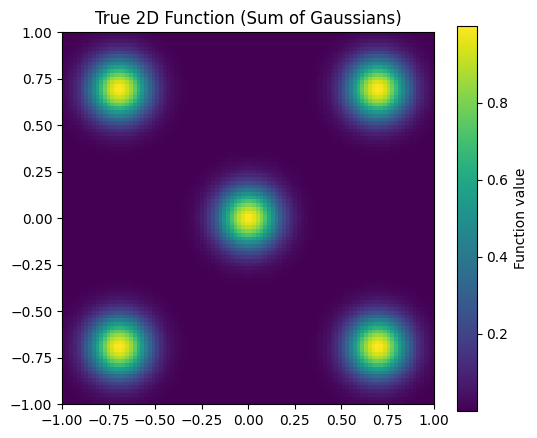

checkpoint directory created: ./model
saving model version 0.0

=== Training on Empty Areas Only (Phase 1) ===


| train_loss: 1.07e-08 | test_loss: 1.07e-08 | reg: 9.12e-01 | : 100%|█| 50/50 [00:32<00:00,  1.56it


saving model version 0.1


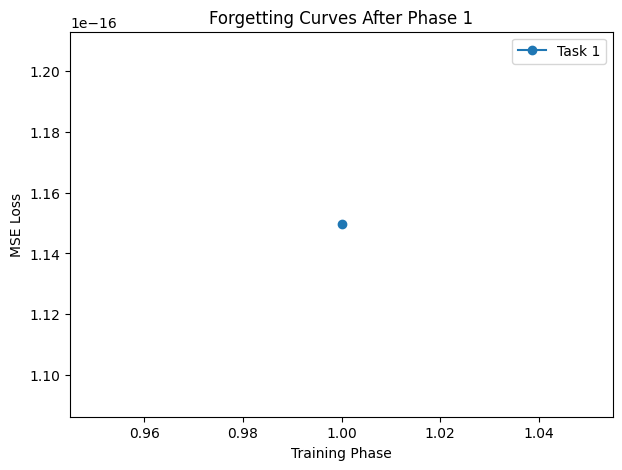


=== Training on Peak #1 (With Empty Areas) ===


| train_loss: 1.21e-04 | test_loss: 2.52e-04 | reg: 1.68e+01 | : 100%|█| 50/50 [01:10<00:00,  1.40s/


saving model version 0.2


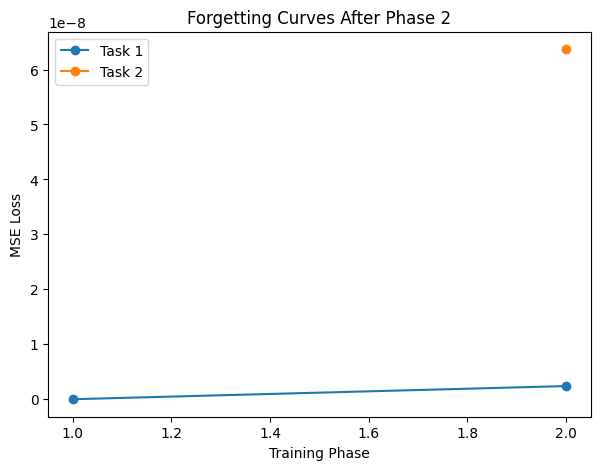


=== Training on Peak #2 (With Empty Areas) ===


| train_loss: 1.44e-04 | test_loss: 3.14e-04 | reg: 1.64e+01 | : 100%|█| 50/50 [01:10<00:00,  1.42s/


saving model version 0.3


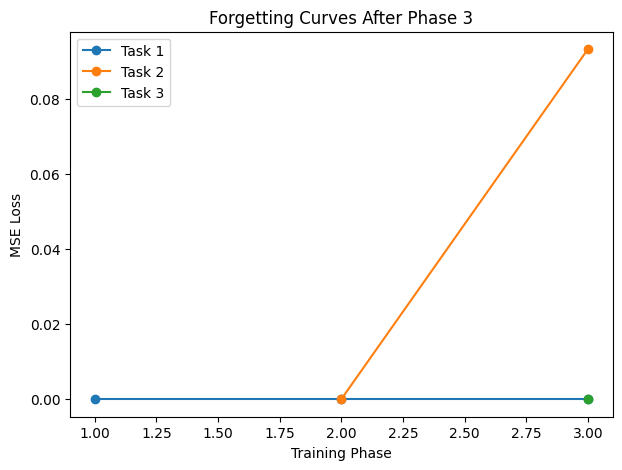


=== Training on Peak #3 (With Empty Areas) ===


| train_loss: 1.01e-04 | test_loss: 2.05e-04 | reg: 1.76e+01 | : 100%|█| 50/50 [01:11<00:00,  1.43s/


saving model version 0.4


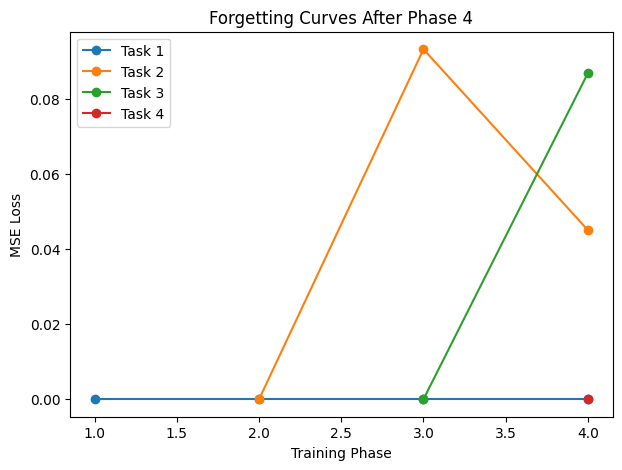


=== Training on Peak #4 (With Empty Areas) ===


| train_loss: 1.19e-04 | test_loss: 2.52e-04 | reg: 1.79e+01 | : 100%|█| 50/50 [01:09<00:00,  1.39s/


saving model version 0.5


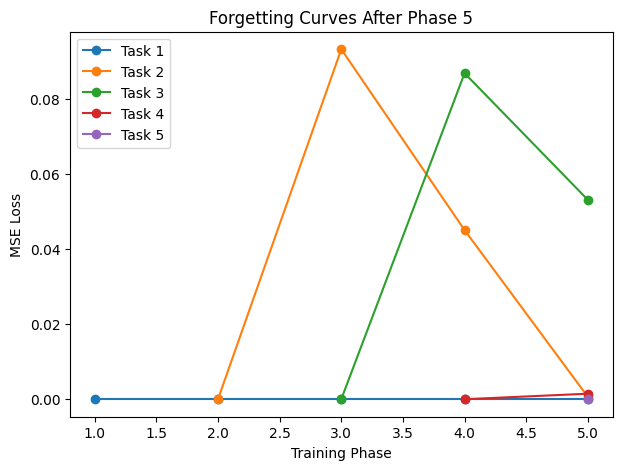


=== Training on Peak #5 (With Empty Areas) ===


| train_loss: 1.04e-04 | test_loss: 2.22e-04 | reg: 1.79e+01 | : 100%|█| 50/50 [01:09<00:00,  1.39s/


saving model version 0.6


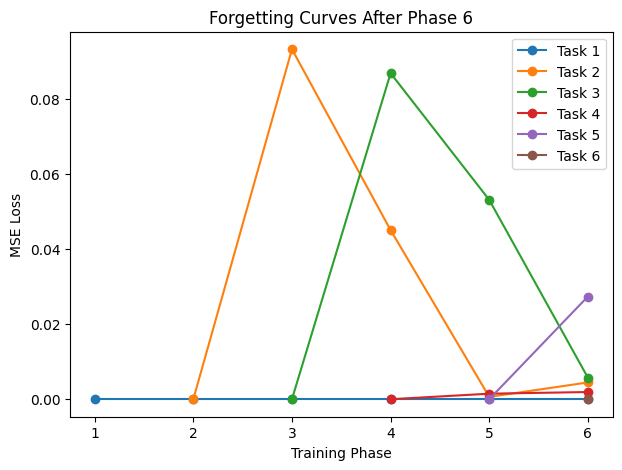

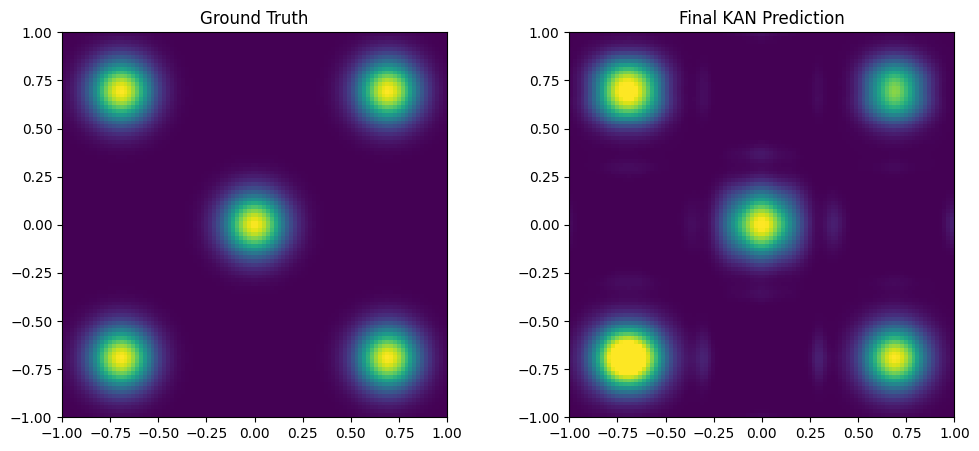

In [64]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN  # Ensure the KAN library is installed or accessible

###############################################################################
# 1. Define the 9-Region Grid for Learning
###############################################################################

# Define peak locations
peak_regions = {
    "a11": [-0.7,  0.7],  # Top-left
    "a13": [ 0.7,  0.7],  # Top-right
    "a22": [ 0.0,  0.0],  # Center
    "a31": [-0.7, -0.7],  # Bottom-left
    "a33": [ 0.7, -0.7]   # Bottom-right
}

# Define empty regions that should be learned as 0 first
empty_regions = {
    "a21": [-0.7,  0.0],  # Middle-left
    "a12": [ 0.0,  0.7],  # Top-middle
    "a23": [ 0.7,  0.0],  # Middle-right
    "a32": [ 0.0, -0.7]   # Bottom-middle
}



grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')


xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)

sigma = 40.0  # Sharpness of peaks
f_grid = torch.zeros(xy_grid.shape[0])

for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma * dist_sq)

f_grid_2d = f_grid.view(grid_size, grid_size)
  # Radius of sampled points around peaks
plt.figure(figsize=(6, 5))
plt.title("True 2D Function (Sum of Gaussians)")
plt.imshow(f_grid_2d.numpy(), origin='lower',
           extent=(-1,1,-1,1), cmap='viridis')
plt.colorbar(label='Function value')
plt.show()



n_samples_per_region = 500 
radius = 0.25  # Radius of sampled points around peaks
noise_std = 0.02  # Noise to prevent overfitting

all_datasets = []

### **Phase 1: Learn the empty regions first**
empty_x, empty_y = [], []

for center in empty_regions.values():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    empty_x.append(xs)
    empty_y.append(ys)

empty_x = torch.cat(empty_x)
empty_y = torch.cat(empty_y)
empty_xy = torch.stack([empty_x, empty_y], dim=-1)
y_empty = torch.zeros(empty_xy.shape[0])

dataset_empty = {
    'train_input': empty_xy,
    'train_label': y_empty.unsqueeze(-1),
    'test_input': empty_xy,
    'test_label': y_empty.unsqueeze(-1)
}
all_datasets.append(dataset_empty)

### **Phase 2-6: Learn peaks one by one while keeping empty regions**
for peak_name, center in peak_regions.items():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    xs += torch.randn_like(xs) * noise_std  # Add noise
    ys += torch.randn_like(ys) * noise_std
    xy_samples = torch.stack([xs, ys], dim=-1)

    # Compute function values for the peak
    dist_sq = (xy_samples[:, 0] - center[0])**2 + (xy_samples[:, 1] - center[1])**2
    y_samples = torch.exp(-sigma * dist_sq)

    # Keep previously learned empty areas + new peak
    dataset = {
        'train_input': torch.cat([empty_xy, xy_samples], dim=0),
        'train_label': torch.cat([y_empty.unsqueeze(-1), y_samples.unsqueeze(-1)], dim=0),
        'test_input': xy_samples,
        'test_label': y_samples.unsqueeze(-1)
    }
    all_datasets.append(dataset)

###############################################################################
# 4. Train KAN Model Sequentially (Continual Learning) & Track Forgetting
###############################################################################

# Initialize KAN model
model = KAN(
    width=[2, 18, 9, 1],  # 2D input -> 1D output
    grid=30,  # Lower resolution to avoid overfitting to grid artifacts
    k=2,  # Lower spline complexity to reduce grid artifacts
    noise_scale=0.1,
    sp_trainable=False,
    sb_trainable=False,
    base_fun='zero'
)

# Store loss history for forgetting curve
history = {'task_losses': []}

for phase_idx, dataset in enumerate(all_datasets):
    if phase_idx == 0:
        print("\n=== Training on Empty Areas Only (Phase 1) ===")
    else:
        print(f"\n=== Training on Peak #{phase_idx} (With Empty Areas) ===")

    model.fit(dataset, opt='LBFGS', steps=50, update_grid=False)

    # Evaluate on all previously seen tasks
    phase_losses = []
    for past_phase in range(phase_idx + 1):
        test_input = all_datasets[past_phase]['test_input']
        test_label = all_datasets[past_phase]['test_label']

        with torch.no_grad():
            y_pred = model(test_input)
            mse_loss = torch.nn.functional.mse_loss(y_pred, test_label).item()

        phase_losses.append(mse_loss)

    history['task_losses'].append(phase_losses)

    # Plot forgetting curves after every phase
    def plot_forgetting(history, title):
        n_tasks = len(history['task_losses'])
        plt.figure(figsize=(7, 5))
        for task_idx in range(n_tasks):
            # Extract loss history for task `task_idx` across phases
            losses = []
            phases = []
            for phase, phase_losses in enumerate(history['task_losses']):
                if len(phase_losses) > task_idx:
                    losses.append(phase_losses[task_idx])
                    phases.append(phase + 1)  # Phase numbering starting at 1
            plt.plot(phases, losses, marker='o', label=f"Task {task_idx+1}")
        plt.xlabel("Training Phase")
        plt.ylabel("MSE Loss")
        plt.title(title)
        plt.legend()
        plt.show()

    plot_forgetting(history, "Forgetting Curves After Phase {}".format(phase_idx + 1))  # Radius of sampled points around peaks

###############################################################################
# 5. Final Comparison: True Function vs. Final KAN Prediction
###############################################################################

final_pred_2d = model(xy_grid).view(grid_size, grid_size).detach().numpy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Ground Truth
axes[0].set_title("Ground Truth")
axes[0].imshow(f_grid_2d.numpy(), origin='lower',
               extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)

# Final KAN Prediction
axes[1].set_title("Final KAN Prediction")
axes[1].imshow(final_pred_2d, origin='lower',
               extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)

plt.show()


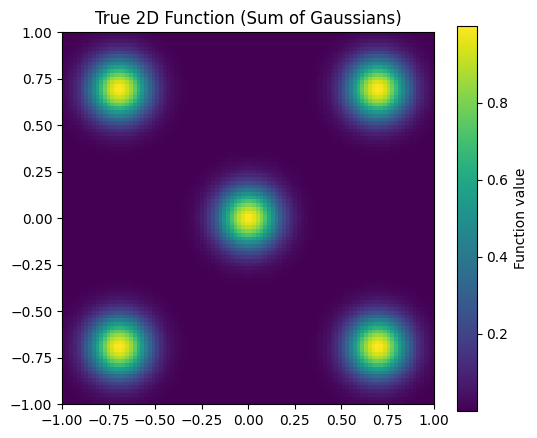

checkpoint directory created: ./model
saving model version 0.0

=== Training on Empty Areas Only (Phase 1) ===


| train_loss: 1.51e-07 | test_loss: 1.51e-07 | reg: 1.05e+00 | : 100%|█| 50/50 [00:25<00:00,  1.97it

saving model version 0.1


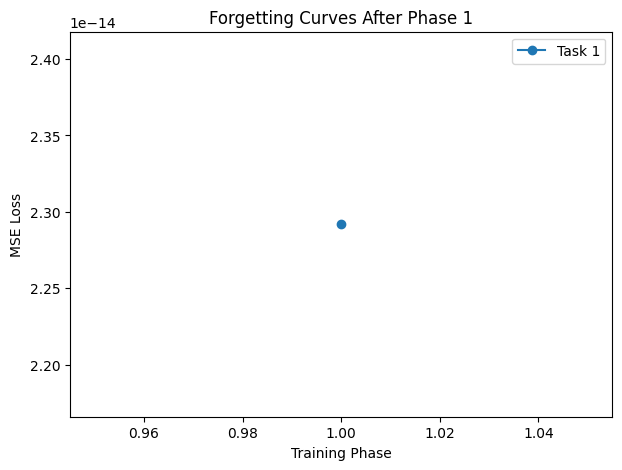

Average Forgetting after Phase 1: 0.0000

=== Training on Peak #1 (With Empty Areas) ===


| train_loss: 2.05e-04 | test_loss: 4.20e-04 | reg: 1.97e+01 | : 100%|█| 50/50 [00:57<00:00,  1.15s/


saving model version 0.2


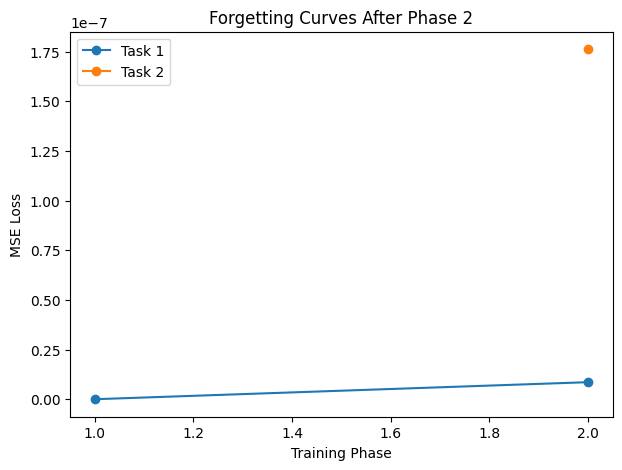

Average Forgetting after Phase 2: 0.0000

=== Training on Peak #2 (With Empty Areas) ===


| train_loss: 1.97e-04 | test_loss: 4.29e-04 | reg: 1.90e+01 | : 100%|█| 50/50 [00:56<00:00,  1.12s/


saving model version 0.3


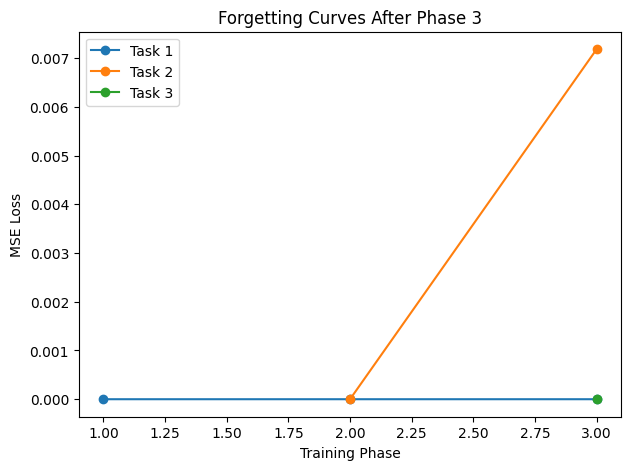

Average Forgetting after Phase 3: 0.0036

=== Training on Peak #3 (With Empty Areas) ===


| train_loss: 1.48e-04 | test_loss: 2.92e-04 | reg: 1.97e+01 | : 100%|█| 50/50 [00:55<00:00,  1.10s/


saving model version 0.4


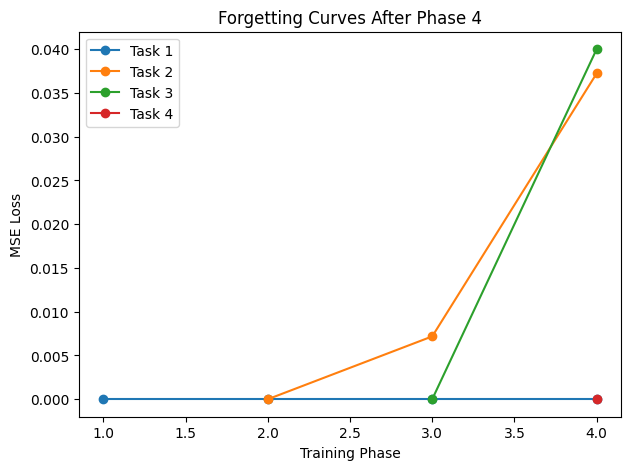

Average Forgetting after Phase 4: 0.0257

=== Training on Peak #4 (With Empty Areas) ===


| train_loss: 2.01e-04 | test_loss: 4.16e-04 | reg: 1.97e+01 | : 100%|█| 50/50 [00:58<00:00,  1.18s/


saving model version 0.5


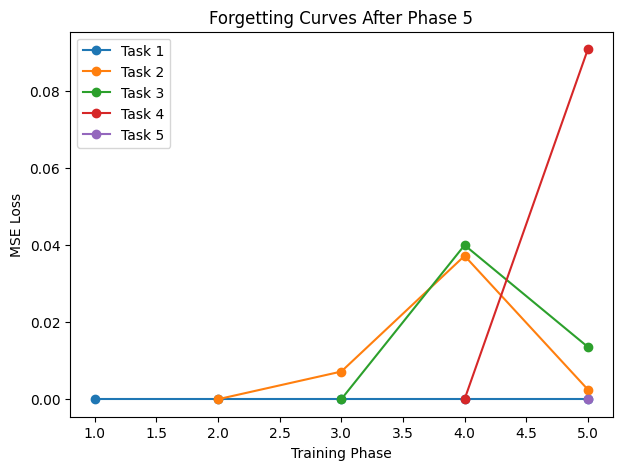

Average Forgetting after Phase 5: 0.0267

=== Training on Peak #5 (With Empty Areas) ===


| train_loss: 1.61e-04 | test_loss: 3.33e-04 | reg: 1.99e+01 | : 100%|█| 50/50 [00:58<00:00,  1.16s/


saving model version 0.6


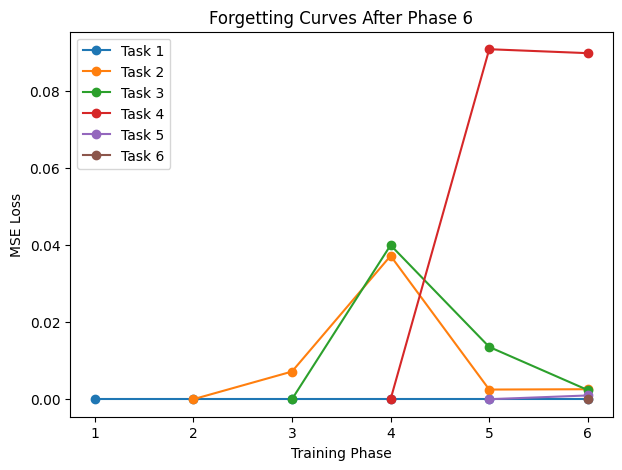

Average Forgetting after Phase 6: 0.0192


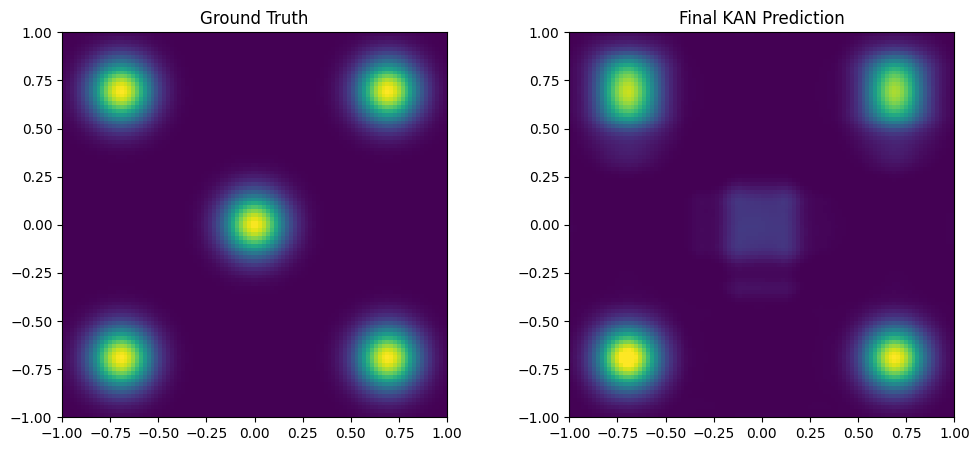

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN  # Ensure the KAN library is installed or accessible


# Define peak locations
peak_regions = {
    "a11": [-0.7,  0.7],  # Top-left
    "a13": [ 0.7,  0.7],  # Top-right
    "a22": [ 0.0,  0.0],  # Center
    "a31": [-0.7, -0.7],  # Bottom-left
    "a33": [ 0.7, -0.7]   # Bottom-right
}

# Define empty regions that should be learned as 0 first
empty_regions = {
    "a21": [-0.7,  0.0],  # Middle-left
    "a12": [ 0.0,  0.7],  # Top-middle
    "a23": [ 0.7,  0.0],  # Middle-right
    "a32": [ 0.0, -0.7]   # Bottom-middle
}



grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')

xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)

sigma = 40.0  
f_grid = torch.zeros(xy_grid.shape[0])
for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma * dist_sq)

f_grid_2d = f_grid.view(grid_size, grid_size)

plt.figure(figsize=(6, 5))
plt.title("True 2D Function (Sum of Gaussians)")
plt.imshow(f_grid_2d.numpy(), origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar(label='Function value')
plt.show()



n_samples_per_region = 500 
radius = 0.25              
noise_std = 0.02          

all_datasets = []


empty_x, empty_y = [], []
for center in empty_regions.values():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    empty_x.append(xs)
    empty_y.append(ys)

empty_x = torch.cat(empty_x)
empty_y = torch.cat(empty_y)
empty_xy = torch.stack([empty_x, empty_y], dim=-1)
y_empty = torch.zeros(empty_xy.shape[0])

dataset_empty = {
    'train_input': empty_xy,
    'train_label': y_empty.unsqueeze(-1),
    'test_input': empty_xy,
    'test_label': y_empty.unsqueeze(-1)
}
all_datasets.append(dataset_empty)


for peak_name, center in peak_regions.items():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    xs += torch.randn_like(xs) * noise_std  # Add noise
    ys += torch.randn_like(ys) * noise_std
    xy_samples = torch.stack([xs, ys], dim=-1)

    dist_sq = (xy_samples[:, 0] - center[0])**2 + (xy_samples[:, 1] - center[1])**2
    y_samples = torch.exp(-sigma * dist_sq)

    dataset = {
        'train_input': torch.cat([empty_xy, xy_samples], dim=0),
        'train_label': torch.cat([y_empty.unsqueeze(-1), y_samples.unsqueeze(-1)], dim=0),
        'test_input': xy_samples,
        'test_label': y_samples.unsqueeze(-1)
    }
    all_datasets.append(dataset)

model = KAN(
    width=[2, 18, 9, 1],  # 2D input
    grid=20,           
    k=2,              
    noise_scale=0.1,
    sp_trainable=False,
    sb_trainable=False,
    base_fun='zero'
)


history = {'task_losses': []}


def compute_average_forgetting(history):

    final_phase = len(history['task_losses']) - 1
    forgetting_values = []
    # Only consider tasks that were introduced before the final phase.
    for task_idx in range(final_phase):
        # For task i, it was first introduced in phase i.
        # Find the best (lowest) loss achieved for this task from phase i to final_phase.
        best_loss = min(history['task_losses'][phase][task_idx] for phase in range(task_idx, final_phase + 1))
        final_loss = history['task_losses'][final_phase][task_idx]
        forgetting = final_loss - best_loss
        forgetting_values.append(forgetting)
    if forgetting_values:
        return sum(forgetting_values) / len(forgetting_values)
    else:
        return 0.0

for phase_idx, dataset in enumerate(all_datasets):
    if phase_idx == 0:
        print("\n=== Training on Empty Areas Only (Phase 1) ===")
    else:
        print(f"\n=== Training on Peak #{phase_idx} (With Empty Areas) ===")

    model.fit(dataset, opt='LBFGS', steps=50, update_grid=False)

    # Evaluate on all previously seen tasks
    phase_losses = []
    for past_phase in range(phase_idx + 1):
        test_input = all_datasets[past_phase]['test_input']
        test_label = all_datasets[past_phase]['test_label']
        with torch.no_grad():
            y_pred = model(test_input)
            mse_loss = torch.nn.functional.mse_loss(y_pred, test_label).item()
        phase_losses.append(mse_loss)
    history['task_losses'].append(phase_losses)

    # Plot forgetting curves after every phase
    def plot_forgetting(history, title):
        n_tasks = len(history['task_losses'])
        plt.figure(figsize=(7, 5))
        for task_idx in range(n_tasks):
            losses = []
            phases = []
            for phase, phase_losses in enumerate(history['task_losses']):
                if len(phase_losses) > task_idx:
                    losses.append(phase_losses[task_idx])
                    phases.append(phase + 1)  # Phase numbering starting at 1
            plt.plot(phases, losses, marker='o', label=f"Task {task_idx+1}")
        plt.xlabel("Training Phase")
        plt.ylabel("MSE Loss")
        plt.title(title)
        plt.legend()
        plt.show()

    plot_forgetting(history, f"Forgetting Curves After Phase {phase_idx + 1}")

    # Compute and print the average forgetting metric after this phase.
    avg_forgetting = compute_average_forgetting(history)
    print(f"Average Forgetting after Phase {phase_idx + 1}: {avg_forgetting:.4f}")


final_pred_2d = model(xy_grid).view(grid_size, grid_size).detach().numpy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ground Truth
axes[0].set_title("Ground Truth")
axes[0].imshow(f_grid_2d.numpy(), origin='lower',
               extent=(-1, 1, -1, 1), cmap='viridis', vmin=0, vmax=1)

# Final KAN Prediction
axes[1].set_title("Final KAN Prediction")
axes[1].imshow(final_pred_2d, origin='lower',
               extent=(-1, 1, -1, 1), cmap='viridis', vmin=0, vmax=1)

plt.show()


Using device: cuda

Running with lambda_ewc=0.1, epochs=500, hidden_dim=50, depth=4
Trainable parameters: 7851


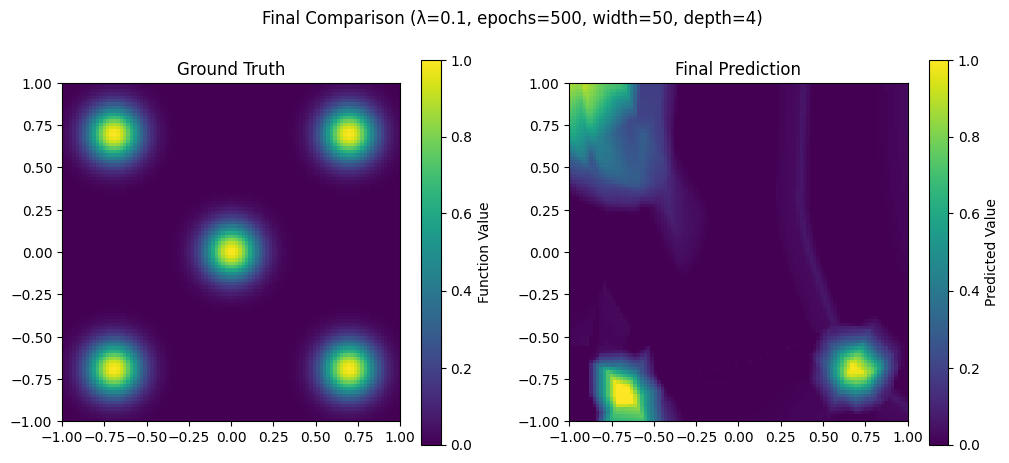

Final MSE (Forgetting Metric): 0.0447

Running with lambda_ewc=0.1, epochs=500, hidden_dim=50, depth=6
Trainable parameters: 12951


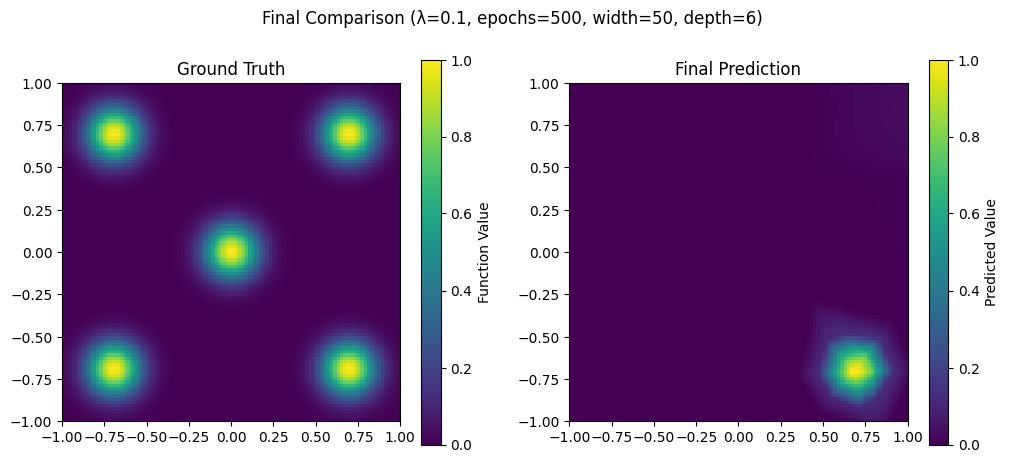

Final MSE (Forgetting Metric): 0.0401

Running with lambda_ewc=0.1, epochs=500, hidden_dim=100, depth=4
Trainable parameters: 30701


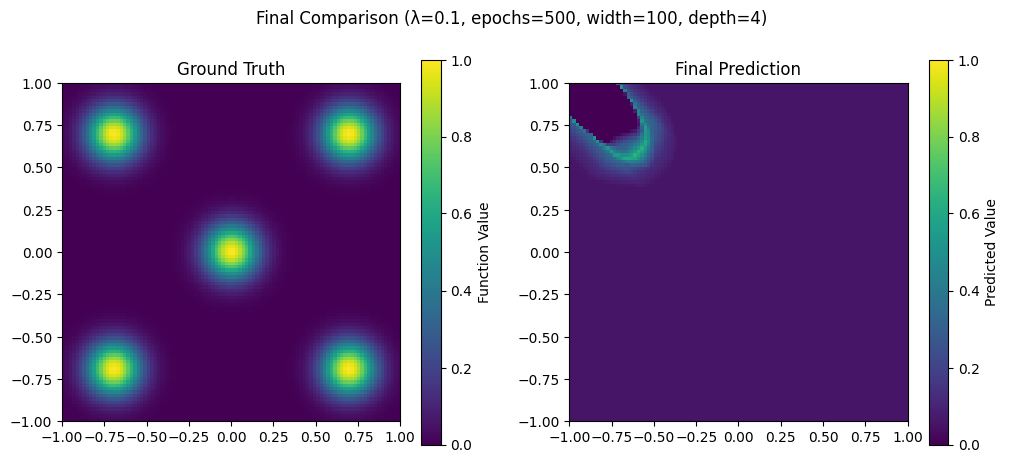

Final MSE (Forgetting Metric): 0.0621

Running with lambda_ewc=0.1, epochs=500, hidden_dim=100, depth=6
Trainable parameters: 50901


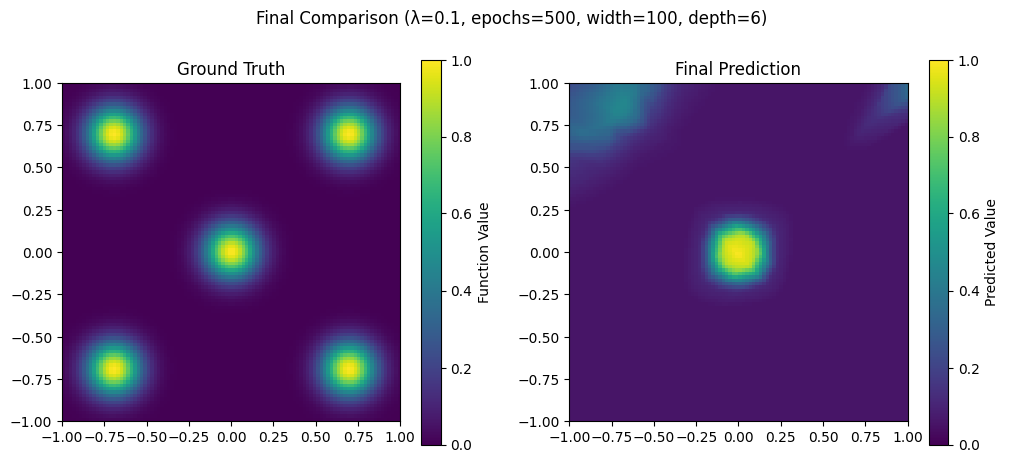

Final MSE (Forgetting Metric): 0.0319

Running with lambda_ewc=0.1, epochs=1000, hidden_dim=50, depth=4
Trainable parameters: 7851


Final MSE (Forgetting Metric): 0.0423

Running with lambda_ewc=0.1, epochs=1000, hidden_dim=50, depth=6
Trainable parameters: 12951


Final MSE (Forgetting Metric): 0.0405

Running with lambda_ewc=0.1, epochs=1000, hidden_dim=100, depth=4
Trainable parameters: 30701


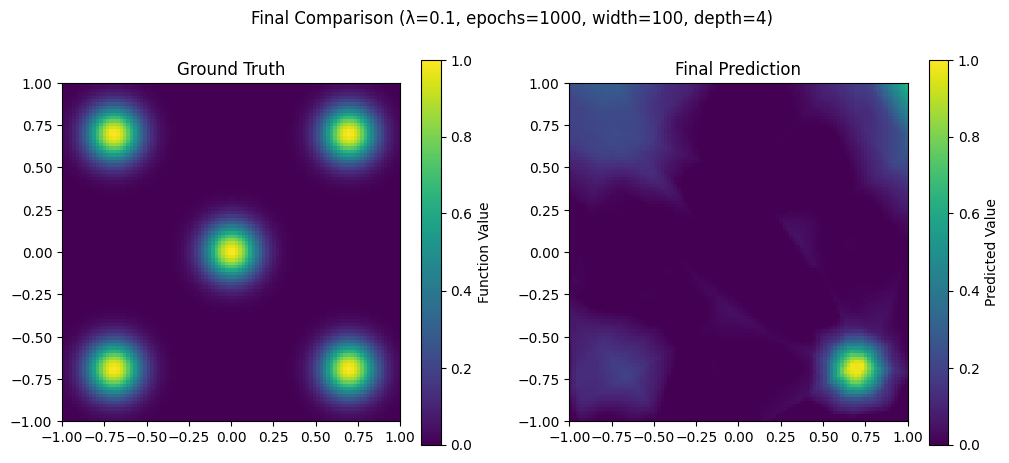

Final MSE (Forgetting Metric): 0.0330

Running with lambda_ewc=0.1, epochs=1000, hidden_dim=100, depth=6
Trainable parameters: 50901


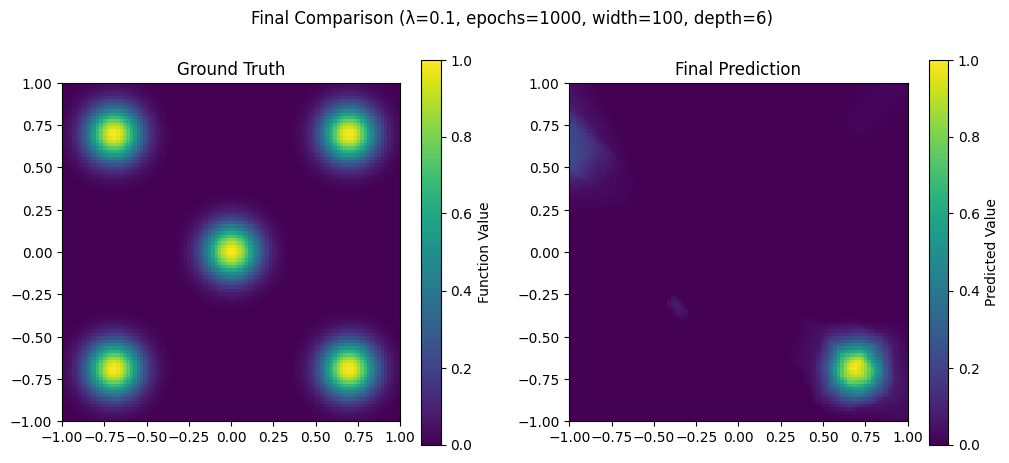

Final MSE (Forgetting Metric): 0.0381

Running with lambda_ewc=0.5, epochs=500, hidden_dim=50, depth=4
Trainable parameters: 7851


Final MSE (Forgetting Metric): 0.0701

Running with lambda_ewc=0.5, epochs=500, hidden_dim=50, depth=6
Trainable parameters: 12951


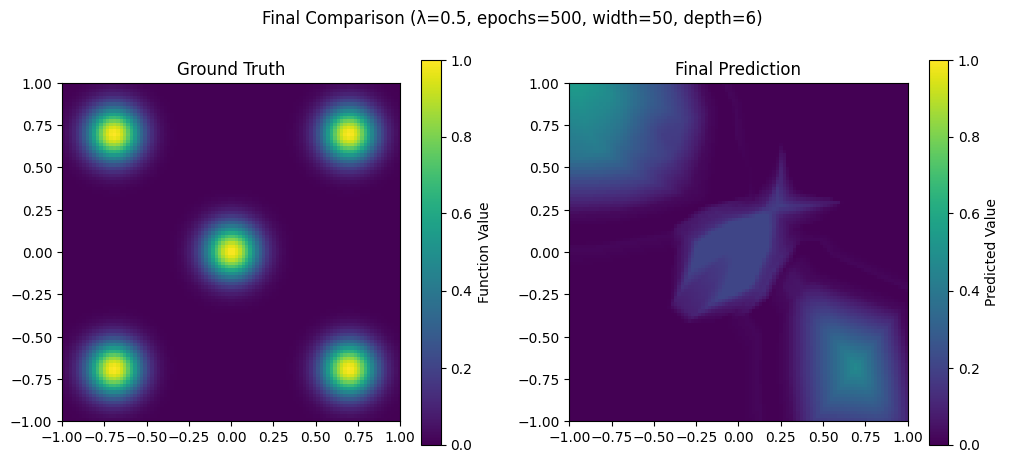

Final MSE (Forgetting Metric): 0.0696

Running with lambda_ewc=0.5, epochs=500, hidden_dim=100, depth=4
Trainable parameters: 30701


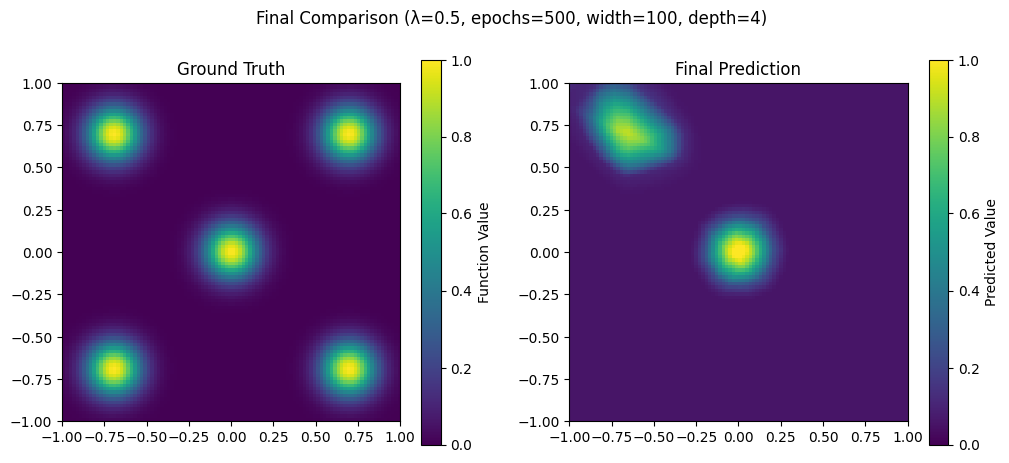

Final MSE (Forgetting Metric): 0.0287

Running with lambda_ewc=0.5, epochs=500, hidden_dim=100, depth=6
Trainable parameters: 50901


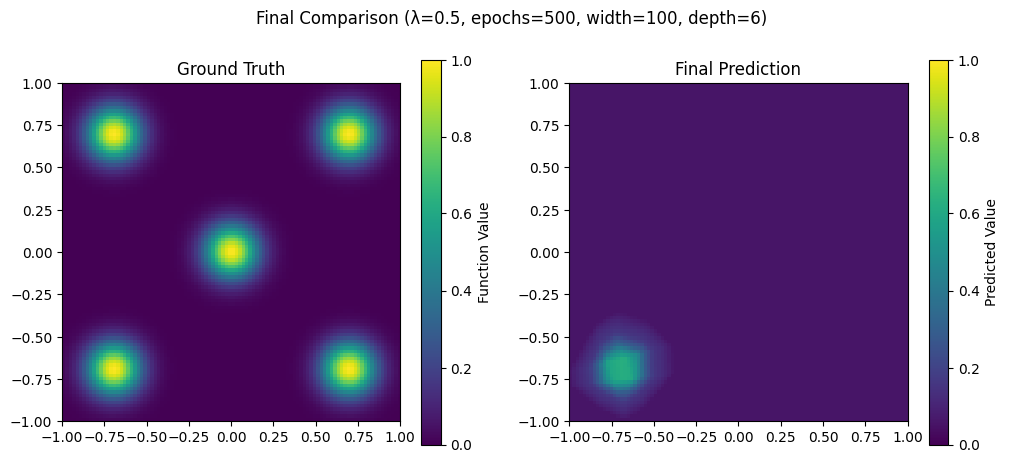

Final MSE (Forgetting Metric): 0.0336

Running with lambda_ewc=0.5, epochs=1000, hidden_dim=50, depth=4
Trainable parameters: 7851


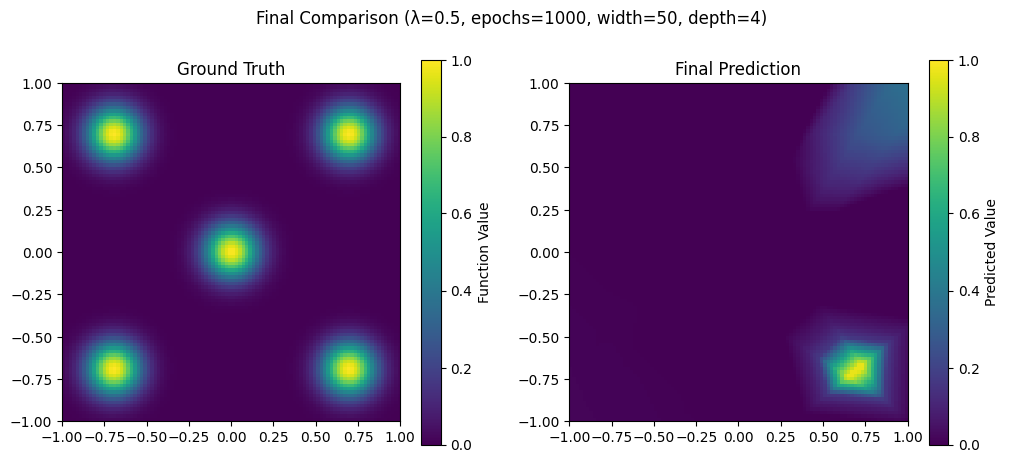

Final MSE (Forgetting Metric): 0.0362

Running with lambda_ewc=0.5, epochs=1000, hidden_dim=50, depth=6
Trainable parameters: 12951


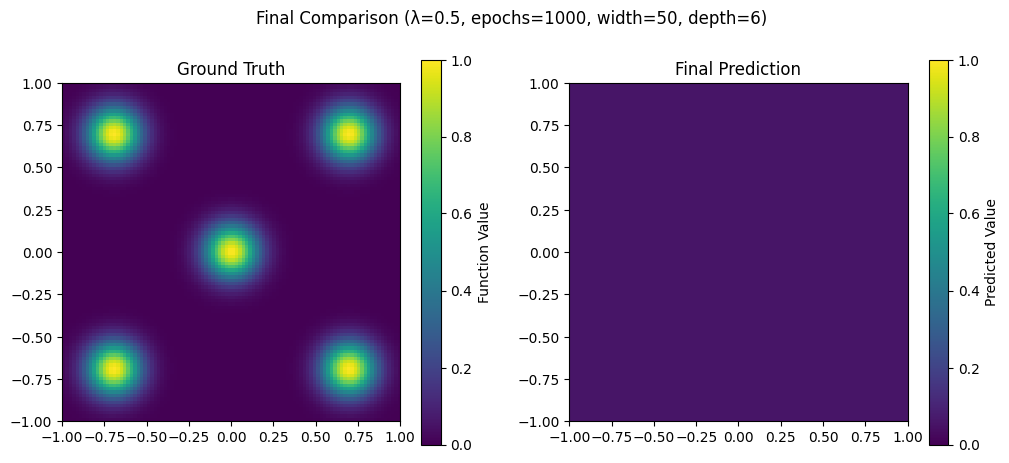

Final MSE (Forgetting Metric): 0.0405

Running with lambda_ewc=0.5, epochs=1000, hidden_dim=100, depth=4
Trainable parameters: 30701


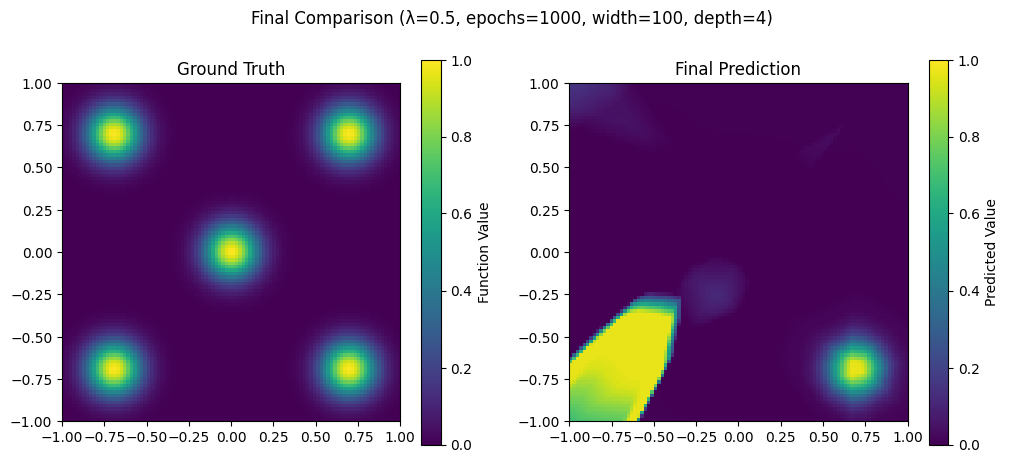

Final MSE (Forgetting Metric): 0.0688

Running with lambda_ewc=0.5, epochs=1000, hidden_dim=100, depth=6
Trainable parameters: 50901


Final MSE (Forgetting Metric): 0.0394

Running with lambda_ewc=0.9, epochs=500, hidden_dim=50, depth=4
Trainable parameters: 7851


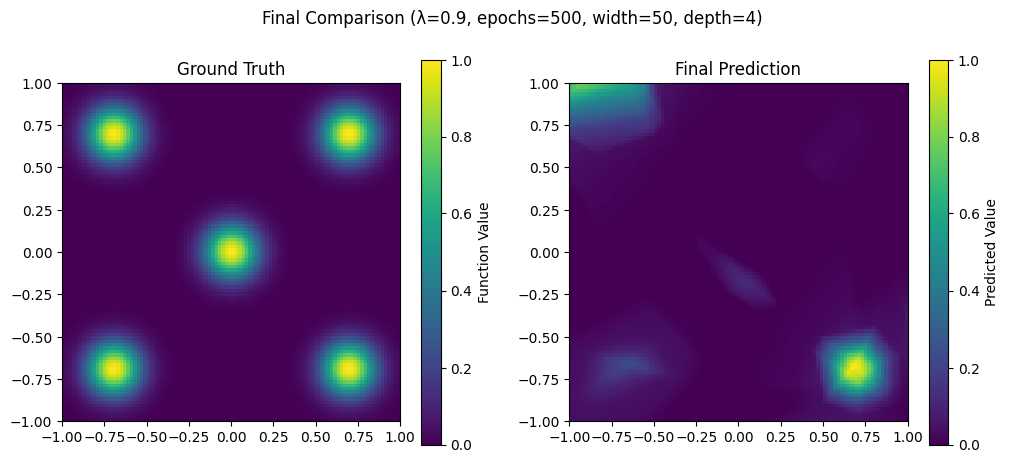

Final MSE (Forgetting Metric): 0.0351

Running with lambda_ewc=0.9, epochs=500, hidden_dim=50, depth=6
Trainable parameters: 12951


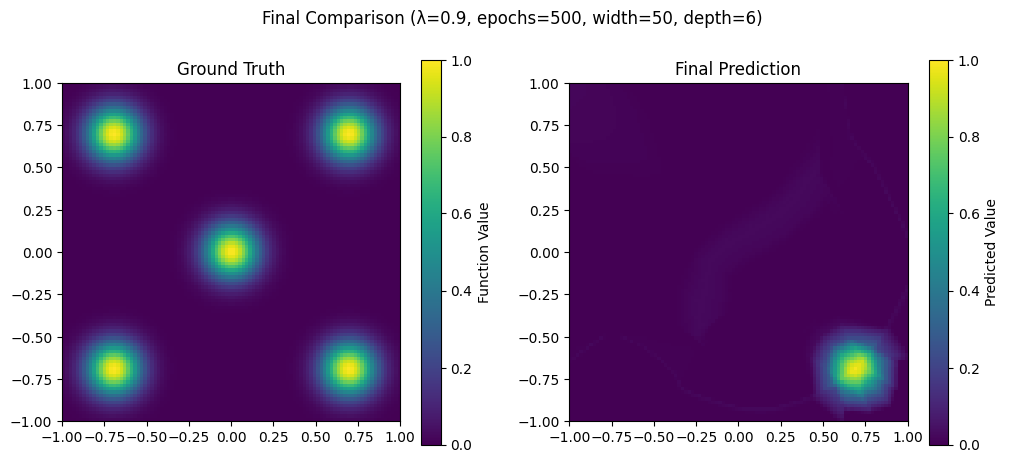

Final MSE (Forgetting Metric): 0.0542

Running with lambda_ewc=0.9, epochs=500, hidden_dim=100, depth=4
Trainable parameters: 30701


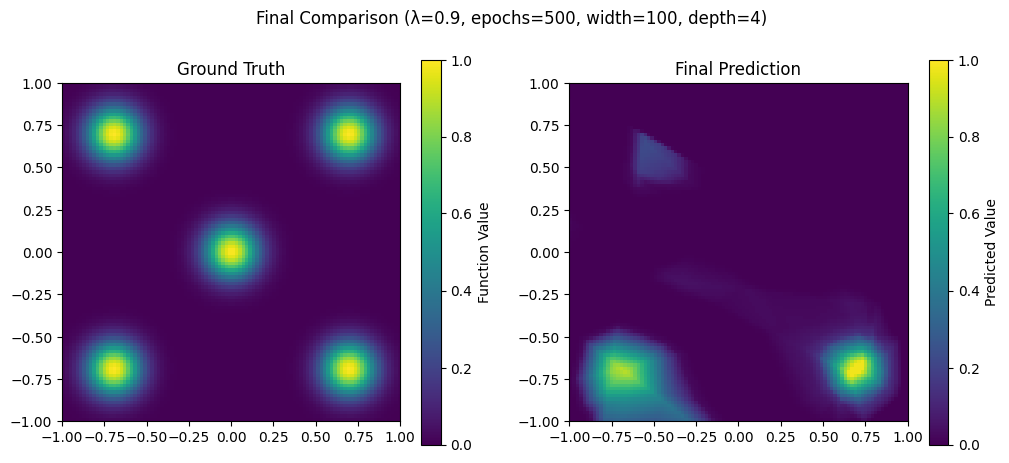

Final MSE (Forgetting Metric): 0.0316

Running with lambda_ewc=0.9, epochs=500, hidden_dim=100, depth=6
Trainable parameters: 50901


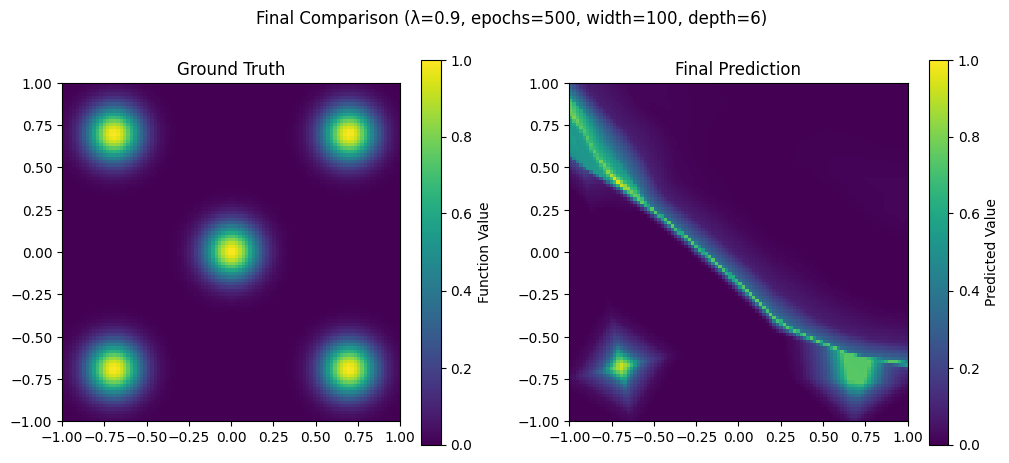

Final MSE (Forgetting Metric): 0.0357

Running with lambda_ewc=0.9, epochs=1000, hidden_dim=50, depth=4
Trainable parameters: 7851


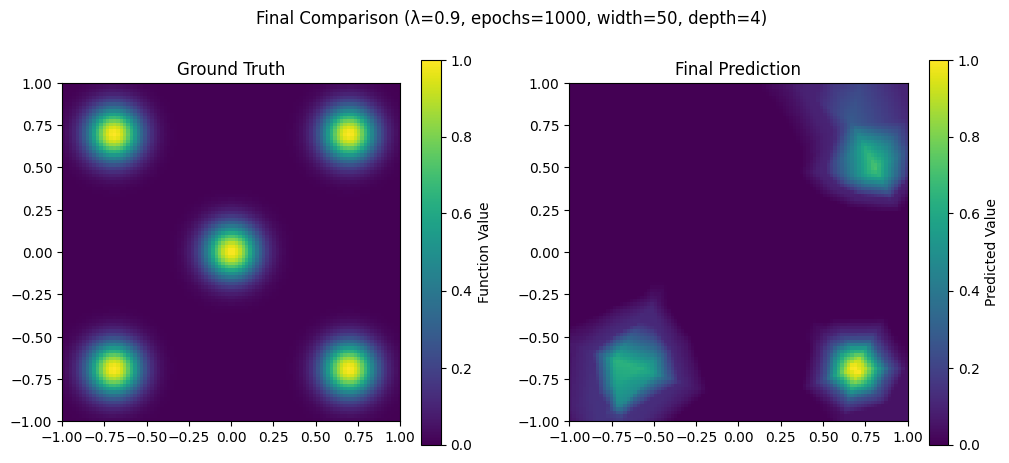

Final MSE (Forgetting Metric): 0.0287

Running with lambda_ewc=0.9, epochs=1000, hidden_dim=50, depth=6
Trainable parameters: 12951


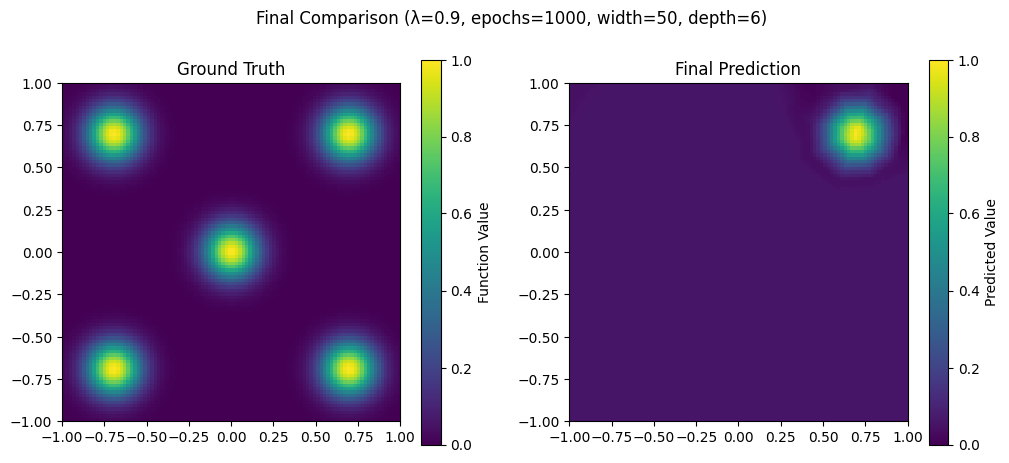

Final MSE (Forgetting Metric): 0.0327

Running with lambda_ewc=0.9, epochs=1000, hidden_dim=100, depth=4
Trainable parameters: 30701


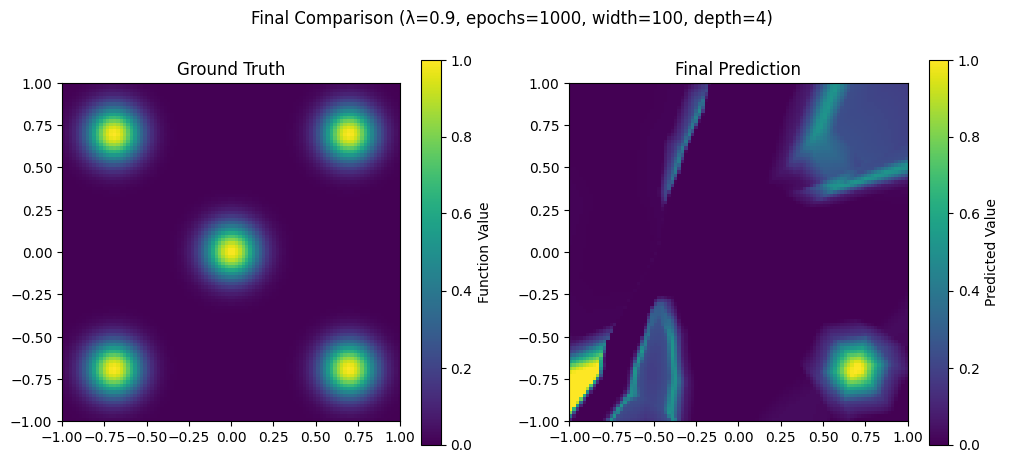

Final MSE (Forgetting Metric): 0.0461

Running with lambda_ewc=0.9, epochs=1000, hidden_dim=100, depth=6
Trainable parameters: 50901


Final MSE (Forgetting Metric): 0.0405

=== Hyperparameter Tuning Summary ===
Candidate: λ=0.1, epochs=500, width=50, depth=4, Final MSE = 0.0447
Candidate: λ=0.1, epochs=500, width=50, depth=6, Final MSE = 0.0401
Candidate: λ=0.1, epochs=500, width=100, depth=4, Final MSE = 0.0621
Candidate: λ=0.1, epochs=500, width=100, depth=6, Final MSE = 0.0319
Candidate: λ=0.1, epochs=1000, width=50, depth=4, Final MSE = 0.0423
Candidate: λ=0.1, epochs=1000, width=50, depth=6, Final MSE = 0.0405
Candidate: λ=0.1, epochs=1000, width=100, depth=4, Final MSE = 0.0330
Candidate: λ=0.1, epochs=1000, width=100, depth=6, Final MSE = 0.0381
Candidate: λ=0.5, epochs=500, width=50, depth=4, Final MSE = 0.0701
Candidate: λ=0.5, epochs=500, width=50, depth=6, Final MSE = 0.0696
Candidate: λ=0.5, epochs=500, width=100, depth=4, Final MSE = 0.0287
Candidate: λ=0.5, epochs=500, width=100, depth=6, Final MSE = 0.0336
Candidate: λ=0.5, epochs=1000, width=50, depth=4, Final MSE = 0.0362
Candidate: λ=0.5, epochs=100

Best Model Final MSE: 0.0337


In [40]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm  # Optional, for progress bars


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


def count_parameters(model):
    """Return the number of trainable parameters in the model."""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def generate_gaussian_bump(center, sigma, n_samples=500):
    """
    Generate a 2D Gaussian bump centered at `center` with standard deviation `sigma`.
    Returns:
        X_t: Tensor of shape (n_samples, 2)
        y_t: Tensor of shape (n_samples, 1)
    """
    x_center, y_center = center
    x = np.random.normal(x_center, sigma, size=(n_samples, 1))
    y = np.random.normal(y_center, sigma, size=(n_samples, 1))
    z = np.exp(-(((x - x_center)**2 + (y - y_center)**2) / (2 * sigma**2)))
    X = np.hstack([x, y])
    y_val = z
    X_t = torch.from_numpy(X).float()
    y_t = torch.from_numpy(y_val).float()
    return X_t, y_t


class SimpleMLP(nn.Module):
    """A simple multilayer perceptron with configurable depth and hidden dimension."""
    def __init__(self, input_dim=2, hidden_dim=32, output_dim=1, depth=2):
        super(SimpleMLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)


def train_sequential_ewc(model, tasks_data, n_epochs=100, lr=0.01, lambda_ewc=0.4):

    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    history = {'task_losses': []}

    ewc_data = []
    
    for task_idx, dataset in enumerate(tasks_data):

        X = dataset['train_input'].to(device)
        y = dataset['train_label'].to(device)
        model.train()

        for epoch in range(n_epochs):
            optimizer.zero_grad()
            output = model(X)
            loss = loss_fn(output, y)
   
            if task_idx > 0:
                for prev in ewc_data:
                    for name, param in model.named_parameters():
                        loss += lambda_ewc * (prev['fisher'][name] * (param - prev['params'][name]).pow(2)).sum()
            loss.backward()
            optimizer.step()
        
        
        model.eval()
        with torch.no_grad():
            X_eval = dataset['test_input'].to(device)
            y_eval = dataset['test_label'].to(device)
            eval_loss = loss_fn(model(X_eval), y_eval).item()
        history['task_losses'].append([eval_loss]) 

        fisher = {n: torch.zeros_like(p) for n, p in model.named_parameters() if p.requires_grad}
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = loss_fn(output, y)
        loss.backward()
        for name, param in model.named_parameters():
            if param.requires_grad:
                fisher[name] += param.grad.detach().clone() ** 2
        params = {name: param.detach().clone() for name, param in model.named_parameters() if param.requires_grad}
        ewc_data.append({'fisher': fisher, 'params': params})
        
    return history


grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')
xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)
# Compute the true function: sum of 2D Gaussians (peaks)
sigma_true = 40.0  # Same as your original code
peak_regions = {
    "a11": [-0.7,  0.7],
    "a13": [ 0.7,  0.7],
    "a22": [ 0.0,  0.0],
    "a31": [-0.7, -0.7],
    "a33": [ 0.7, -0.7]
}
f_grid = torch.zeros(xy_grid.shape[0])
for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma_true * dist_sq)
f_grid_2d = f_grid.view(grid_size, grid_size)


def plot_final_comparison(model, title="Final Prediction vs. Ground Truth"):

    model.eval()
    with torch.no_grad():
        # Move xy_grid to the proper device
        final_pred = model(xy_grid.to(device)).view(grid_size, grid_size)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title("Ground Truth")
    im0 = axes[0].imshow(f_grid_2d.numpy(), origin='lower', extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)
    fig.colorbar(im0, ax=axes[0], label='Function Value')
    axes[1].set_title("Final Prediction")
    im1 = axes[1].imshow(final_pred.cpu().numpy(), origin='lower', extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)
    fig.colorbar(im1, ax=axes[1], label='Predicted Value')
    plt.suptitle(title)
    plt.show()
    mse = nn.functional.mse_loss(final_pred, f_grid_2d.to(final_pred.device)).item()
    return mse


def main_hyperparameter_tuning():
    # Candidate hyperparameters:
    lambda_values = [0.1, 0.5, 0.9]          
    epochs_values   = [500, 1000]         
    hidden_dims     = [50, 100]             
    depths          = [4, 6]               
    # Generate the continual learning dataset.

    n_samples_per_region = 500
    radius = 0.25
    noise_std = 0.02
    empty_regions = {
        "a21": [-0.7,  0.0],
        "a12": [ 0.0,  0.7],
        "a23": [ 0.7,  0.0],
        "a32": [ 0.0, -0.7]
    }
    all_datasets = []
    empty_x, empty_y = [], []
    for center in empty_regions.values():
        xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
        ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
        empty_x.append(xs)
        empty_y.append(ys)
    empty_x = torch.cat(empty_x)
    empty_y = torch.cat(empty_y)
    empty_xy = torch.stack([empty_x, empty_y], dim=-1)
    y_empty = torch.zeros(empty_xy.shape[0])
    dataset_empty = {
        'train_input': empty_xy,
        'train_label': y_empty.unsqueeze(-1),
        'test_input': empty_xy,
        'test_label': y_empty.unsqueeze(-1)
    }
    all_datasets.append(dataset_empty)
    # Phases for peaks (using the same peak_regions as defined above).
    for peak_name, center in peak_regions.items():
        xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
        ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
        xs += torch.randn_like(xs) * noise_std
        ys += torch.randn_like(ys) * noise_std
        xy_samples = torch.stack([xs, ys], dim=-1)
        dist_sq = (xy_samples[:, 0] - center[0])**2 + (xy_samples[:, 1] - center[1])**2
        y_samples = torch.exp(-sigma_true * dist_sq)
        dataset = {
            'train_input': torch.cat([empty_xy, xy_samples], dim=0),
            'train_label': torch.cat([y_empty.unsqueeze(-1), y_samples.unsqueeze(-1)], dim=0),
            'test_input': xy_samples,
            'test_label': y_samples.unsqueeze(-1)
        }
        all_datasets.append(dataset)
    
    results = []
    

    for lambda_ewc in lambda_values:
        for n_epochs in epochs_values:
            for hidden_dim in hidden_dims:
                for depth in depths:
                    print(f"\nRunning with lambda_ewc={lambda_ewc}, epochs={n_epochs}, hidden_dim={hidden_dim}, depth={depth}")
                   
                    model = SimpleMLP(input_dim=2, hidden_dim=hidden_dim, output_dim=1, depth=depth)
                    print("Trainable parameters:", count_parameters(model))
                  
                    history = train_sequential_ewc(model, all_datasets, n_epochs=n_epochs, lr=0.01, lambda_ewc=lambda_ewc)
                 
                    final_mse = plot_final_comparison(model, 
                        title=f"Final Comparison (λ={lambda_ewc}, epochs={n_epochs}, width={hidden_dim}, depth={depth})")
                    results.append({
                        "lambda_ewc": lambda_ewc,
                        "epochs": n_epochs,
                        "hidden_dim": hidden_dim,
                        "depth": depth,
                        "final_mse": final_mse,
                        "history": history,
                        "model": model  # Save the trained model for reference.
                    })
                    print(f"Final MSE (Forgetting Metric): {final_mse:.4f}")
    

    print("\n=== Hyperparameter Tuning Summary ===")
    for res in results:
        print(f"Candidate: λ={res['lambda_ewc']}, epochs={res['epochs']}, width={res['hidden_dim']}, depth={res['depth']}, Final MSE = {res['final_mse']:.4f}")
    

    best = min(results, key=lambda x: x["final_mse"])
    print("\nBest Hyperparameters:")
    print(best)
    

    print("\nRetraining with best hyperparameters for final visualization...")
    best_model = SimpleMLP(input_dim=2, hidden_dim=best["hidden_dim"], output_dim=1, depth=best["depth"])
    best_history = train_sequential_ewc(best_model, all_datasets, n_epochs=best["epochs"], lr=0.01, lambda_ewc=best["lambda_ewc"])
    final_mse_best = plot_final_comparison(best_model, title="Best MLP Final Comparison (with EWC)")
    print(f"Best Model Final MSE: {final_mse_best:.4f}")

if __name__ == "__main__":
    main_hyperparameter_tuning()


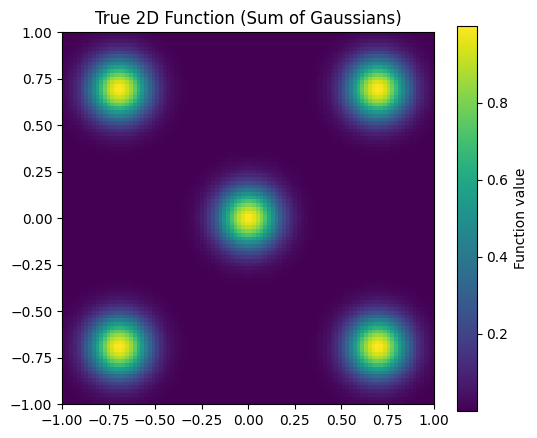


=== Training Candidate A ===
checkpoint directory created: ./model
saving model version 0.0

--- Phase 1: Training on Empty Areas Only ---


| train_loss: 2.27e-07 | test_loss: 2.27e-07 | reg: 1.05e+00 | : 100%|█| 50/50 [00:20<00:00,  2.42it


saving model version 0.1
Overall Forgetting after Phase 1 for Candidate A: 0.0000

--- Phase 2: Training on Peak #1 (With Empty Areas) ---


| train_loss: 1.36e-04 | test_loss: 2.76e-04 | reg: 2.10e+01 | : 100%|█| 50/50 [01:02<00:00,  1.24s/


saving model version 0.2
Overall Forgetting after Phase 2 for Candidate A: 0.0000

--- Phase 3: Training on Peak #2 (With Empty Areas) ---


| train_loss: 1.53e-04 | test_loss: 3.01e-04 | reg: 2.34e+01 | : 100%|█| 50/50 [01:01<00:00,  1.22s/


saving model version 0.3
Overall Forgetting after Phase 3 for Candidate A: 0.0090

--- Phase 4: Training on Peak #3 (With Empty Areas) ---


| train_loss: 1.65e-04 | test_loss: 3.27e-04 | reg: 2.39e+01 | : 100%|█| 50/50 [01:01<00:00,  1.23s/


saving model version 0.4
Overall Forgetting after Phase 4 for Candidate A: 0.0107

--- Phase 5: Training on Peak #4 (With Empty Areas) ---


| train_loss: 1.69e-04 | test_loss: 3.30e-04 | reg: 2.35e+01 | : 100%|█| 50/50 [01:01<00:00,  1.23s/


saving model version 0.5
Overall Forgetting after Phase 5 for Candidate A: 0.0087

--- Phase 6: Training on Peak #5 (With Empty Areas) ---


| train_loss: 9.90e-05 | test_loss: 1.81e-04 | reg: 2.31e+01 | : 100%|█| 50/50 [01:01<00:00,  1.22s/


saving model version 0.6
Overall Forgetting after Phase 6 for Candidate A: 0.0143


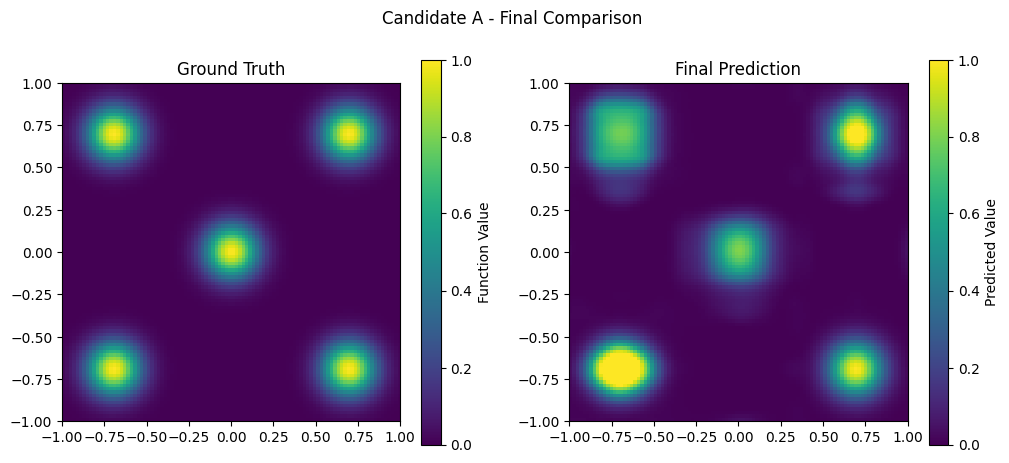

Candidate A Final MSE: 0.0048

=== Training Candidate B ===
checkpoint directory created: ./model
saving model version 0.0

--- Phase 1: Training on Empty Areas Only ---


| train_loss: 1.71e-07 | test_loss: 1.71e-07 | reg: 1.39e+00 | : 100%|█| 50/50 [00:30<00:00,  1.65it


saving model version 0.1
Overall Forgetting after Phase 1 for Candidate B: 0.0000

--- Phase 2: Training on Peak #1 (With Empty Areas) ---


| train_loss: 1.06e-04 | test_loss: 2.26e-04 | reg: 2.44e+01 | : 100%|█| 50/50 [01:16<00:00,  1.53s/


saving model version 0.2
Overall Forgetting after Phase 2 for Candidate B: 0.0000

--- Phase 3: Training on Peak #2 (With Empty Areas) ---


| train_loss: 1.42e-04 | test_loss: 3.06e-04 | reg: 2.59e+01 | : 100%|█| 50/50 [01:16<00:00,  1.53s/


saving model version 0.3
Overall Forgetting after Phase 3 for Candidate B: 0.0765

--- Phase 4: Training on Peak #3 (With Empty Areas) ---


| train_loss: 1.68e-04 | test_loss: 3.54e-04 | reg: 2.58e+01 | : 100%|█| 50/50 [01:17<00:00,  1.56s/


saving model version 0.4
Overall Forgetting after Phase 4 for Candidate B: 0.0222

--- Phase 5: Training on Peak #4 (With Empty Areas) ---


| train_loss: 1.15e-04 | test_loss: 2.31e-04 | reg: 2.74e+01 | : 100%|█| 50/50 [01:17<00:00,  1.55s/


saving model version 0.5
Overall Forgetting after Phase 5 for Candidate B: 0.0167

--- Phase 6: Training on Peak #5 (With Empty Areas) ---


| train_loss: 9.74e-05 | test_loss: 1.98e-04 | reg: 2.69e+01 | : 100%|█| 50/50 [01:16<00:00,  1.53s/


saving model version 0.6
Overall Forgetting after Phase 6 for Candidate B: 0.0281


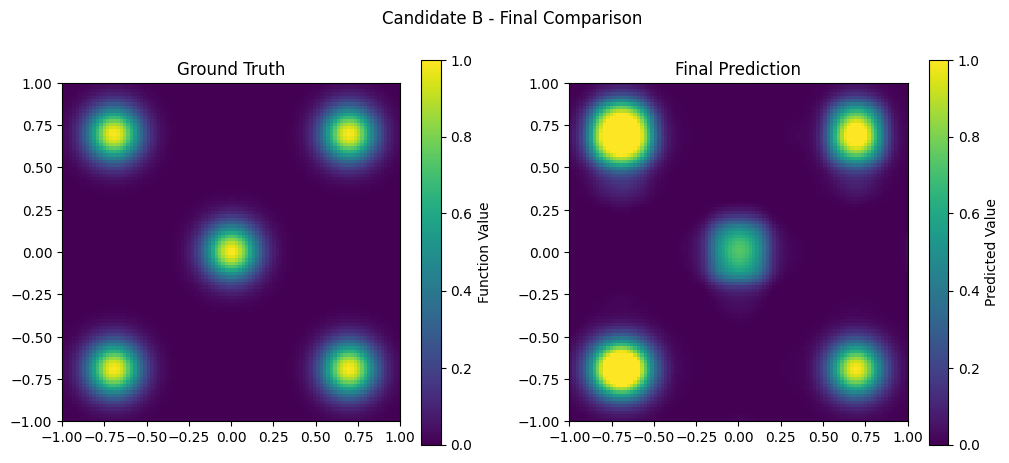

Candidate B Final MSE: 0.0089

=== Training Candidate C ===
checkpoint directory created: ./model
saving model version 0.0

--- Phase 1: Training on Empty Areas Only ---


| train_loss: 1.64e-08 | test_loss: 1.64e-08 | reg: 9.12e-01 | : 100%|█| 50/50 [00:40<00:00,  1.22it


saving model version 0.1
Overall Forgetting after Phase 1 for Candidate C: 0.0000

--- Phase 2: Training on Peak #1 (With Empty Areas) ---


| train_loss: 1.07e-04 | test_loss: 2.22e-04 | reg: 1.79e+01 | : 100%|█| 50/50 [01:17<00:00,  1.54s/


saving model version 0.2
Overall Forgetting after Phase 2 for Candidate C: 0.0000

--- Phase 3: Training on Peak #2 (With Empty Areas) ---


| train_loss: 1.32e-04 | test_loss: 2.83e-04 | reg: 1.84e+01 | : 100%|█| 50/50 [01:18<00:00,  1.57s/


saving model version 0.3
Overall Forgetting after Phase 3 for Candidate C: 0.0423

--- Phase 4: Training on Peak #3 (With Empty Areas) ---


| train_loss: 1.02e-04 | test_loss: 2.07e-04 | reg: 1.91e+01 | : 100%|█| 50/50 [01:16<00:00,  1.54s/


saving model version 0.4
Overall Forgetting after Phase 4 for Candidate C: 0.0173

--- Phase 5: Training on Peak #4 (With Empty Areas) ---


| train_loss: 9.81e-05 | test_loss: 2.08e-04 | reg: 1.95e+01 | : 100%|█| 50/50 [01:18<00:00,  1.56s/


saving model version 0.5
Overall Forgetting after Phase 5 for Candidate C: 0.0144

--- Phase 6: Training on Peak #5 (With Empty Areas) ---


| train_loss: 8.61e-05 | test_loss: 1.81e-04 | reg: 1.93e+01 | : 100%|█| 50/50 [01:18<00:00,  1.56s/


saving model version 0.6
Overall Forgetting after Phase 6 for Candidate C: 0.0098


Candidate C Final MSE: 0.0033

=== Hyperparameter Tuning Summary ===
Candidate A: Final MSE = 0.0048, Overall Forgetting = 0.0143, Parameters = {'name': 'Candidate A', 'width': [[2, 0], [18, 0], [9, 0], [1, 0]], 'grid': 20, 'k': 2, 'noise_scale': 0.1}
Candidate B: Final MSE = 0.0089, Overall Forgetting = 0.0281, Parameters = {'name': 'Candidate B', 'width': [[2, 0], [24, 0], [12, 0], [1, 0]], 'grid': 20, 'k': 2, 'noise_scale': 0.1}
Candidate C: Final MSE = 0.0033, Overall Forgetting = 0.0098, Parameters = {'name': 'Candidate C', 'width': [[2, 0], [18, 0], [9, 0], [1, 0]], 'grid': 30, 'k': 2, 'noise_scale': 0.1}

Best Candidate:
{'candidate': 'Candidate C', 'params': {'name': 'Candidate C', 'width': [[2, 0], [18, 0], [9, 0], [1, 0]], 'grid': 30, 'k': 2, 'noise_scale': 0.1}, 'overall_forgetting': 0.009754070561412876, 'history': {'task_losses': [[2.699229305103438e-16], [2.0058572580694545e-09, 4.913330542422045e-08], [1.6783130440956029e-09, 0.08463173359632492, 7.996204942628538e-08], 

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN  
peak_regions = {
    "a11": [-0.7,  0.7],  # Top-left
    "a13": [ 0.7,  0.7],  # Top-right
    "a22": [ 0.0,  0.0],  # Center
    "a31": [-0.7, -0.7],  # Bottom-left
    "a33": [ 0.7, -0.7]   # Bottom-right
}

# Define empty regions (to be learned as 0 first)
empty_regions = {
    "a21": [-0.7,  0.0],  # Middle-left
    "a12": [ 0.0,  0.7],  # Top-middle
    "a23": [ 0.7,  0.0],  # Middle-right
    "a32": [ 0.0, -0.7]   # Bottom-middle
}


grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')
xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)


sigma = 40.0  # Controls the sharpness
f_grid = torch.zeros(xy_grid.shape[0])
for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma * dist_sq)
f_grid_2d = f_grid.view(grid_size, grid_size)

# Visualize ground truth
plt.figure(figsize=(6, 5))
plt.title("True 2D Function (Sum of Gaussians)")
plt.imshow(f_grid_2d.numpy(), origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar(label='Function value')
plt.show()



n_samples_per_region = 500 
radius = 0.25                
noise_std = 0.02        

all_datasets = []


empty_x, empty_y = [], []
for center in empty_regions.values():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    empty_x.append(xs)
    empty_y.append(ys)
empty_x = torch.cat(empty_x)
empty_y = torch.cat(empty_y)
empty_xy = torch.stack([empty_x, empty_y], dim=-1)
y_empty = torch.zeros(empty_xy.shape[0])
dataset_empty = {
    'train_input': empty_xy,
    'train_label': y_empty.unsqueeze(-1),
    'test_input': empty_xy,
    'test_label': y_empty.unsqueeze(-1)
}
all_datasets.append(dataset_empty)


for peak_name, center in peak_regions.items():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    xs += torch.randn_like(xs) * noise_std  # add noise
    ys += torch.randn_like(ys) * noise_std
    xy_samples = torch.stack([xs, ys], dim=-1)
    # Compute function values for the peak using a 2D Gaussian function.
    dist_sq = (xy_samples[:, 0] - center[0])**2 + (xy_samples[:, 1] - center[1])**2
    y_samples = torch.exp(-sigma * dist_sq)
    dataset = {
        'train_input': torch.cat([empty_xy, xy_samples], dim=0),
        'train_label': torch.cat([y_empty.unsqueeze(-1), y_samples.unsqueeze(-1)], dim=0),
        'test_input': xy_samples,
        'test_label': y_samples.unsqueeze(-1)
    }
    all_datasets.append(dataset)



def compute_average_forgetting(history):

    final_phase = len(history['task_losses']) - 1
    forgetting_values = []
    for task_idx in range(final_phase):
        best_loss = min(history['task_losses'][phase][task_idx] for phase in range(task_idx, final_phase + 1))
        final_loss = history['task_losses'][final_phase][task_idx]
        forgetting_values.append(final_loss - best_loss)
    return sum(forgetting_values) / len(forgetting_values) if forgetting_values else 0.0

def plot_forgetting(history, title):

    n_tasks = len(history['task_losses'])
    plt.figure(figsize=(7, 5))
    for task_idx in range(n_tasks):
        phases = []
        losses = []
        for phase, phase_losses in enumerate(history['task_losses']):
            if len(phase_losses) > task_idx:
                phases.append(phase + 1)
                losses.append(phase_losses[task_idx])
        plt.plot(phases, losses, marker='o', label=f"Task {task_idx+1}")
    plt.xlabel("Training Phase")
    plt.ylabel("MSE Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_final_comparison(model, title="Final Prediction vs. Ground Truth"):

    model.eval()
    with torch.no_grad():
        final_pred = model(xy_grid.to(model.device if hasattr(model, "device") else "cpu")).view(grid_size, grid_size)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title("Ground Truth")
    im0 = axes[0].imshow(f_grid_2d.numpy(), origin='lower', extent=(-1,1,-1,1),
                           cmap='viridis', vmin=0, vmax=1)
    fig.colorbar(im0, ax=axes[0], label='Function Value')
    axes[1].set_title("Final Prediction")
    im1 = axes[1].imshow(final_pred.cpu().numpy(), origin='lower', extent=(-1,1,-1,1),
                           cmap='viridis', vmin=0, vmax=1)
    fig.colorbar(im1, ax=axes[1], label='Predicted Value')
    plt.suptitle(title)
    plt.show()
    mse = nn.functional.mse_loss(final_pred, f_grid_2d.to(final_pred.device)).item()
    return mse


candidates = [
    {"name": "Candidate A", "width": [2, 18, 9, 1], "grid": 20, "k": 2, "noise_scale": 0.1},
    {"name": "Candidate B", "width": [2, 24, 12, 1], "grid": 20, "k": 2, "noise_scale": 0.1},
    {"name": "Candidate C", "width": [2, 18, 9, 1], "grid": 30, "k": 2, "noise_scale": 0.1}
]

results = []

for cand in candidates:
    print(f"\n=== Training {cand['name']} ===")

    model = KAN(
        width=cand["width"],
        grid=cand["grid"],
        k=cand["k"],
        noise_scale=cand["noise_scale"],
        sp_trainable=False,
        sb_trainable=False,
        base_fun='zero'
    )
    

    history = {'task_losses': []}
    

    for phase_idx, dataset in enumerate(all_datasets):
        if phase_idx == 0:
            print("\n--- Phase 1: Training on Empty Areas Only ---")
        else:
            print(f"\n--- Phase {phase_idx+1}: Training on Peak #{phase_idx} (With Empty Areas) ---")
        # Train on current dataset. (Here, steps=50 and update_grid=False as in your original code.)
        model.fit(dataset, opt='LBFGS', steps=50, update_grid=False)
        

        phase_losses = []
        for past_phase in range(phase_idx + 1):
            test_input = all_datasets[past_phase]['test_input']
            test_label = all_datasets[past_phase]['test_label']
            with torch.no_grad():
                y_pred = model(test_input)
                mse_loss = torch.nn.functional.mse_loss(y_pred, test_label).item()
            phase_losses.append(mse_loss)
        history['task_losses'].append(phase_losses)

        # Print overall forgetting metric for current phase.
        avg_forget = compute_average_forgetting(history)
        print(f"Overall Forgetting after Phase {phase_idx+1} for {cand['name']}: {avg_forget:.4f}")
    
    # At the end, compute final overall forgetting (if desired) and plot final prediction.
    overall_forgetting = compute_average_forgetting(history)
    results.append({
        "candidate": cand["name"],
        "params": cand,
        "overall_forgetting": overall_forgetting,
        "history": history
    })

    final_mse = plot_final_comparison(model, title=f"{cand['name']} - Final Comparison")
    results[-1]["final_mse"] = final_mse
    print(f"{cand['name']} Final MSE: {final_mse:.4f}")


print("\n=== Hyperparameter Tuning Summary ===")
for res in results:
    print(f"{res['candidate']}: Final MSE = {res['final_mse']:.4f}, Overall Forgetting = {res['overall_forgetting']:.4f}, Parameters = {res['params']}")

best = min(results, key=lambda x: x["final_mse"])
print("\nBest Candidate:")
print(best)


Using device: cuda

Running with λ=0.1, epochs=500, width=50, depth=4
Trainable parameters: 7851


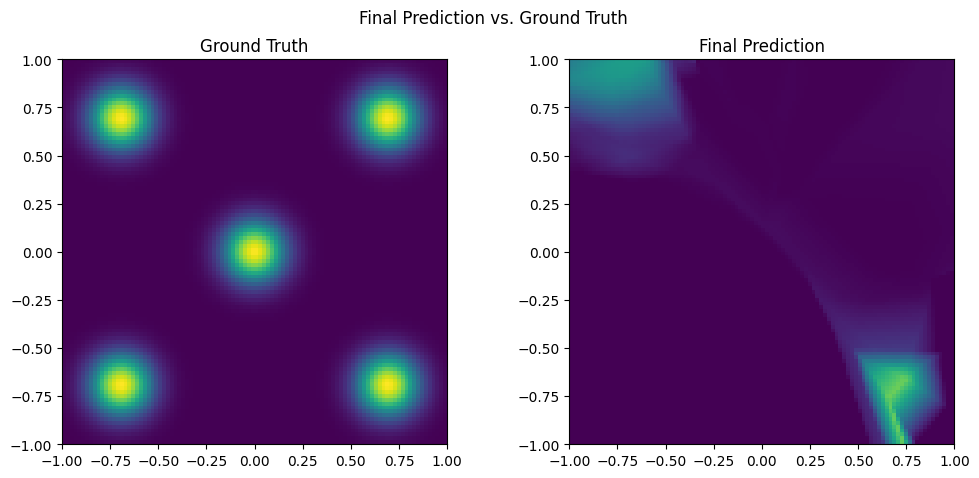

Final MSE: 0.0376, Overall Forgetting: 0.0145

Running with λ=0.1, epochs=500, width=50, depth=6
Trainable parameters: 12951


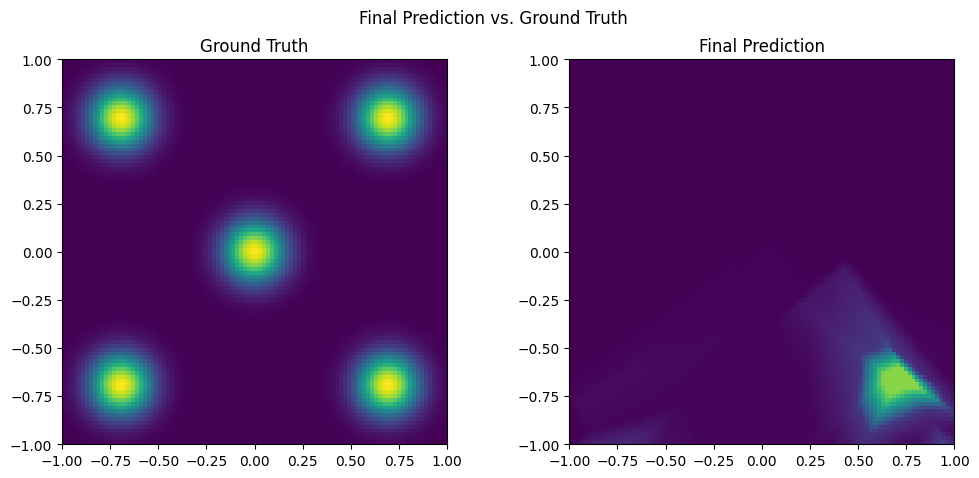

Final MSE: 0.0386, Overall Forgetting: 0.0089

Running with λ=0.1, epochs=500, width=100, depth=4
Trainable parameters: 30701


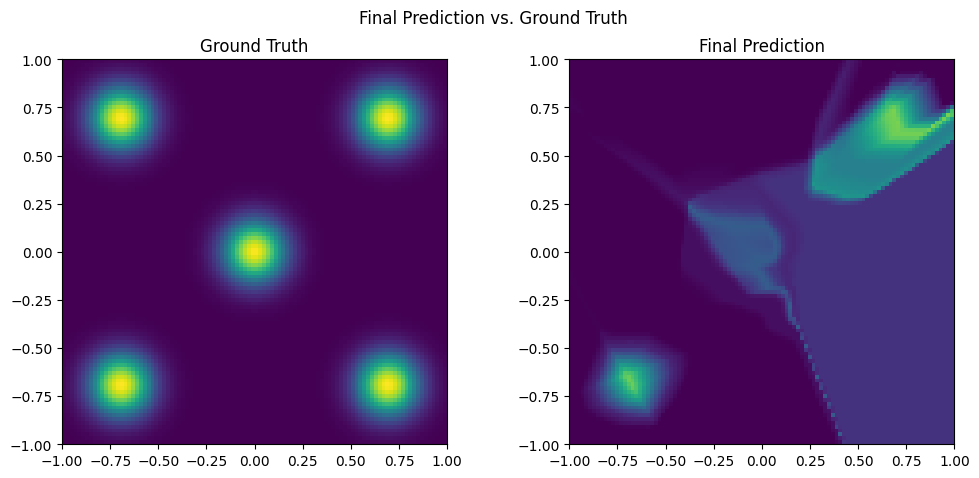

Final MSE: 0.0332, Overall Forgetting: 0.0911

Running with λ=0.1, epochs=500, width=100, depth=6
Trainable parameters: 50901


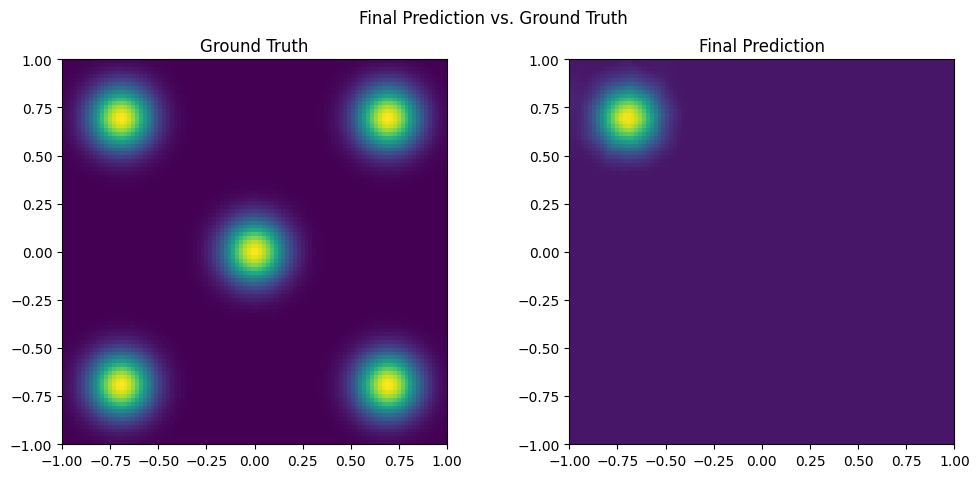

Final MSE: 0.0327, Overall Forgetting: 0.1247

Running with λ=0.1, epochs=1000, width=50, depth=4
Trainable parameters: 7851


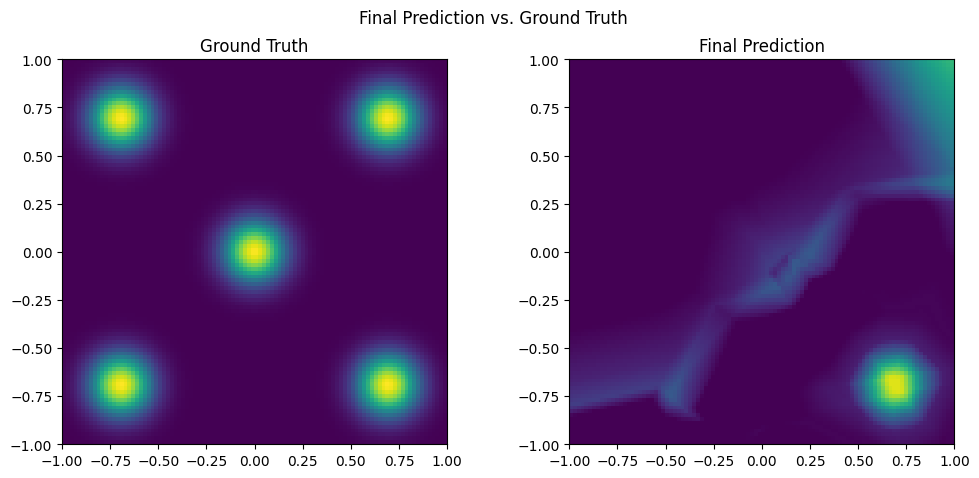

Final MSE: 0.0355, Overall Forgetting: 0.0003

Running with λ=0.1, epochs=1000, width=50, depth=6
Trainable parameters: 12951


Final MSE: 0.0329, Overall Forgetting: 0.1247

Running with λ=0.1, epochs=1000, width=100, depth=4
Trainable parameters: 30701


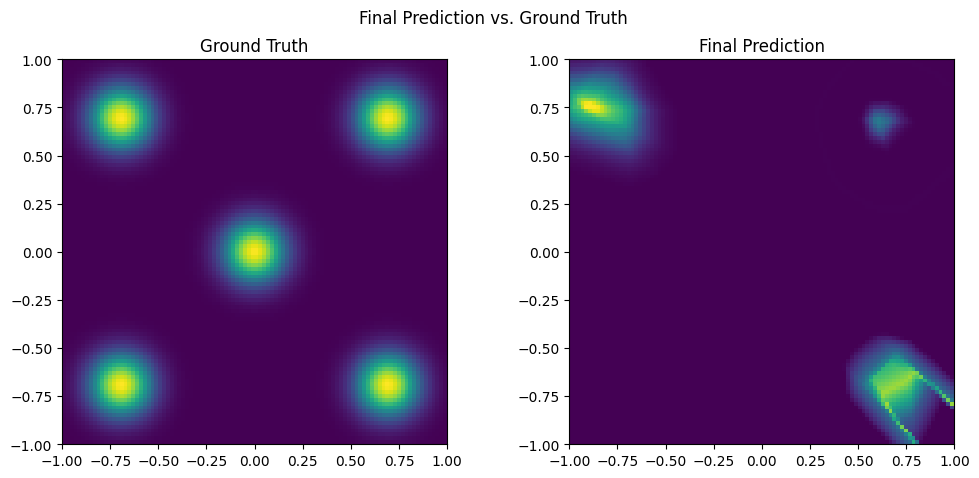

Final MSE: 0.0337, Overall Forgetting: 0.0073

Running with λ=0.1, epochs=1000, width=100, depth=6
Trainable parameters: 50901


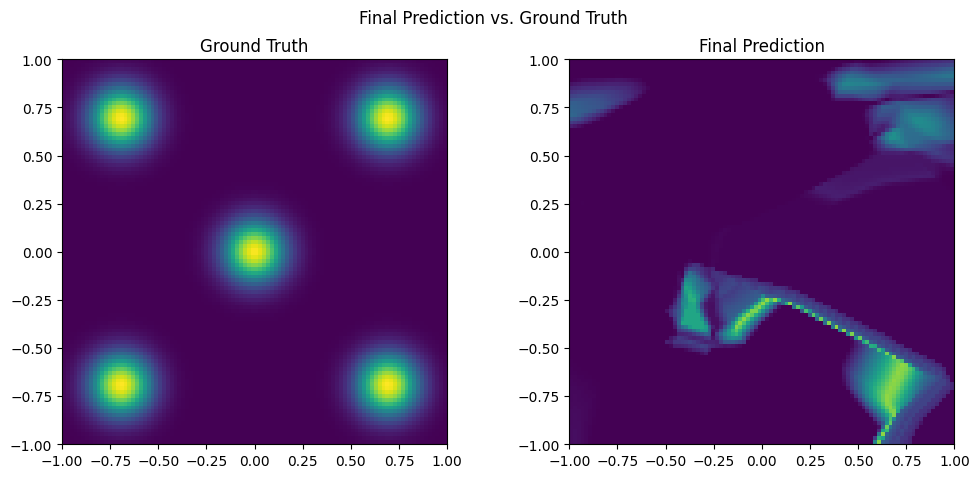

Final MSE: 0.0411, Overall Forgetting: 0.0127

Running with λ=0.5, epochs=500, width=50, depth=4
Trainable parameters: 7851


Final MSE: 0.0327, Overall Forgetting: 0.1247

Running with λ=0.5, epochs=500, width=50, depth=6
Trainable parameters: 12951


Final MSE: 0.0581, Overall Forgetting: 0.0013

Running with λ=0.5, epochs=500, width=100, depth=4
Trainable parameters: 30701


Final MSE: 0.0313, Overall Forgetting: 0.1247

Running with λ=0.5, epochs=500, width=100, depth=6
Trainable parameters: 50901


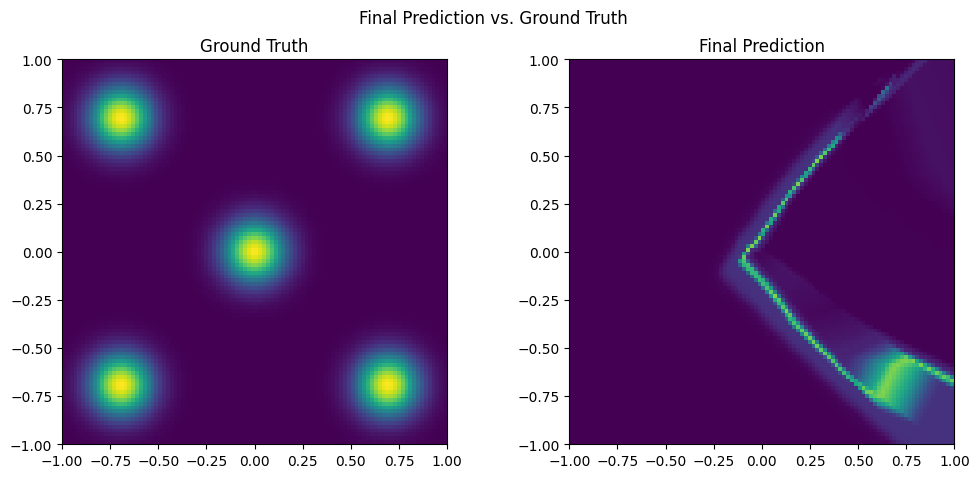

Final MSE: 0.0396, Overall Forgetting: 0.0146

Running with λ=0.5, epochs=1000, width=50, depth=4
Trainable parameters: 7851


Final MSE: 0.0587, Overall Forgetting: 0.0016

Running with λ=0.5, epochs=1000, width=50, depth=6
Trainable parameters: 12951


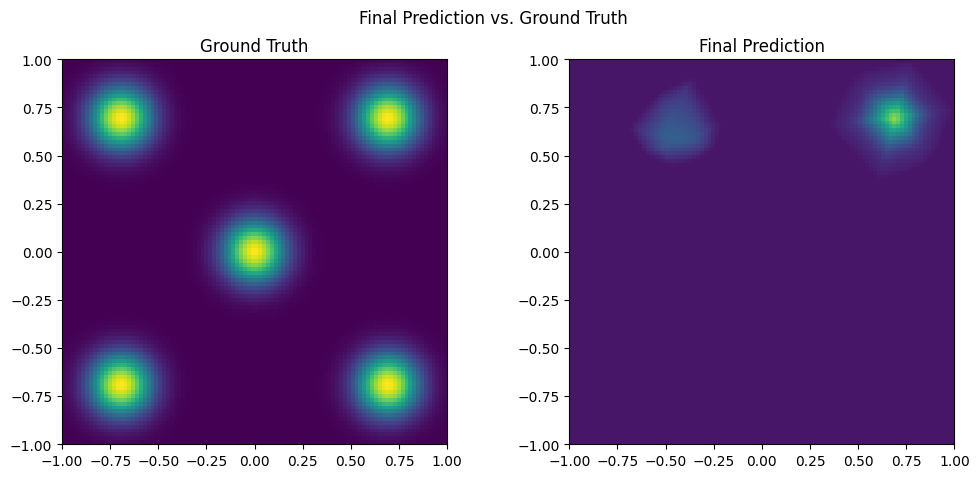

Final MSE: 0.0339, Overall Forgetting: 0.1247

Running with λ=0.5, epochs=1000, width=100, depth=4
Trainable parameters: 30701


Final MSE: 0.0365, Overall Forgetting: 0.0005

Running with λ=0.5, epochs=1000, width=100, depth=6
Trainable parameters: 50901


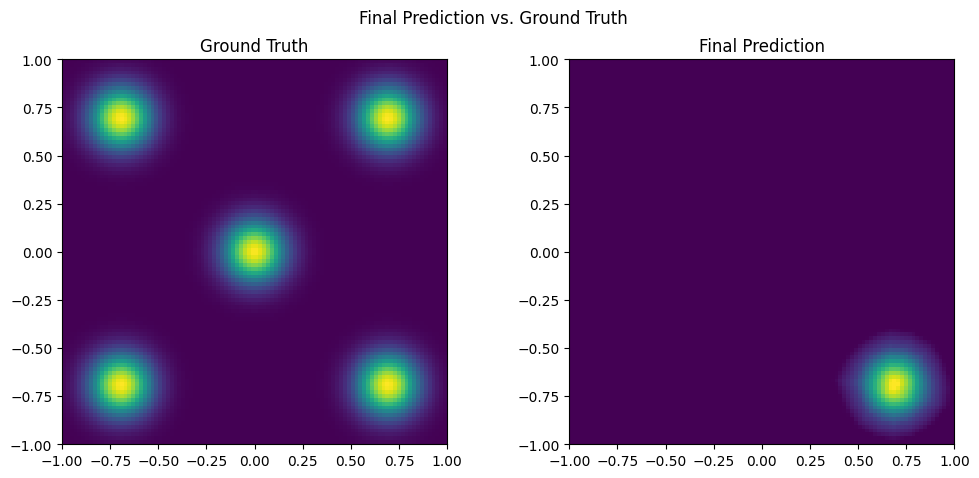

Final MSE: 0.0384, Overall Forgetting: 0.0001

Running with λ=0.9, epochs=500, width=50, depth=4
Trainable parameters: 7851


Final MSE: 0.0330, Overall Forgetting: 0.1247

Running with λ=0.9, epochs=500, width=50, depth=6
Trainable parameters: 12951


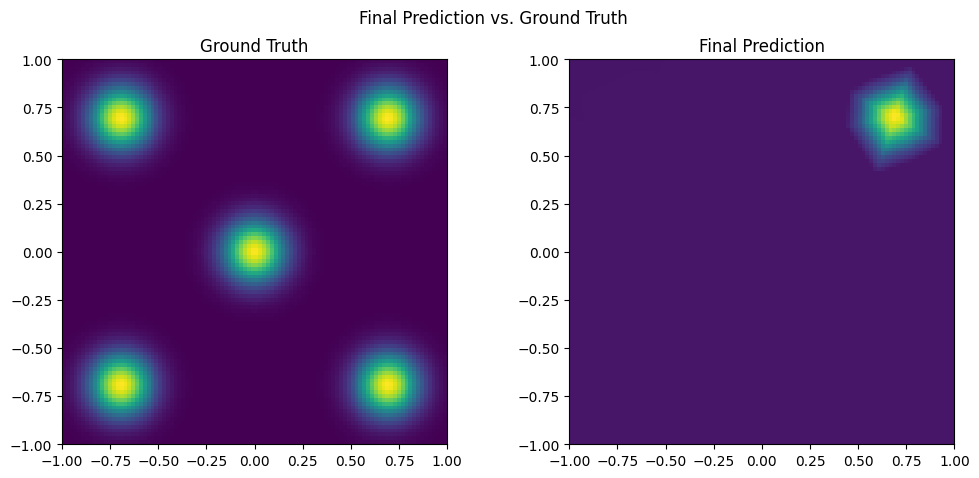

Final MSE: 0.0327, Overall Forgetting: 0.1247

Running with λ=0.9, epochs=500, width=100, depth=4
Trainable parameters: 30701


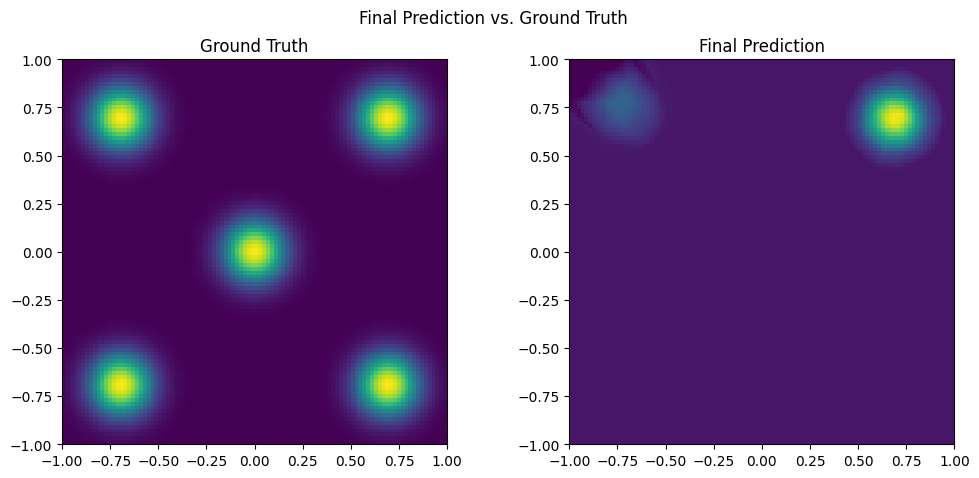

Final MSE: 0.0295, Overall Forgetting: 0.1247

Running with λ=0.9, epochs=500, width=100, depth=6
Trainable parameters: 50901


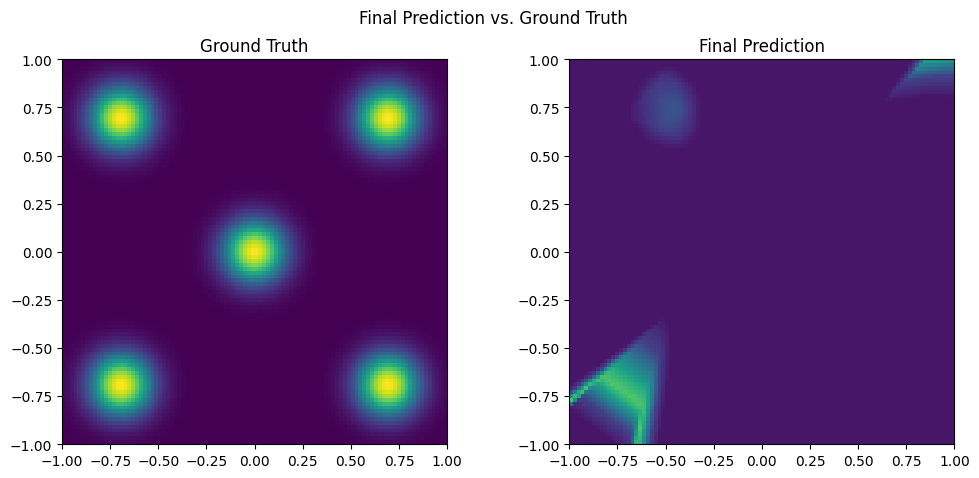

Final MSE: 0.0347, Overall Forgetting: 0.1247

Running with λ=0.9, epochs=1000, width=50, depth=4
Trainable parameters: 7851


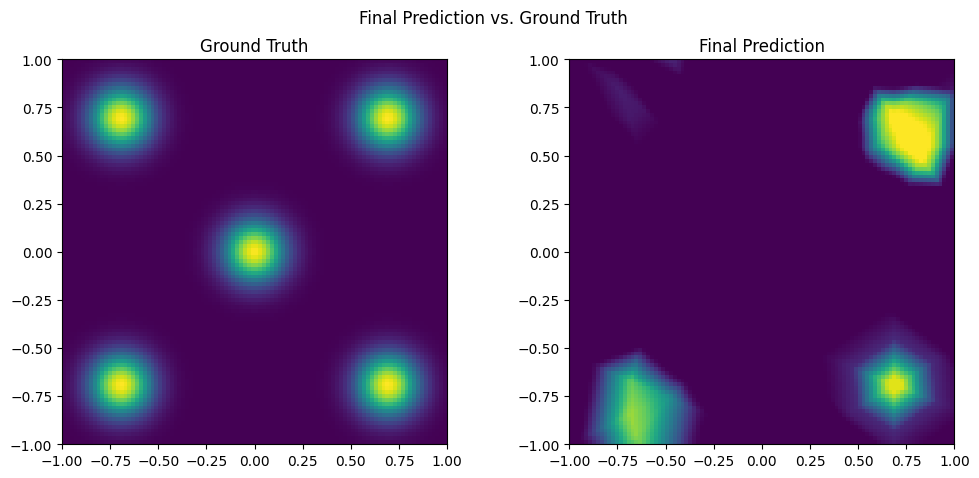

Final MSE: 0.0368, Overall Forgetting: 0.0010

Running with λ=0.9, epochs=1000, width=50, depth=6
Trainable parameters: 12951


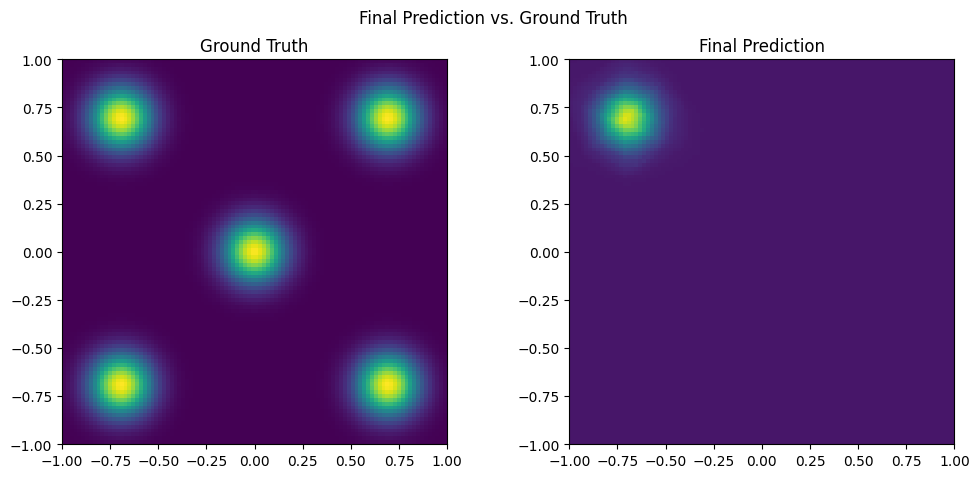

Final MSE: 0.0328, Overall Forgetting: 0.1247

Running with λ=0.9, epochs=1000, width=100, depth=4
Trainable parameters: 30701


Final MSE: 0.0327, Overall Forgetting: 0.1247

Running with λ=0.9, epochs=1000, width=100, depth=6
Trainable parameters: 50901


Final MSE: 0.0385, Overall Forgetting: 0.0013


In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm  # Optional, for progress bars

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def count_parameters(model):
    """Return the number of trainable parameters in the model."""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def compute_average_forgetting(history):

    if not history['task_losses']:
        return 0.0  # No tasks, no forgetting.

    final_phase = len(history['task_losses']) - 1
    forgetting_values = []

    for task_idx in range(len(history['task_losses'][0])):  # Loop over all tasks
        try:
            best_loss = min(history['task_losses'][phase][task_idx] for phase in range(len(history['task_losses'])))
            final_loss = history['task_losses'][final_phase][task_idx]
            forgetting_values.append(max(0, final_loss - best_loss))
        except IndexError:
            print(f"Warning: Task {task_idx} missing in some training phases.")

    return sum(forgetting_values) / len(forgetting_values) if forgetting_values else 0.0


def generate_gaussian_bump(center, sigma, n_samples=500):
    
    x_center, y_center = center
    x = np.random.normal(x_center, sigma, size=(n_samples, 1))
    y = np.random.normal(y_center, sigma, size=(n_samples, 1))
    z = np.exp(-(((x - x_center)**2 + (y - y_center)**2) / (2 * sigma**2)))
    X = np.hstack([x, y])
    y_val = z
    return torch.from_numpy(X).float(), torch.from_numpy(y_val).float()


class SimpleMLP(nn.Module):

    def __init__(self, input_dim=2, hidden_dim=32, output_dim=1, depth=2):
        super(SimpleMLP, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)


def train_sequential_ewc(model, tasks_data, n_epochs=100, lr=0.01, lambda_ewc=0.4):

    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    history = {'task_losses': []}
    ewc_data = []  

    for task_idx, dataset in enumerate(tasks_data):
        X, y = dataset['train_input'].to(device), dataset['train_label'].to(device)
        model.train()
        for epoch in range(n_epochs):
            optimizer.zero_grad()
            output = model(X)
            loss = loss_fn(output, y)
            if task_idx > 0:
                for prev in ewc_data:
                    for name, param in model.named_parameters():
                        loss += lambda_ewc * (prev['fisher'][name] * (param - prev['params'][name]).pow(2)).sum()
            loss.backward()
            optimizer.step()

        # Evaluate
        model.eval()
        with torch.no_grad():
            X_eval = dataset['test_input'].to(device)
            y_eval = dataset['test_label'].to(device)
            eval_loss = loss_fn(model(X_eval), y_eval).item()
        history['task_losses'].append([eval_loss])  

        # Store Fisher Information
        fisher = {n: torch.zeros_like(p) for n, p in model.named_parameters() if p.requires_grad}
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = loss_fn(output, y)
        loss.backward()
        for name, param in model.named_parameters():
            if param.requires_grad:
                fisher[name] += param.grad.detach().clone() ** 2
        params = {name: param.detach().clone() for name, param in model.named_parameters() if param.requires_grad}
        ewc_data.append({'fisher': fisher, 'params': params})
    
    return history


grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')
xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)
sigma_true = 40.0
peak_regions = {
    "a11": [-0.7,  0.7], "a13": [ 0.7,  0.7], "a22": [ 0.0,  0.0],
    "a31": [-0.7, -0.7], "a33": [ 0.7, -0.7]
}
f_grid = torch.zeros(xy_grid.shape[0])
for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma_true * dist_sq)
f_grid_2d = f_grid.view(grid_size, grid_size)


def plot_final_comparison(model, title="Final Prediction vs. Ground Truth"):

    model.eval()
    with torch.no_grad():
        final_pred = model(xy_grid.to(device)).view(grid_size, grid_size)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title("Ground Truth")
    axes[0].imshow(f_grid_2d.numpy(), origin='lower', extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)
    axes[1].set_title("Final Prediction")
    axes[1].imshow(final_pred.cpu().numpy(), origin='lower', extent=(-1,1,-1,1), cmap='viridis', vmin=0, vmax=1)
    plt.suptitle(title)
    plt.show()
    return nn.functional.mse_loss(final_pred, f_grid_2d.to(final_pred.device)).item()


def main_hyperparameter_tuning():
    lambda_values = [0.1, 0.5, 0.9]
    epochs_values = [500, 1000]
    hidden_dims = [50, 100]
    depths = [4, 6]

    results = []
    for lambda_ewc in lambda_values:
        for n_epochs in epochs_values:
            for hidden_dim in hidden_dims:
                for depth in depths:
                    print(f"\nRunning with λ={lambda_ewc}, epochs={n_epochs}, width={hidden_dim}, depth={depth}")
                    model = SimpleMLP(input_dim=2, hidden_dim=hidden_dim, output_dim=1, depth=depth)
                    print("Trainable parameters:", count_parameters(model))
                    history = train_sequential_ewc(model, all_datasets, n_epochs=n_epochs, lr=0.01, lambda_ewc=lambda_ewc)
                    final_mse = plot_final_comparison(model)
                    results.append({
                        "final_mse": final_mse,
                        "overall_forgetting": compute_average_forgetting(history),
                    })
                    print(f"Final MSE: {final_mse:.4f}, Overall Forgetting: {compute_average_forgetting(history):.4f}")

if __name__ == "__main__":
    main_hyperparameter_tuning()


In [5]:
import torch
from kan import KAN  # Ensure the KAN library is installed and accessible

# Define candidate architectures (same as before)
candidates = [
    {"name": "Candidate A", "width": [2, 18, 9, 1], "grid": 20, "k": 2, "noise_scale": 0.1},
    {"name": "Candidate B", "width": [2, 24, 12, 1], "grid": 20, "k": 2, "noise_scale": 0.1},
    {"name": "Candidate C", "width": [2, 18, 9, 1], "grid": 30, "k": 2, "noise_scale": 0.1}
]

# Function to count trainable parameters
def count_parameters(model):
    """Return the number of trainable parameters in the model."""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Iterate over each candidate and print the number of parameters
for cand in candidates:
    model = KAN(
        width=cand["width"],
        grid=cand["grid"],
        k=cand["k"],
        noise_scale=cand["noise_scale"],
        sp_trainable=False,
        sb_trainable=False,
        base_fun='zero'
    )
    num_params = count_parameters(model)
    print(f"Model {cand['name']} - Number of Parameters: {num_params}")


checkpoint directory created: ./model
saving model version 0.0
Model Candidate A - Number of Parameters: 5382
checkpoint directory created: ./model
saving model version 0.0
Model Candidate B - Number of Parameters: 9048
checkpoint directory created: ./model
saving model version 0.0
Model Candidate C - Number of Parameters: 7452


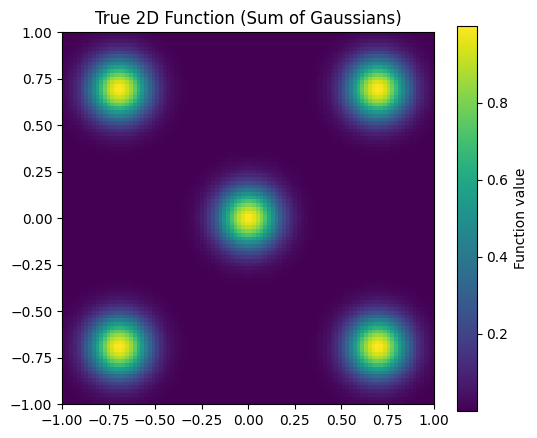


=== Training Candidate A ===
checkpoint directory created: ./model
saving model version 0.0

--- Phase 1: Training on Empty Areas Only ---


| train_loss: 1.75e-07 | test_loss: 1.75e-07 | reg: 1.05e+00 | : 100%|█| 50/50 [00:23<00:00,  2.14it


saving model version 0.1
Overall Forgetting after Phase 1 for Candidate A: 0.0000

--- Phase 2: Training on Peak #1 (With Empty Areas) ---


| train_loss: 1.86e-04 | test_loss: 3.86e-04 | reg: 1.75e+01 | : 100%|█| 50/50 [01:03<00:00,  1.28s/


saving model version 0.2
Overall Forgetting after Phase 2 for Candidate A: 0.0000

--- Phase 3: Training on Peak #2 (With Empty Areas) ---


| train_loss: 1.59e-04 | test_loss: 3.34e-04 | reg: 1.80e+01 | : 100%|█| 50/50 [01:02<00:00,  1.25s/


saving model version 0.3
Overall Forgetting after Phase 3 for Candidate A: 0.0077

--- Phase 4: Training on Peak #3 (With Empty Areas) ---


| train_loss: 1.51e-04 | test_loss: 3.15e-04 | reg: 1.94e+01 | : 100%|█| 50/50 [01:03<00:00,  1.26s/


saving model version 0.4
Overall Forgetting after Phase 4 for Candidate A: 0.0162

--- Phase 5: Training on Peak #4 (With Empty Areas) ---


| train_loss: 2.09e-04 | test_loss: 4.38e-04 | reg: 1.92e+01 | : 100%|█| 50/50 [01:01<00:00,  1.23s/


saving model version 0.5
Overall Forgetting after Phase 5 for Candidate A: 0.0113

--- Phase 6: Training on Peak #5 (With Empty Areas) ---


| train_loss: 1.66e-04 | test_loss: 3.52e-04 | reg: 1.93e+01 | : 100%|█| 50/50 [01:01<00:00,  1.23s/


saving model version 0.6
Overall Forgetting after Phase 6 for Candidate A: 0.0071


Candidate A Final MSE: 0.0022
Candidate A BWT: -0.0071
Candidate A Accuracy Drop: [3.6492847632629832e-09, 0.008529149289373095, 0.006022317036915581, 0.020688579529391404, 0.00012395683964427917]

=== Training Candidate B ===
checkpoint directory created: ./model
saving model version 0.0

--- Phase 1: Training on Empty Areas Only ---


| train_loss: 1.21e-07 | test_loss: 1.21e-07 | reg: 1.39e+00 | : 100%|█| 50/50 [00:31<00:00,  1.58it


saving model version 0.1
Overall Forgetting after Phase 1 for Candidate B: 0.0000

--- Phase 2: Training on Peak #1 (With Empty Areas) ---


| train_loss: 1.66e-04 | test_loss: 3.57e-04 | reg: 2.47e+01 | : 100%|█| 50/50 [01:18<00:00,  1.56s/


saving model version 0.2
Overall Forgetting after Phase 2 for Candidate B: 0.0000

--- Phase 3: Training on Peak #2 (With Empty Areas) ---


| train_loss: 1.43e-04 | test_loss: 3.04e-04 | reg: 2.41e+01 | : 100%|█| 50/50 [01:19<00:00,  1.58s/


saving model version 0.3
Overall Forgetting after Phase 3 for Candidate B: 0.0117

--- Phase 4: Training on Peak #3 (With Empty Areas) ---


| train_loss: 1.54e-04 | test_loss: 3.18e-04 | reg: 2.41e+01 | : 100%|█| 50/50 [01:18<00:00,  1.58s/


saving model version 0.4
Overall Forgetting after Phase 4 for Candidate B: 0.0123

--- Phase 5: Training on Peak #4 (With Empty Areas) ---


| train_loss: 1.45e-04 | test_loss: 3.05e-04 | reg: 2.43e+01 | : 100%|█| 50/50 [01:19<00:00,  1.59s/


saving model version 0.5
Overall Forgetting after Phase 5 for Candidate B: 0.0077

--- Phase 6: Training on Peak #5 (With Empty Areas) ---


| train_loss: 1.22e-04 | test_loss: 2.56e-04 | reg: 2.42e+01 | : 100%|█| 50/50 [01:19<00:00,  1.60s/


saving model version 0.6
Overall Forgetting after Phase 6 for Candidate B: 0.0135


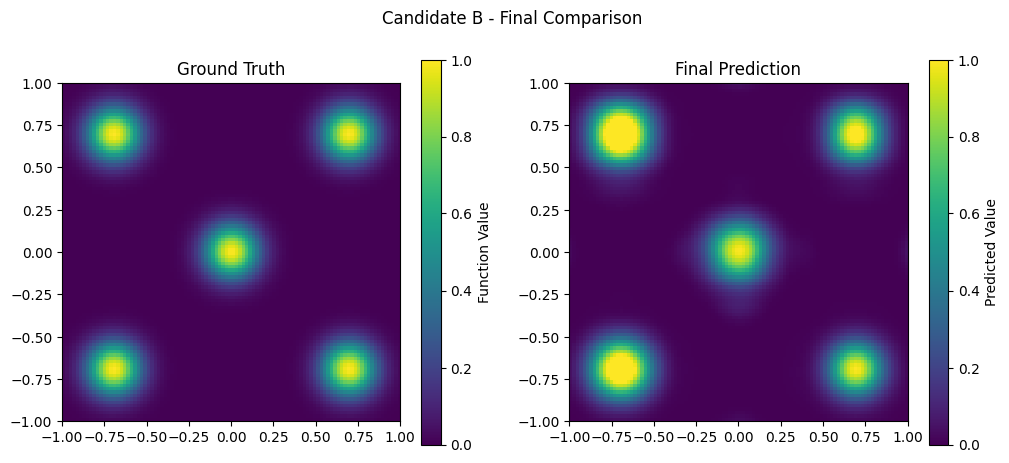

Candidate B Final MSE: 0.0043
Candidate B BWT: -0.0135
Candidate B Accuracy Drop: [2.269113008601664e-09, 0.04034772803599651, 0.002005862212449472, 0.0031489971776466064, 0.021782198924221063]

=== Training Candidate C ===
checkpoint directory created: ./model
saving model version 0.0

--- Phase 1: Training on Empty Areas Only ---


| train_loss: 1.44e-08 | test_loss: 1.44e-08 | reg: 9.17e-01 | : 100%|█| 50/50 [00:37<00:00,  1.33it


saving model version 0.1
Overall Forgetting after Phase 1 for Candidate C: 0.0000

--- Phase 2: Training on Peak #1 (With Empty Areas) ---


| train_loss: 1.22e-04 | test_loss: 2.61e-04 | reg: 1.81e+01 | : 100%|█| 50/50 [01:19<00:00,  1.59s/


saving model version 0.2
Overall Forgetting after Phase 2 for Candidate C: 0.0000

--- Phase 3: Training on Peak #2 (With Empty Areas) ---


| train_loss: 1.44e-04 | test_loss: 3.06e-04 | reg: 1.83e+01 | : 100%|█| 50/50 [01:19<00:00,  1.59s/


saving model version 0.3
Overall Forgetting after Phase 3 for Candidate C: 0.0193

--- Phase 4: Training on Peak #3 (With Empty Areas) ---


| train_loss: 9.82e-05 | test_loss: 1.90e-04 | reg: 1.89e+01 | : 100%|█| 50/50 [01:18<00:00,  1.57s/


saving model version 0.4
Overall Forgetting after Phase 4 for Candidate C: 0.0530

--- Phase 5: Training on Peak #4 (With Empty Areas) ---


| train_loss: 9.95e-05 | test_loss: 2.02e-04 | reg: 1.95e+01 | : 100%|█| 50/50 [01:21<00:00,  1.62s/


saving model version 0.5
Overall Forgetting after Phase 5 for Candidate C: 0.0217

--- Phase 6: Training on Peak #5 (With Empty Areas) ---


| train_loss: 9.39e-05 | test_loss: 1.98e-04 | reg: 1.96e+01 | : 100%|█| 50/50 [01:21<00:00,  1.63s/


saving model version 0.6
Overall Forgetting after Phase 6 for Candidate C: 0.0072


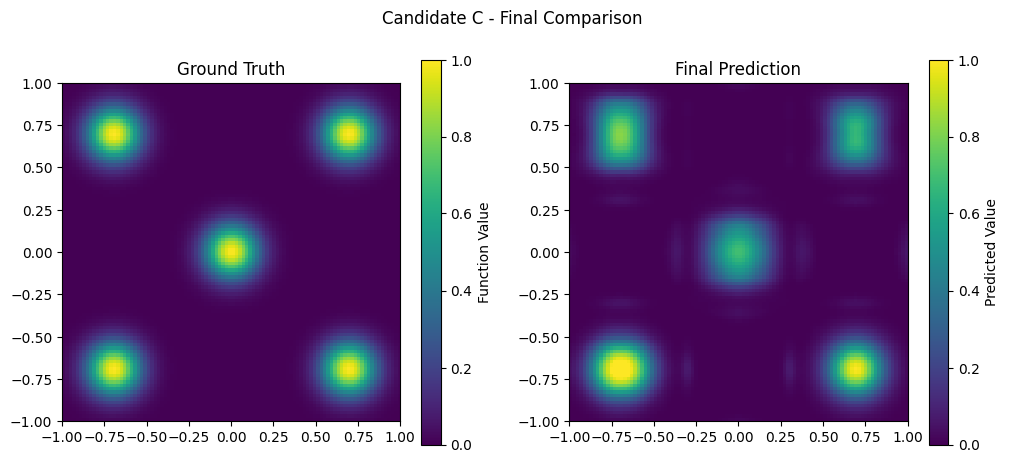

Candidate C Final MSE: 0.0022
Candidate C BWT: -0.0072
Candidate C Accuracy Drop: [1.1710922231955578e-09, 0.006711523931514307, 0.013855558517015254, 0.008360106661616129, 0.007157095509938927]

=== Hyperparameter Tuning Summary ===
Candidate A: Final MSE = 0.0022, Overall Forgetting = 0.0071, BWT = -0.0071, Accuracy Drop = [3.6492847632629832e-09, 0.008529149289373095, 0.006022317036915581, 0.020688579529391404, 0.00012395683964427917], Parameters = {'name': 'Candidate A', 'width': [[2, 0], [18, 0], [9, 0], [1, 0]], 'grid': 20, 'k': 2, 'noise_scale': 0.1}
Candidate B: Final MSE = 0.0043, Overall Forgetting = 0.0135, BWT = -0.0135, Accuracy Drop = [2.269113008601664e-09, 0.04034772803599651, 0.002005862212449472, 0.0031489971776466064, 0.021782198924221063], Parameters = {'name': 'Candidate B', 'width': [[2, 0], [24, 0], [12, 0], [1, 0]], 'grid': 20, 'k': 2, 'noise_scale': 0.1}
Candidate C: Final MSE = 0.0022, Overall Forgetting = 0.0072, BWT = -0.0072, Accuracy Drop = [1.171092223195

In [4]:
import torch
import torch.nn as nn  # for MSELoss
import numpy as np
import matplotlib.pyplot as plt
from kan import KAN  # Ensure the KAN library is installed and accessible


# Define peak locations (Gaussian bumps)
peak_regions = {
    "a11": [-0.7,  0.7],  # Top-left
    "a13": [ 0.7,  0.7],  # Top-right
    "a22": [ 0.0,  0.0],  # Center
    "a31": [-0.7, -0.7],  # Bottom-left
    "a33": [ 0.7, -0.7]   # Bottom-right
}

# Define empty regions (to be learned as 0 first)
empty_regions = {
    "a21": [-0.7,  0.0],  # Middle-left
    "a12": [ 0.0,  0.7],  # Top-middle
    "a23": [ 0.7,  0.0],  # Middle-right
    "a32": [ 0.0, -0.7]   # Bottom-middle
}


grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')
xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)

# Compute the true function: sum of multiple 2D Gaussians (peaks)
sigma = 40.0  # Controls the sharpness
f_grid = torch.zeros(xy_grid.shape[0])
for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma * dist_sq)
f_grid_2d = f_grid.view(grid_size, grid_size)

# Visualize ground truth
plt.figure(figsize=(6, 5))
plt.title("True 2D Function (Sum of Gaussians)")
plt.imshow(f_grid_2d.numpy(), origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
plt.colorbar(label='Function value')
plt.show()


n_samples_per_region = 500   # samples per region
radius = 0.25                # sampling radius around peak centers
noise_std = 0.02             # noise level

all_datasets = []


empty_x, empty_y = [], []
for center in empty_regions.values():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 0.4
    empty_x.append(xs)
    empty_y.append(ys)
empty_x = torch.cat(empty_x)
empty_y = torch.cat(empty_y)
empty_xy = torch.stack([empty_x, empty_y], dim=-1)
y_empty = torch.zeros(empty_xy.shape[0])
dataset_empty = {
    'train_input': empty_xy,
    'train_label': y_empty.unsqueeze(-1),
    'test_input': empty_xy,
    'test_label': y_empty.unsqueeze(-1)
}
all_datasets.append(dataset_empty)


for peak_name, center in peak_regions.items():
    xs = center[0] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    ys = center[1] + (torch.rand(n_samples_per_region) - 0.5) * 2 * radius
    xs += torch.randn_like(xs) * noise_std  # add noise
    ys += torch.randn_like(ys) * noise_std
    xy_samples = torch.stack([xs, ys], dim=-1)
    # Compute function values for the peak using a 2D Gaussian function.
    dist_sq = (xy_samples[:, 0] - center[0])**2 + (xy_samples[:, 1] - center[1])**2
    y_samples = torch.exp(-sigma * dist_sq)
    dataset = {
        'train_input': torch.cat([empty_xy, xy_samples], dim=0),
        'train_label': torch.cat([y_empty.unsqueeze(-1), y_samples.unsqueeze(-1)], dim=0),
        'test_input': xy_samples,
        'test_label': y_samples.unsqueeze(-1)
    }
    all_datasets.append(dataset)



def compute_average_forgetting(history):

    final_phase = len(history['task_losses']) - 1
    forgetting_values = []
    for task_idx in range(final_phase):
        best_loss = min(history['task_losses'][phase][task_idx] 
                        for phase in range(task_idx, final_phase + 1))
        final_loss = history['task_losses'][final_phase][task_idx]
        forgetting_values.append(final_loss - best_loss)
    return sum(forgetting_values) / len(forgetting_values) if forgetting_values else 0.0

def compute_backward_transfer(history):

    if 'task_accuracies' not in history:
        return 0.0  # Not tracked

    task_accuracies = history['task_accuracies']
    T = len(task_accuracies)  # number of phases = number of tasks

    if T < 2:
        return 0.0  # BWT not meaningful for single task

    bwt_values = []
    # For each old task i (0 to T-2), compute A_{i,T-1} - A_{i,i}
    for i in range(T - 1):
        if i < len(task_accuracies[i]) and i < len(task_accuracies[T - 1]):
            A_i_i = task_accuracies[i][i]       # accuracy for task i after training on task i
            A_i_T = task_accuracies[T - 1][i]   # accuracy for task i after training on all tasks
            bwt_values.append(A_i_T - A_i_i)
    return sum(bwt_values) / len(bwt_values) if bwt_values else 0.0

def compute_accuracy_drop(history):

    if 'task_accuracies' not in history:
        return []

    task_accuracies = history['task_accuracies']
    T = len(task_accuracies)

    if T < 2:
        return []

    drops = []
    # For each old task i, compare accuracy after training it vs. after final task
    for i in range(T - 1):
        if i < len(task_accuracies[i]) and i < len(task_accuracies[T - 1]):
            A_i_i = task_accuracies[i][i]
            A_i_T = task_accuracies[T - 1][i]
            drops.append(A_i_i - A_i_T)
    return drops

def plot_forgetting(history, title):

    n_phases = len(history['task_losses'])
    plt.figure(figsize=(7, 5))
    for task_idx in range(n_phases):
        phases = []
        losses = []
        for phase, phase_losses in enumerate(history['task_losses']):
            if len(phase_losses) > task_idx:
                phases.append(phase + 1)
                losses.append(phase_losses[task_idx])
        plt.plot(phases, losses, marker='o', label=f"Task {task_idx+1}")
    plt.xlabel("Training Phase")
    plt.ylabel("MSE Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_final_comparison(model, title="Final Prediction vs. Ground Truth"):

    model.eval()
    with torch.no_grad():
        final_pred = model(xy_grid.to(model.device if hasattr(model, "device") else "cpu")).view(grid_size, grid_size)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title("Ground Truth")
    im0 = axes[0].imshow(f_grid_2d.numpy(), origin='lower', extent=(-1,1,-1,1),
                         cmap='viridis', vmin=0, vmax=1)
    fig.colorbar(im0, ax=axes[0], label='Function Value')
    axes[1].set_title("Final Prediction")
    im1 = axes[1].imshow(final_pred.cpu().numpy(), origin='lower', extent=(-1,1,-1,1),
                         cmap='viridis', vmin=0, vmax=1)
    fig.colorbar(im1, ax=axes[1], label='Predicted Value')
    plt.suptitle(title)
    plt.show()
    mse = nn.functional.mse_loss(final_pred, f_grid_2d.to(final_pred.device)).item()
    return mse


candidates = [
    {"name": "Candidate A", "width": [2, 18, 9, 1], "grid": 20, "k": 2, "noise_scale": 0.1},
    {"name": "Candidate B", "width": [2, 24, 12, 1], "grid": 20, "k": 2, "noise_scale": 0.1},
    {"name": "Candidate C", "width": [2, 18, 9, 1], "grid": 30, "k": 2, "noise_scale": 0.1}
]

results = []

for cand in candidates:
    print(f"\n=== Training {cand['name']} ===")
    # Instantiate a new KAN model with candidate hyperparameters.
    model = KAN(
        width=cand["width"],
        grid=cand["grid"],
        k=cand["k"],
        noise_scale=cand["noise_scale"],
        sp_trainable=False,
        sb_trainable=False,
        base_fun='zero'
    )
    

    history = {
        'task_losses': [],    
        'task_accuracies': []  
    }
    

    for phase_idx, dataset in enumerate(all_datasets):
        if phase_idx == 0:
            print("\n--- Phase 1: Training on Empty Areas Only ---")
        else:
            print(f"\n--- Phase {phase_idx+1}: Training on Peak #{phase_idx} (With Empty Areas) ---")


        model.fit(dataset, opt='LBFGS', steps=50, update_grid=False)

        phase_losses = []
        phase_accuracies = []
        for past_phase in range(phase_idx + 1):
            test_input = all_datasets[past_phase]['test_input']
            test_label = all_datasets[past_phase]['test_label']
            with torch.no_grad():
                y_pred = model(test_input)
                mse_loss = nn.functional.mse_loss(y_pred, test_label).item()
                phase_losses.append(mse_loss)
                # Define an "accuracy" measure in regression
                acc = 1.0 - mse_loss  # could be negative if mse > 1
                phase_accuracies.append(acc)
        
        history['task_losses'].append(phase_losses)
        history['task_accuracies'].append(phase_accuracies)
        

        avg_forget = compute_average_forgetting(history)
        print(f"Overall Forgetting after Phase {phase_idx+1} for {cand['name']}: {avg_forget:.4f}")
    
   
    overall_forgetting = compute_average_forgetting(history)
    final_mse = plot_final_comparison(model, title=f"{cand['name']} - Final Comparison")
    

    bwt = compute_backward_transfer(history)
    acc_drop = compute_accuracy_drop(history)

    results.append({
        "candidate": cand["name"],
        "params": cand,
        "overall_forgetting": overall_forgetting,
        "bwt": bwt,
        "accuracy_drop": acc_drop,
        "final_mse": final_mse,
        "history": history
    })
    
    print(f"{cand['name']} Final MSE: {final_mse:.4f}")
    print(f"{cand['name']} BWT: {bwt:.4f}")
    print(f"{cand['name']} Accuracy Drop: {acc_drop}")

# Print summary of hyperparameter tuning results.
print("\n=== Hyperparameter Tuning Summary ===")
for res in results:
    print(f"{res['candidate']}: "
          f"Final MSE = {res['final_mse']:.4f}, "
          f"Overall Forgetting = {res['overall_forgetting']:.4f}, "
          f"BWT = {res['bwt']:.4f}, "
          f"Accuracy Drop = {res['accuracy_drop']}, "
          f"Parameters = {res['params']}")

# Optionally, select the candidate with the lowest final MSE for further analysis.
best = min(results, key=lambda x: x["final_mse"])
print("\nBest Candidate:")
print(best)


Using device: cuda

Running with λ=0.1, epochs=500, width=50, depth=4
Trainable parameters: 7851


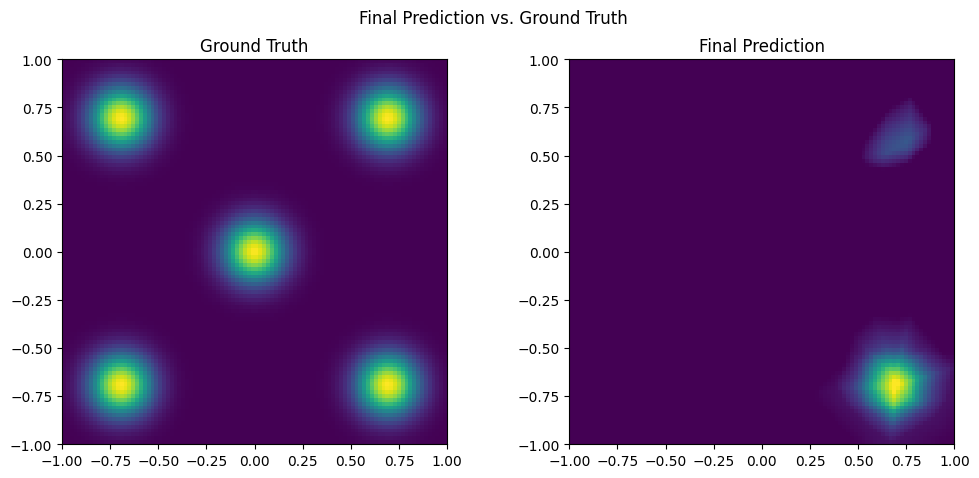

Final MSE: 0.0364
Relative Forgetting: 529.1074
Retention: -529.1074
BWT: -0.1166
Accuracy Drop (per task): [1.62452607366248e-07, 0.15088488793116994, 0.12407201778842136, 0.15945903929241467, 0.1486091346014291]


Running with λ=0.1, epochs=500, width=50, depth=6
Trainable parameters: 12951


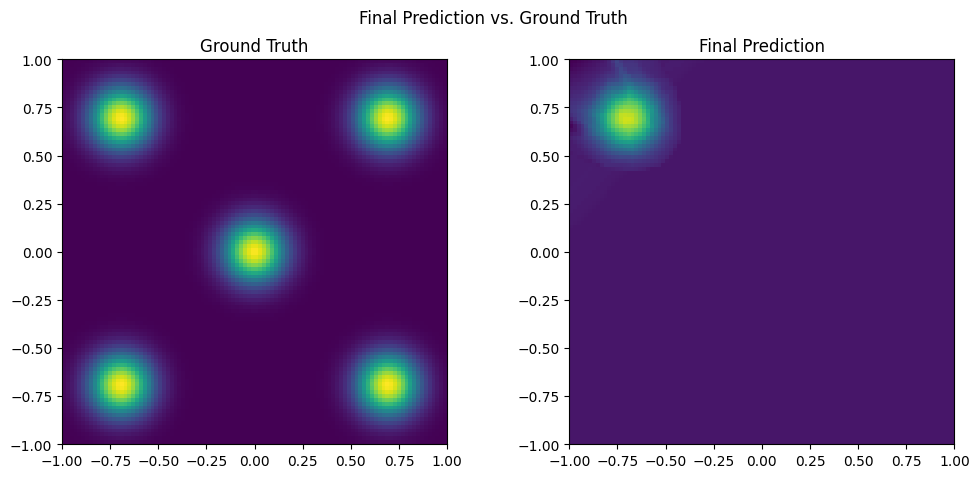

Final MSE: 0.0328
Relative Forgetting: 1132584.8234
Retention: -1132584.8196
BWT: -0.0008
Accuracy Drop (per task): [0.003711174285341845, 0.002583739878900815, -0.0007723122835159302, -9.28342342376709e-05, -0.0014483928680419922]


Running with λ=0.1, epochs=500, width=100, depth=4
Trainable parameters: 30701


Final MSE: 0.0351
Relative Forgetting: 106.1317
Retention: -106.1317
BWT: -0.1034
Accuracy Drop (per task): [5.15429411152013e-07, 0.14620007685152814, 0.1495667948620394, 0.15790901135187596, 0.06354577967431396]


Running with λ=0.1, epochs=500, width=100, depth=6
Trainable parameters: 50901


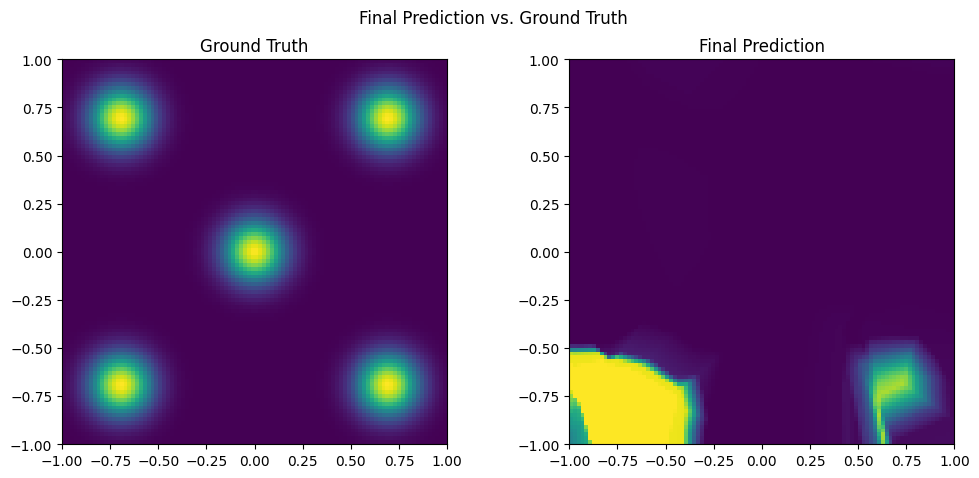

Final MSE: 0.0891
Relative Forgetting: 7253.3492
Retention: -7253.3492
BWT: -0.2106
Accuracy Drop (per task): [4.946657148230393e-06, 0.14938234238070436, 0.1112029105424881, 0.15768548240885139, 0.6345475123962387]


Running with λ=0.1, epochs=1000, width=50, depth=4
Trainable parameters: 7851


Final MSE: 0.0339
Relative Forgetting: 1166147.1485
Retention: -1166147.1485
BWT: -0.0419
Accuracy Drop (per task): [0.0037111580059141502, 0.11554429342504591, 0.04406382725574076, 0.018613524734973907, 0.02767402259632945]


Running with λ=0.1, epochs=1000, width=50, depth=6
Trainable parameters: 12951


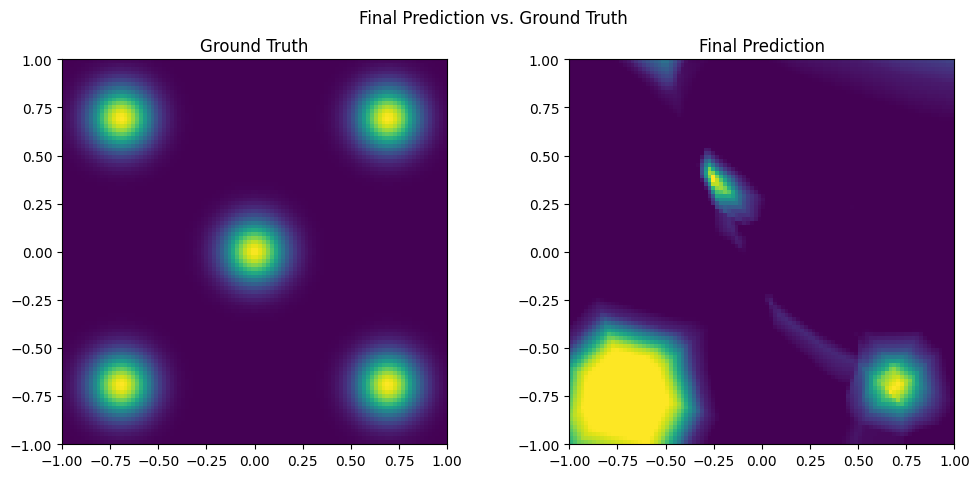

Final MSE: 0.0810
Relative Forgetting: 2126.3835
Retention: -2126.3835
BWT: -0.2071
Accuracy Drop (per task): [2.676369712517612e-07, 0.15136454816092737, 0.1545699335692916, 0.15805098820419516, 0.5713497831602581]


Running with λ=0.1, epochs=1000, width=100, depth=4
Trainable parameters: 30701


Final MSE: 0.0294
Relative Forgetting: 317156.6195
Retention: -317156.6170
BWT: -0.0141
Accuracy Drop (per task): [0.003711180746320819, 0.06730225039791549, 0.00080116257595364, -9.28342342376709e-05, -0.001448512077331543]


Running with λ=0.1, epochs=1000, width=100, depth=6
Trainable parameters: 50901


Final MSE: 0.0449
Relative Forgetting: 4923669.2650
Retention: -4923669.2650
BWT: -0.0884
Accuracy Drop (per task): [0.004349038293868679, 0.1055693062953651, 0.10675014927983284, 0.11192282455886016, 0.11352546885609627]


Running with λ=0.5, epochs=500, width=50, depth=4
Trainable parameters: 7851


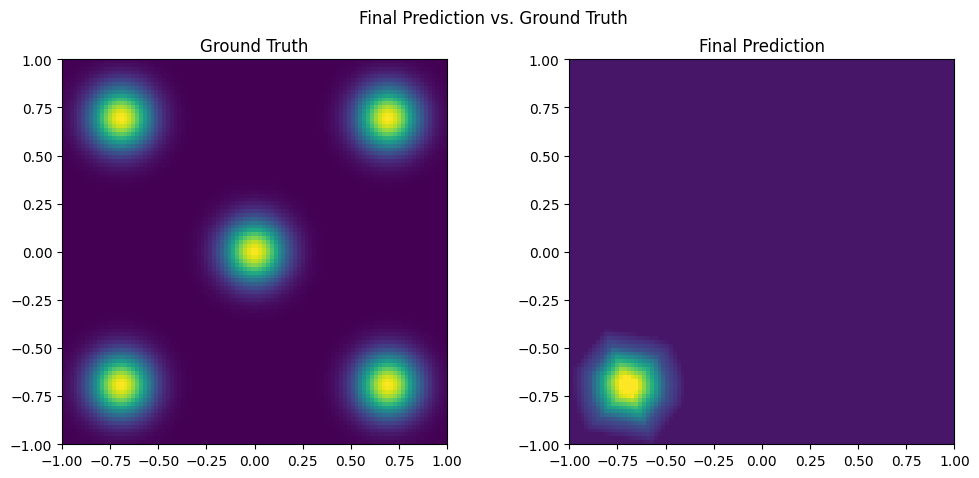

Final MSE: 0.0330
Relative Forgetting: 216564.9659
Retention: -216564.9659
BWT: -0.0761
Accuracy Drop (per task): [0.0037111640512823563, 0.11892398894269718, 0.12557579574058764, 0.12596580058016116, 0.0063251088140532374]


Running with λ=0.5, epochs=500, width=50, depth=6
Trainable parameters: 12951


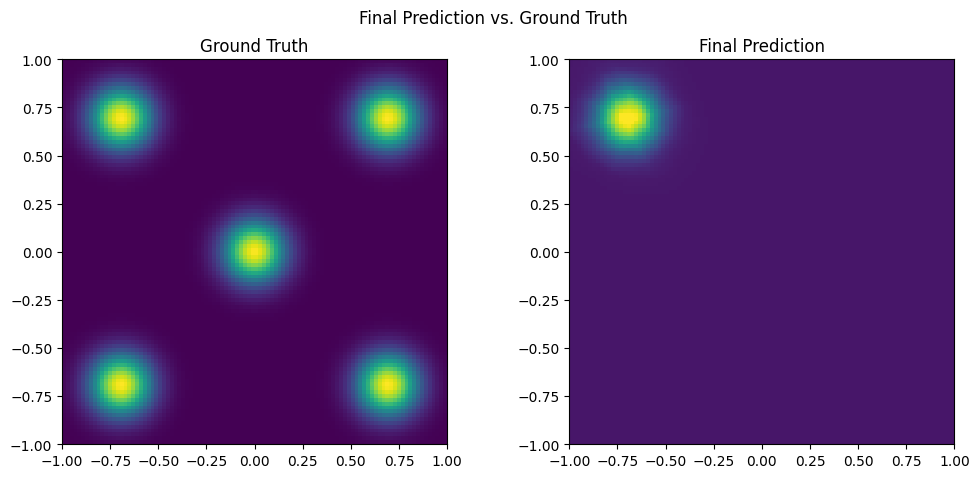

Final MSE: 0.0329
Relative Forgetting: 5847054.2338
Retention: -693964.8792
BWT: -0.0010
Accuracy Drop (per task): [0.0037111694473370704, 0.003492159907182213, -0.0007722973823547363, -9.278953075408936e-05, -0.0014484003186225891]


Running with λ=0.5, epochs=500, width=100, depth=4
Trainable parameters: 30701


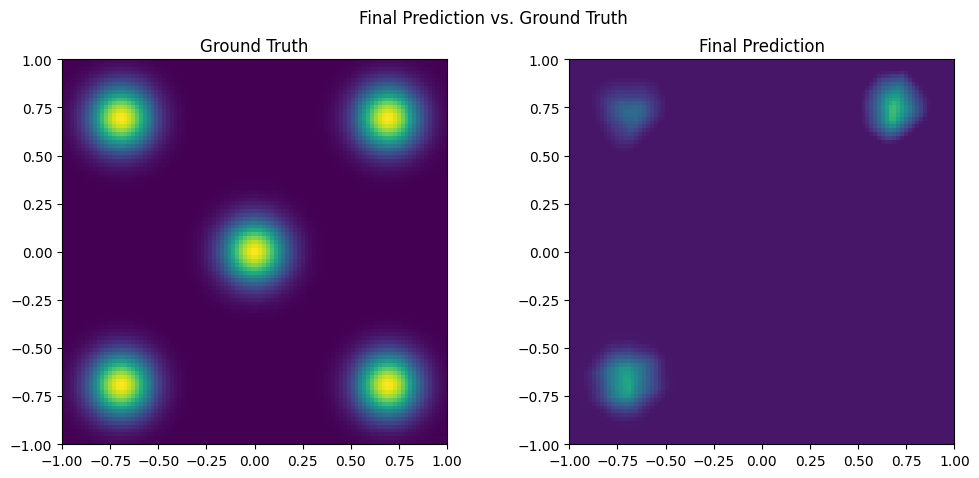

Final MSE: 0.0269
Relative Forgetting: 187129.9761
Retention: -162365.3227
BWT: -0.0318
Accuracy Drop (per task): [0.0037111664025211155, 0.0740654446562985, 0.048242519675113726, -9.278953075408936e-05, 0.032837633552844636]


Running with λ=0.5, epochs=500, width=100, depth=6
Trainable parameters: 50901


Final MSE: 0.0452
Relative Forgetting: 4578.8714
Retention: -4578.8714
BWT: -0.1186
Accuracy Drop (per task): [1.60715498392916e-05, 0.14748428529128432, 0.15027589062810875, 0.15896941234677797, 0.13613285336759873]


Running with λ=0.5, epochs=1000, width=50, depth=4
Trainable parameters: 7851


Final MSE: 0.1072
Relative Forgetting: 834547.9099
Retention: -834547.9099
BWT: -0.1789
Accuracy Drop (per task): [0.004349000173497042, 0.14251733911441988, 0.599520356830908, 0.13287079287692904, 0.015444784075953066]


Running with λ=0.5, epochs=1000, width=50, depth=6
Trainable parameters: 12951


Final MSE: 0.1200
Relative Forgetting: 16579187.1212
Retention: -16579187.1212
BWT: -0.2768
Accuracy Drop (per task): [0.004354387469212129, 0.054025349440053105, 1.3220159178890754, 0.0008141845464706421, 0.002803384675644338]


Running with λ=0.5, epochs=1000, width=100, depth=4
Trainable parameters: 30701


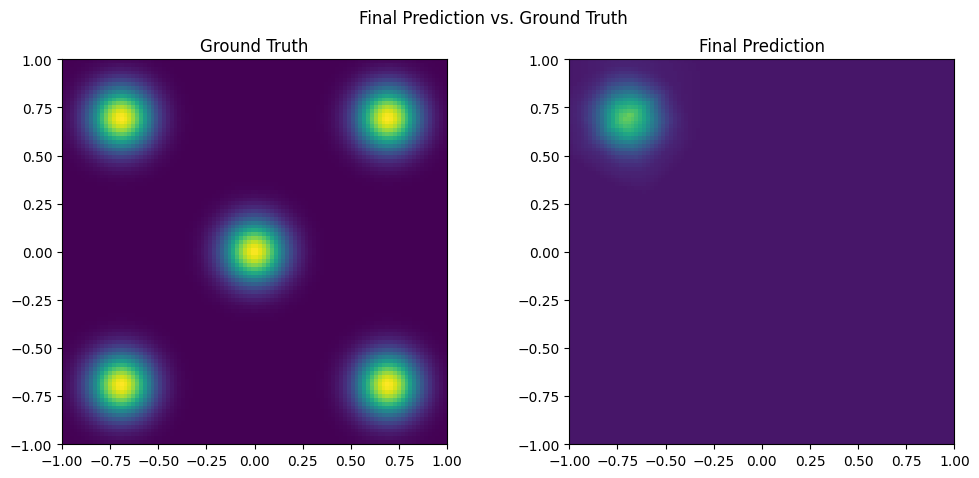

Final MSE: 0.0330
Relative Forgetting: 12197434.3650
Retention: -709727.5112
BWT: -0.0016
Accuracy Drop (per task): [0.0037111738948580886, 0.006795812674681656, -0.0007723122835159302, -9.281933307647705e-05, -0.0014483928680419922]


Running with λ=0.5, epochs=1000, width=100, depth=6
Trainable parameters: 50901


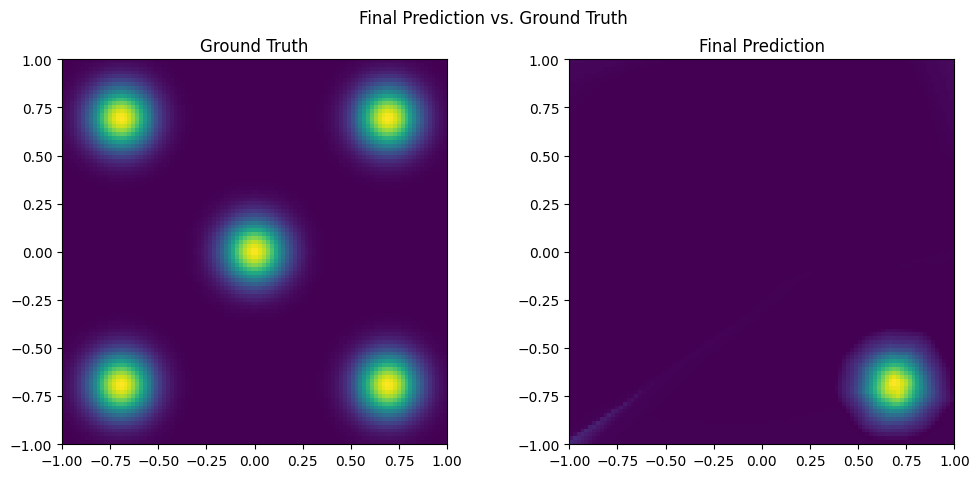

Final MSE: 0.0385
Relative Forgetting: 4781.4990
Retention: -4781.4990
BWT: -0.1234
Accuracy Drop (per task): [1.8902036235113329e-06, 0.1515244487382006, 0.1582890173594933, 0.15930882262910018, 0.14812040714605246]


Running with λ=0.9, epochs=500, width=50, depth=4
Trainable parameters: 7851


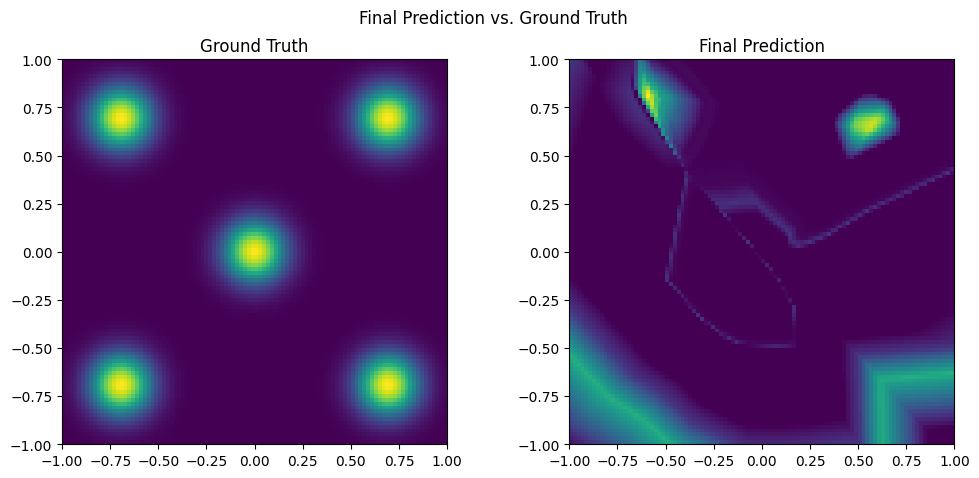

Final MSE: 0.0396
Relative Forgetting: 293.4013
Retention: -293.4013
BWT: -0.0892
Accuracy Drop (per task): [2.1541873334030015e-06, 0.1435618814866757, 0.11070897956960835, 0.14951580576598644, 0.04206110164523125]


Running with λ=0.9, epochs=500, width=50, depth=6
Trainable parameters: 12951


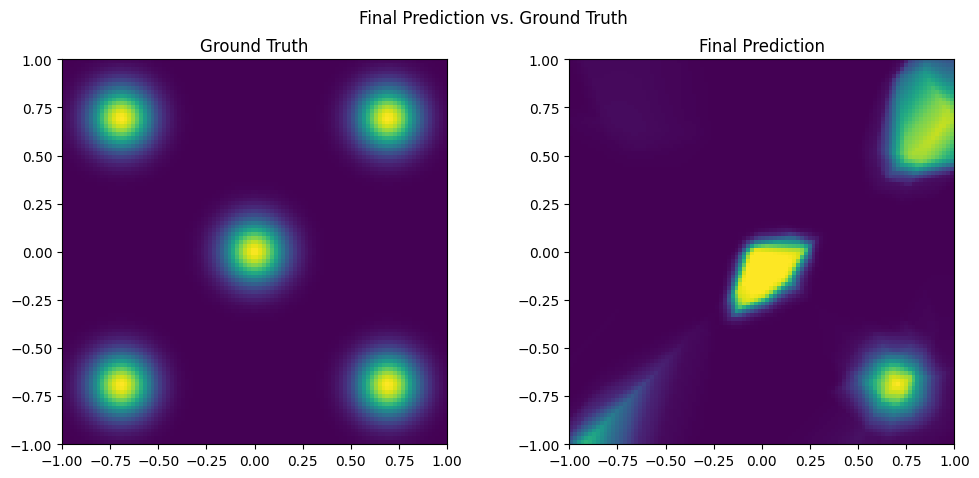

Final MSE: 0.0423
Relative Forgetting: 2271.1728
Retention: -2271.1728
BWT: -0.1094
Accuracy Drop (per task): [2.5150810978313842e-06, 0.13793449082731968, 0.1718852377453004, 0.15797399637813214, 0.07927639037370682]


Running with λ=0.9, epochs=500, width=100, depth=4
Trainable parameters: 30701


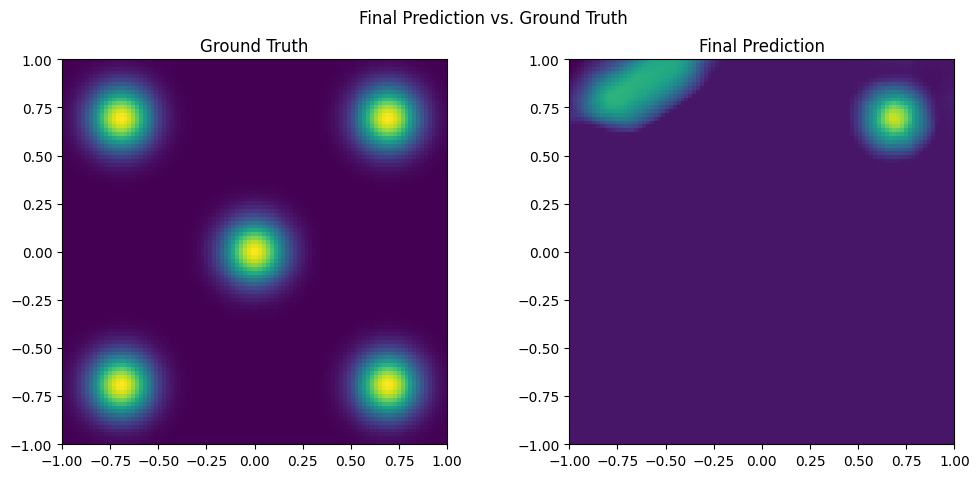

Final MSE: 0.0331
Relative Forgetting: 157221.2324
Retention: -157221.2299
BWT: -0.0204
Accuracy Drop (per task): [0.0037111657571800016, 0.0976049565251742, 0.0023296650470001623, -9.278953075408936e-05, -0.0014484003186225891]


Running with λ=0.9, epochs=500, width=100, depth=6
Trainable parameters: 50901


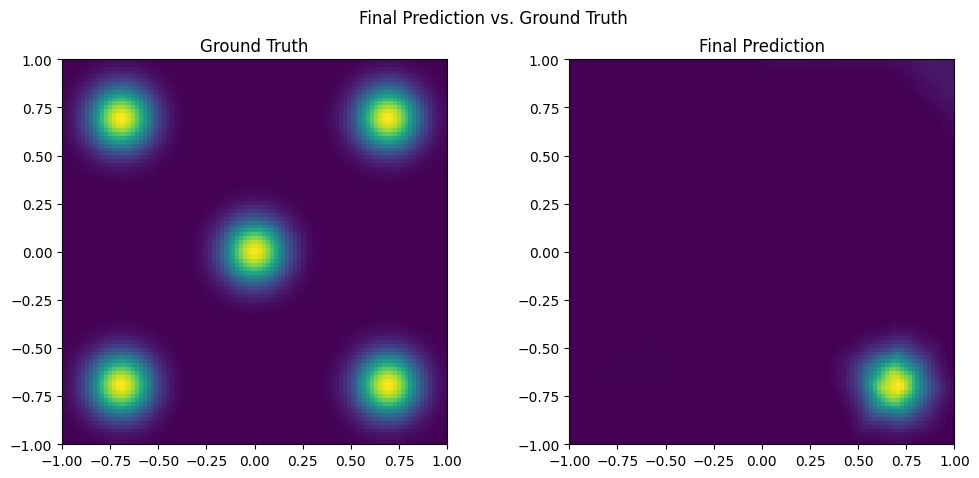

Final MSE: 0.0384
Relative Forgetting: 322.8670
Retention: -322.8670
BWT: -0.0962
Accuracy Drop (per task): [9.009650803193381e-10, 0.15083529616822489, 0.15701075558899902, 0.03321202099323273, 0.1400407636538148]


Running with λ=0.9, epochs=1000, width=50, depth=4
Trainable parameters: 7851


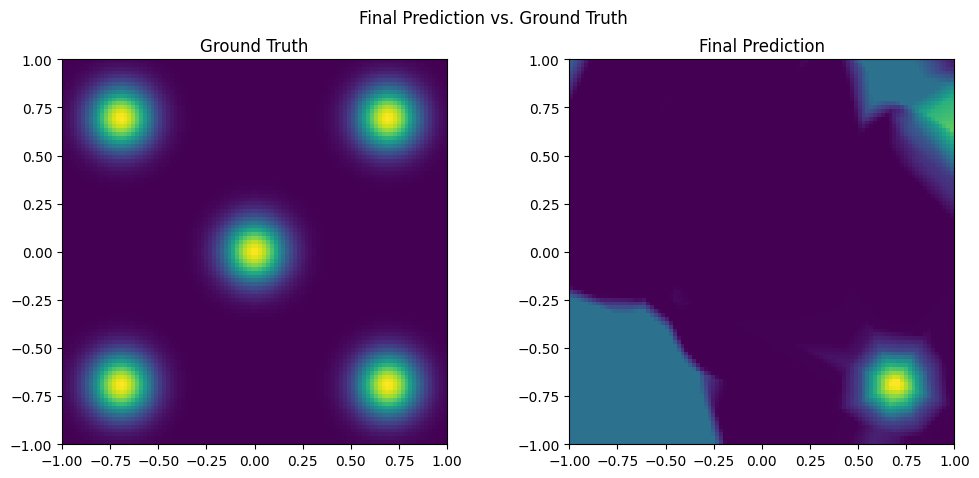

Final MSE: 0.0407
Relative Forgetting: 1387.1230
Retention: -1387.1230
BWT: -0.1008
Accuracy Drop (per task): [1.5586279832335848e-06, 0.1497978367151518, 0.12109870325366501, 0.15855185022519436, 0.07441780369845219]


Running with λ=0.9, epochs=1000, width=50, depth=6
Trainable parameters: 12951


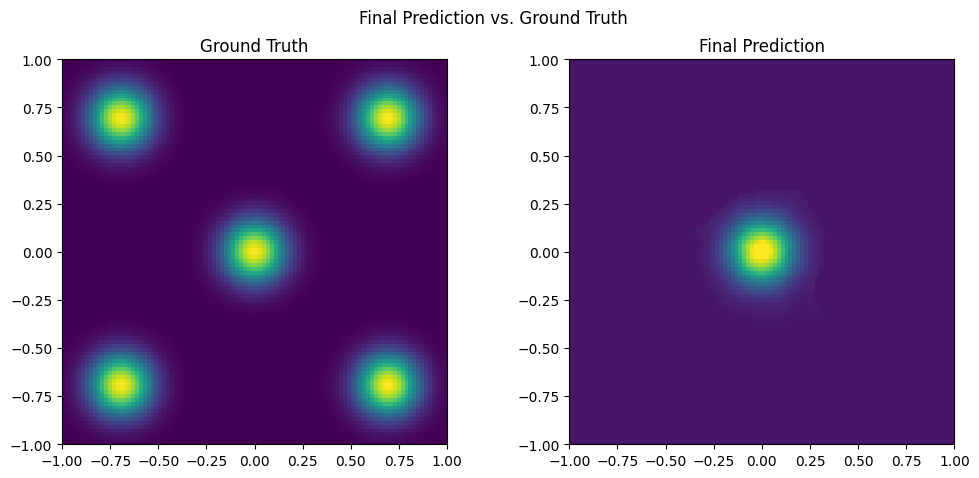

Final MSE: 0.0329
Relative Forgetting: 12470827.9112
Retention: -12470827.9088
BWT: -0.0504
Accuracy Drop (per task): [0.00371116463661858, 0.1189713168387243, 0.12567749341542367, 0.004857191266637528, -0.0014483854174613953]


Running with λ=0.9, epochs=1000, width=100, depth=4
Trainable parameters: 30701


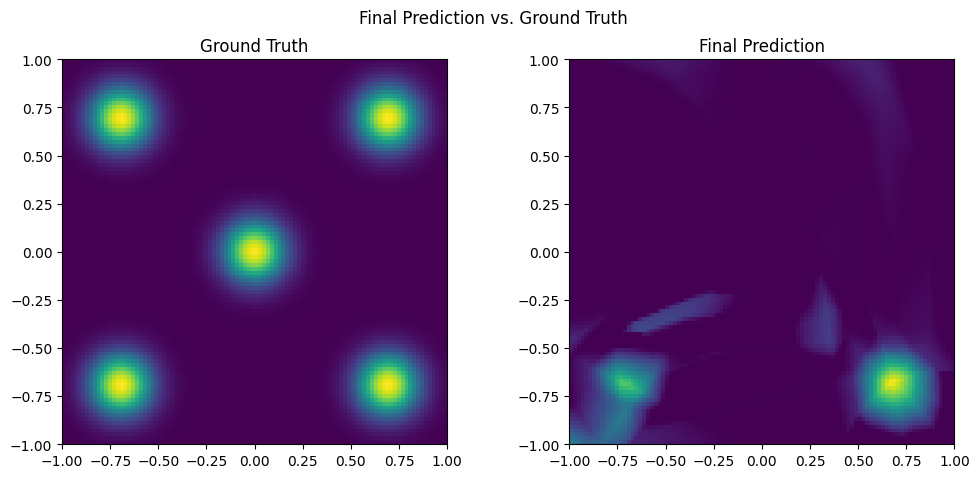

Final MSE: 0.0398
Relative Forgetting: 2709.0230
Retention: -2709.0230
BWT: -0.1195
Accuracy Drop (per task): [1.1701334140967745e-05, 0.18672061933466466, 0.1507944902696181, 0.23038831856683828, 0.029760562465526164]


Running with λ=0.9, epochs=1000, width=100, depth=6
Trainable parameters: 50901


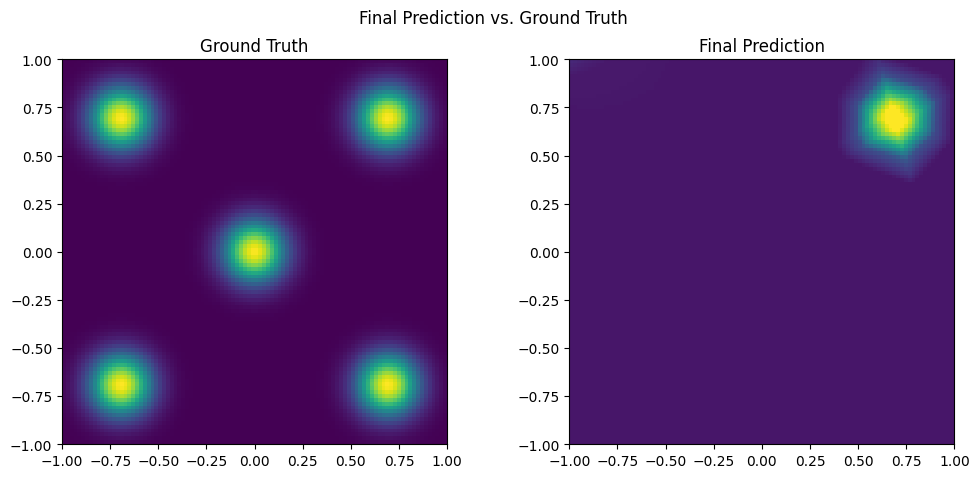

Final MSE: 0.0334
Relative Forgetting: 295366.3872
Retention: -295366.3846
BWT: -0.0265
Accuracy Drop (per task): [0.0037111172421508964, 0.11861756575672189, 0.011775866441894323, -9.28044319152832e-05, -0.0014483779668807983]


=== Hyperparameter Tuning Summary ===
λ=0.1, epochs=500, width=50, depth=4 | Final MSE = 0.0364, RelForget = 529.1074, Retention = -529.1074, BWT = -0.1166, AccDrop = [1.62452607366248e-07, 0.15088488793116994, 0.12407201778842136, 0.15945903929241467, 0.1486091346014291]
λ=0.1, epochs=500, width=50, depth=6 | Final MSE = 0.0328, RelForget = 1132584.8234, Retention = -1132584.8196, BWT = -0.0008, AccDrop = [0.003711174285341845, 0.002583739878900815, -0.0007723122835159302, -9.28342342376709e-05, -0.0014483928680419922]
λ=0.1, epochs=500, width=100, depth=4 | Final MSE = 0.0351, RelForget = 106.1317, Retention = -106.1317, BWT = -0.1034, AccDrop = [5.15429411152013e-07, 0.14620007685152814, 0.1495667948620394, 0.15790901135187596, 0.06354577967431396]
λ=0.1, e

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm  # Optional, for progress bars


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


def count_parameters(model):
   
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def compute_relative_forgetting(history):
    
    final_phase = len(history['task_losses']) - 1
    forgetting_values = []
    for task_idx in range(final_phase):
        best_loss = min(history['task_losses'][phase][task_idx] 
                        for phase in range(task_idx, final_phase + 1))
        final_loss = history['task_losses'][final_phase][task_idx]
        if best_loss > 0:
            forgetting = (final_loss - best_loss) / best_loss
        else:
            forgetting = final_loss
        forgetting_values.append(forgetting)
    return sum(forgetting_values) / len(forgetting_values) if forgetting_values else 0.0

def compute_retention(history):

    final_phase = len(history['task_losses']) - 1
    retention_values = []
    for task_idx in range(final_phase):
        initial_loss = history['task_losses'][task_idx][task_idx]
        final_loss = history['task_losses'][final_phase][task_idx]
        if initial_loss > 0:
            retention = (initial_loss - final_loss) / initial_loss
        else:
            retention = 0
        retention_values.append(retention)
    return sum(retention_values) / len(retention_values) if retention_values else 0.0

def compute_backward_transfer(history):

    if 'task_accuracies' not in history:
        return 0.0  # Not tracked

    task_accuracies = history['task_accuracies']
    T = len(task_accuracies)  # total phases = total tasks

    if T < 2:
        return 0.0  # BWT not meaningful with only one task

    bwt_values = []
    # For each old task i, compare A_{i,i} vs A_{i,T-1}
    for i in range(T - 1):
        if i < len(task_accuracies[i]) and (T - 1) < len(task_accuracies):
            A_i_i = task_accuracies[i][i]        # accuracy of task i after training task i
            A_i_T = task_accuracies[T - 1][i]    # accuracy of task i after final phase
            bwt_values.append(A_i_T - A_i_i)
    return sum(bwt_values) / len(bwt_values) if bwt_values else 0.0

def compute_accuracy_drop(history):

    if 'task_accuracies' not in history:
        return []

    task_accuracies = history['task_accuracies']
    T = len(task_accuracies)

    if T < 2:
        return []

    drops = []
    # For each old task i, compare accuracy after its training vs. after final phase
    for i in range(T - 1):
        A_i_i = task_accuracies[i][i]
        A_i_T = task_accuracies[T - 1][i]
        drops.append(A_i_i - A_i_T)
    return drops


def generate_gaussian_bump(center, sigma, n_samples=500):
   
    x_center, y_center = center
    x = np.random.normal(x_center, sigma, size=(n_samples, 1))
    y = np.random.normal(y_center, sigma, size=(n_samples, 1))
    z = np.exp(-(((x - x_center)**2 + (y - y_center)**2) / (2 * sigma**2)))
    X = np.hstack([x, y])
    y_val = z
    return torch.from_numpy(X).float(), torch.from_numpy(y_val).float()

class SimpleMLP(nn.Module):

    def __init__(self, input_dim=2, hidden_dim=32, output_dim=1, depth=2):
        super(SimpleMLP, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)


def train_sequential_ewc(model, tasks_data, n_epochs=100, lr=0.01, lambda_ewc=0.4):
 
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    
    history = {
        'task_losses': [],      # e.g., [ [loss_0], [loss_0, loss_1], ... ]
        'task_accuracies': []   # e.g., [ [acc_0],  [acc_0, acc_1],  ... ]
    }
    ewc_data = []

    for task_idx, dataset in enumerate(tasks_data):
        X, y = dataset['train_input'].to(device), dataset['train_label'].to(device)


        model.train()
        for epoch in range(n_epochs):
            optimizer.zero_grad()
            output = model(X)
            loss = loss_fn(output, y)

            # EWC penalty for previous tasks
            if task_idx > 0:
                for prev in ewc_data:
                    for name, param in model.named_parameters():
                        loss += lambda_ewc * (prev['fisher'][name] * (param - prev['params'][name]).pow(2)).sum()

            loss.backward()
            optimizer.step()

        model.eval()
        phase_losses = []
        phase_accuracies = []
        for eval_idx in range(task_idx + 1):
            eval_X = tasks_data[eval_idx]['test_input'].to(device)
            eval_y = tasks_data[eval_idx]['test_label'].to(device)
            with torch.no_grad():
                pred = model(eval_X)
                mse_eval = loss_fn(pred, eval_y).item()
                acc_eval = 1.0 - mse_eval  # Simple stand-in for 'accuracy' in regression
            phase_losses.append(mse_eval)
            phase_accuracies.append(acc_eval)

        history['task_losses'].append(phase_losses)
        history['task_accuracies'].append(phase_accuracies)


        fisher = {n: torch.zeros_like(p) for n, p in model.named_parameters() if p.requires_grad}
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = loss_fn(output, y)
        loss.backward()
        for name, param in model.named_parameters():
            if param.requires_grad:
                fisher[name] += param.grad.detach().clone() ** 2
        params = {name: param.detach().clone() for name, param in model.named_parameters() if param.requires_grad}
        ewc_data.append({'fisher': fisher, 'params': params})

    return history


grid_size = 100
x_lin = torch.linspace(-1, 1, steps=grid_size)
y_lin = torch.linspace(-1, 1, steps=grid_size)
xv, yv = torch.meshgrid(x_lin, y_lin, indexing='xy')
xy_grid = torch.stack([xv.flatten(), yv.flatten()], dim=-1)
sigma_true = 40.0
peak_regions = {
    "a11": [-0.7,  0.7], "a13": [ 0.7,  0.7],
    "a22": [ 0.0,  0.0], "a31": [-0.7, -0.7],
    "a33": [ 0.7, -0.7]
}
f_grid = torch.zeros(xy_grid.shape[0])
for center in peak_regions.values():
    dist_sq = (xy_grid[:, 0] - center[0])**2 + (xy_grid[:, 1] - center[1])**2
    f_grid += torch.exp(-sigma_true * dist_sq)
f_grid_2d = f_grid.view(grid_size, grid_size)


def plot_final_comparison(model, title="Final Prediction vs. Ground Truth"):
  
    model.eval()
    with torch.no_grad():
        final_pred = model(xy_grid.to(device)).view(grid_size, grid_size)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title("Ground Truth")
    axes[0].imshow(f_grid_2d.numpy(), origin='lower', extent=(-1,1,-1,1),
                   cmap='viridis', vmin=0, vmax=1)
    axes[1].set_title("Final Prediction")
    axes[1].imshow(final_pred.cpu().numpy(), origin='lower', extent=(-1,1,-1,1),
                   cmap='viridis', vmin=0, vmax=1)
    plt.suptitle(title)
    plt.show()
    return nn.functional.mse_loss(final_pred, f_grid_2d.to(final_pred.device)).item()


def main_hyperparameter_tuning():
    # Example hyperparameters for tuning.
    lambda_values = [0.1, 0.5, 0.9]
    epochs_values = [500, 1000]
    hidden_dims = [50, 100]
    depths = [4, 6]

    results = []
    for lambda_ewc in lambda_values:
        for n_epochs in epochs_values:
            for hidden_dim in hidden_dims:
                for depth in depths:
                    print(f"\nRunning with λ={lambda_ewc}, epochs={n_epochs}, width={hidden_dim}, depth={depth}")
                    model = SimpleMLP(input_dim=2, hidden_dim=hidden_dim, output_dim=1, depth=depth)
                    print("Trainable parameters:", count_parameters(model))
                    
                    # Here, 'all_datasets' should be defined as a list of task dictionaries:
                    # all_datasets = [task1, task2, ...]
                    history = train_sequential_ewc(
                        model, all_datasets,
                        n_epochs=n_epochs,
                        lr=0.01,
                        lambda_ewc=lambda_ewc
                    )
                    
                    # Plot final predictions
                    final_mse = plot_final_comparison(model)

                    # Compute metrics
                    rel_forgetting = compute_relative_forgetting(history)
                    retention = compute_retention(history)
                    bwt = compute_backward_transfer(history)
                    acc_drop = compute_accuracy_drop(history)

                    results.append({
                        "lambda_ewc": lambda_ewc,
                        "epochs": n_epochs,
                        "hidden_dim": hidden_dim,
                        "depth": depth,
                        "final_mse": final_mse,
                        "relative_forgetting": rel_forgetting,
                        "retention": retention,
                        "bwt": bwt,
                        "accuracy_drop": acc_drop
                    })
                    
                    print(f"Final MSE: {final_mse:.4f}")
                    print(f"Relative Forgetting: {rel_forgetting:.4f}")
                    print(f"Retention: {retention:.4f}")
                    print(f"BWT: {bwt:.4f}")
                    print(f"Accuracy Drop (per task): {acc_drop}\n")

    # Print a final summary
    print("\n=== Hyperparameter Tuning Summary ===")
    for res in results:
        print((
            f"λ={res['lambda_ewc']}, epochs={res['epochs']}, width={res['hidden_dim']}, depth={res['depth']} | "
            f"Final MSE = {res['final_mse']:.4f}, RelForget = {res['relative_forgetting']:.4f}, "
            f"Retention = {res['retention']:.4f}, BWT = {res['bwt']:.4f}, "
            f"AccDrop = {res['accuracy_drop']}"
        ))

if __name__ == "__main__":
    main_hyperparameter_tuning()
